<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        💵 Credit Card Customers ⚖️
    </h1>
</div>


# 📂 Overview

**Background**

This dataset contains **credit card customer data** from a fictional bank. It simulates real-world customer behavior with features related to demographics, credit usage, and account activity.

This binary classification problem aims to **predict whether a customer will churn** based on their profile and activity.

**Goal of the Project**

Build a machine learning model to **predict whether a customer will leave the credit card service** (`Attrition_Flag`: Attrited/Existing).

**Key Features**

| Feature Name               | Data Type | Category    | Description                                           |
| -------------------------- | --------- | ----------- | ----------------------------------------------------- |
| `CLIENTNUM`                | int64     | Identifier  | Unique customer ID (not used for modeling)            |
| `Attrition_Flag`           | object    | Target      | Churn status: 🟢 Existing or 🔴 Attrited              |
| `Customer_Age`             | int64     | Numerical   | Age of the customer                                   |
| `Gender`                   | object    | Categorical | Customer gender                                       |
| `Dependent_count`          | int64     | Numerical   | Number of dependents                                  |
| `Education_Level`          | object    | Categorical | Education level (High School, Graduate, etc.)         |
| `Marital_Status`           | object    | Categorical | Marital status (Married, Single, etc.)                |
| `Income_Category`          | object    | Categorical | Income bracket (Less than \$40K, \$40K - \$60K, etc.) |
| `Card_Category`            | object    | Categorical | Credit card type (Blue, Silver, Gold, Platinum)       |
| `Months_on_book`           | int64     | Numerical   | Tenure with the bank (in months)                      |
| `Total_Relationship_Count` | int64     | Numerical   | Total number of bank products held                    |
| `Months_Inactive_12_mon`   | int64     | Numerical   | Inactive months in the past 12 months                 |
| `Contacts_Count_12_mon`    | int64     | Numerical   | Customer service contacts in the past 12 months       |
| `Credit_Limit`             | float64   | Numerical   | Credit card limit                                     |
| `Total_Revolving_Bal`      | int64     | Numerical   | Revolving balance on the card                         |
| `Avg_Open_To_Buy`          | float64   | Numerical   | Average available credit                              |
| `Total_Trans_Amt`          | int64     | Numerical   | Total transaction amount in last 12 months            |
| `Total_Trans_Ct`           | int64     | Numerical   | Total transaction count in last 12 months             |
| `Total_Ct_Chng_Q4_Q1`      | float64   | Numerical   | Change in transaction count Q4 vs Q1                  |
| `Total_Amt_Chng_Q4_Q1`     | float64   | Numerical   | Change in transaction amount Q4 vs Q1                 |
| `Avg_Utilization_Ratio`    | float64   | Numerical   | Average card utilization rate                         |

**Files Provided**

* `BankChurners.csv`: Main dataset including both input features and target variable.

**Project Objective**

The goal of this notebook is to **analyze customer behavior and predict churn**, supporting business decisions like:

* Targeted retention strategies
* Personalized offers for at-risk customers
* Reducing customer attrition

**Key Steps**

* **Exploratory Data Analysis (EDA):** <br>
  Understand patterns in customer behavior and churn.

* **🛠 Feature Engineering:**
  Encode categorical variables, scale numerical features, and create meaningful derived variables (e.g. utilization ratios, transaction trends).

* **Modeling:**
  Apply various classifiers like:

  * Logistic Regression
  * Random Forest
  * XGBoost
  * LightGBM
  * MLPClassifier
  ...

* **Evaluation Framework:**

  * Use **Stratified Cross-Validation**
  * Assess using:

    * Accuracy
    * Precision
    * Recall
    * F1-score
    * ROC-AUC

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Import Libraries</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Import Libraries
    </h1>
</div>


In [1]:
# Core data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Statistical functions
from scipy.stats import skew

# Display utilities for Jupyter notebooks
from IPython.display import display

# Machine learning preprocessing and modeling
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Metrics
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc

# Statistical
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, probplot
from scipy.stats import mannwhitneyu
from scipy.stats import levene
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import kruskal
from scipy.stats import anderson
from scipy.stats import normaltest
import scikit_posthocs as sp

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 500) # To display all the columns of dataframe
pd.set_option("max_colwidth", None) # To set the width of the column to maximum

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Load Data</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Load Data
    </h1>
</div>


In [2]:
# Load the datasets
df_customer_churn = pd.read_csv("BankChurners.csv")
# Verify shapes
print("Data Shape:", df_customer_churn.shape)

Data Shape: (10127, 23)


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preview and Info
    </h1>
</div>


In [3]:
# Display few rows of dataset
print("Data Preview:")
display(df_customer_churn.head())

Data Preview:


CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                                                                                                            0.000093   
1                                                                                                                            0.000057   
2                                                                                                                            0.000021   
3                                                                                                                            0.000134   
4                                                                                                                            0.000022   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                                                                                                             0.99991  
1                                                                                                                             0.99994  
2                                                                                                                             0.99998  
3                                                                                                                             0.99987  
4                                                                                                   

In [4]:
# Display information about the DataFrames
print("Data Info:")
df_customer_churn.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                

## Insights from Initial Data Exploration

**Dataset Size and Structure**  
   - The **dataset** contains **10127** samples with **23** columns, including the target variable `Attrition_Flag`.

**Feature Overview**  
   - Both datasets include all important attributes:
     - **Numerical features:** `Customer_Age`, `Dependent_count`, `Months_on_book`, `Total_Relationship_Count`, `Months_Inactive_12_mon`, `Contacts_Count_12_mon`, `Credit_Limit`, `Total_Revolving_Bal`, `Avg_Open_To_Buy`, `Total_Trans_Amt`, `Total_Trans_Ct`, `Total_Ct_Chng_Q4_Q1`, `Total_Amt_Chng_Q4_Q1` and `Avg_Utilization_Ratio`.
     - **Categorical features:** `Attrition_Flag`, `Gender`, `Education_Level`, `Marital_Status`, `Income_Category`, `Card_Category`.
   - The target variable is **object** value.

**Data Completeness**  
   - The dataset have **no missing values**, we need to handle this issue.
   - Data types are appropriate: numerical features is float64 and int64, and categorical features are objects (strings).
   - The columns `Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1`, `Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2` are not meaningful for analysis. So these columns are not really a part of the information we should care about. We can drop them.

In [5]:
df_customer_churn.drop(columns="Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", axis=1, inplace=True)
df_customer_churn.drop(columns="Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2", axis=1, inplace=True)

In [6]:
df_customer_churn.columns = (
    df_customer_churn.columns
    .str.strip()
)

In [7]:
cat_features = ["Attrition_Flag", "Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category", "Dependent_count",
                "Months_Inactive_12_mon", "Contacts_Count_12_mon", "Total_Relationship_Count"]

num_features = ["Customer_Age", "Credit_Limit", "Avg_Open_To_Buy", "Total_Trans_Amt", "Months_on_book", 
                "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1", "Total_Amt_Chng_Q4_Q1", "Avg_Utilization_Ratio", "Total_Revolving_Bal"]
def convert_cat(df, cat_features= cat_features):
    for feature in cat_features:
        if feature in df.columns:
            df[feature] = df[feature].astype("category")
        else:
            pass

convert_cat(df=df_customer_churn)

In [8]:
df_customer_churn[num_features] = df_customer_churn[num_features].astype({
    "Customer_Age": "int8",
    "Credit_Limit": "float32",
    "Avg_Open_To_Buy": "float32",
    "Total_Trans_Amt": "int32",
    "Months_on_book": "int8",
    "Total_Trans_Ct": "int16",
    "Total_Ct_Chng_Q4_Q1": "float32",
    "Total_Amt_Chng_Q4_Q1": "float32",
    "Avg_Utilization_Ratio": "float32",
    "Total_Revolving_Bal": "int16"
})

In [9]:
# Display information about the DataFrames
print("Data Info:")
df_customer_churn.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int8    
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  category
 5   Education_Level           10127 non-null  category
 6   Marital_Status            10127 non-null  category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int8    
 10  Total_Relationship_Count  10127 non-null  category
 11  Months_Inactive_12_mon    10127 non-null  category
 12  Contacts_Count_12_mon     10127 non-null  category
 13  Credit_Limit              10127 non

In [10]:
print("Data describe:")
cm = sns.light_palette("blue", as_cmap=True)
display(df_customer_churn.drop(columns="CLIENTNUM", axis=1).describe().T.style.background_gradient(cmap=cm))

Data describe:


## Descriptive Insights – Numerical Features

**1. Demographics & Tenure**

* **Customer Age**

  * Mean: **46.3 years** | Range: 26–73
  * 25–75%: **41–52** → Primarily middle-aged adults
  * Std: 8.0 → Fairly even distribution

* **Months on Book** (Tenure)

  * Mean: **35.9 months** (\~3 years)
  * 25–75%: **31–40** → Most customers have stayed for 2.5–3.5 years
  * Std: 8.0 → Moderate spread

**2. Credit Behavior**

* **Credit Limit**

  * Mean: **\$8,632** | Max: \$34,516
  * 25–75%: **\$4,549–\$11,068**
  * Std: **\$9,089** → Highly dispersed, potential right-skewness

* **Avg Open to Buy**

  * Mean: **\$7,469** (closely follows `Credit_Limit`)
  * Std: **\$9,091** → Strong dependency between the two

* **Avg Utilization Ratio**

  * Mean: **27.5%**
  * 25–75%: **2.3%–50.3%** | Max: \~**99.9%**
  * → Some customers nearly max out their limits → Potential risk or loyal high spenders

* **Total Revolving Balance**

  * Mean: **\$1,162**
  * 25–75%: **\$359–\$1,784**
  * Std: **\$815** → Wide variability, warrants skewness check

**3. Transaction Behavior**

* **Total Transaction Amount**

  * Mean: **\$4,404** | Max: \$18,484
  * 25–75%: **\$2,156–\$4,741**
  * Std: **\$3,397** → Outliers likely among high spenders

* **Total Transaction Count**

  * Mean: **\~65 transactions/year**
  * 25–75%: **45–81 transactions**
  * Std: 23.5 → Ranges from light to highly active users

**4. Behavioral Changes**

* **Total Amt Change Q4/Q1**

  * Mean: **0.76** | Max: **3.40**
  * 25–75%: **0.63–0.86**
  * → Some customers drastically increased spending in Q4 → May signal churn or upsell opportunity

* **Total Ct Change Q4/Q1**

  * Mean: **0.71**
  * Std: 0.24 → Frequency shifts may indicate behavioral trends

**Summary**

* **Credit and transaction features show high variance** → Consider scaling or transformation
* **Age and tenure are more normally distributed** → Easier to model
* Features like `Total_Amt_Chng_Q4_Q1`, `Avg_Utilization_Ratio`, and `Total_Revolving_Bal` exhibit **strong financial behavior patterns** → Valuable churn predictors.

In [11]:
print("Data describe:")
df_customer_churn.describe(include=["category", "object"]).T

Data describe:


count unique                top  freq
Attrition_Flag            10127      2  Existing Customer  8500
Gender                    10127      2                  F  5358
Dependent_count           10127      6                  3  2732
Education_Level           10127      7           Graduate  3128
Marital_Status            10127      4            Married  4687
Income_Category           10127      6     Less than $40K  3561
Card_Category             10127      4               Blue  9436
Total_Relationship_Count  10127      6                  3  2305
Months_Inactive_12_mon    10127      7                  3  3846
Contacts_Count_12_mon     10127      7                  3  3380

## Descriptive Insights from Categorical Features

`Attrition_Flag` *(Target Variable)*

* Two classes:
  `Existing Customer` – 85.0%
  `Attrited Customer` – 15.0%
* **Observation:** Highly imbalanced → Resampling or class weighting needed

`Gender`

* Two values: `F`, `M`
* Majority: Female (≈ 52.9%)
* **Insight:** Balanced distribution → Can be used in segmentation or churn analysis

`Dependent_count`

* 6 unique values (0–5)
* Most frequent: 3 dependents (2,732 customers)
* **Insight:** Represents family responsibility → Consider ordinal treatment

`Education_Level`

* 7 levels, top category: `Graduate` (3,128)
* **Insight:** Relevant for income segmentation and credit behavior analysis

`Marital_Status`

* 4 values, most common: `Married` (4,687)
* **Insight:** May impact spending behavior → Check churn across groups

`Income_Category`

* 6 income brackets
* Most frequent: `Less than $40K` (3,561)
* **Insight:** Skewed toward lower-income segment → May affect product usage

`Card_Category`

* 4 categories, heavily skewed toward `Blue` (≈ 93%)
* **Insight:** Highly imbalanced → Consider grouping or frequency encoding

`Total_Relationship_Count`

* 6 values, most common: 3 (2,305 customers)
* **Insight:** Reflects product engagement → Key indicator of customer loyalty

`Months_Inactive_12_mon`

* 7 values, peak at 3 months (3,846 customers)
* **Insight:** Strong behavioral feature → Linked to potential churn risk

`Contacts_Count_12_mon`

* 7 levels, most common: 3 contacts/year (3,380)
* **Insight:** Indicates engagement with bank → Analyze correlation with churn

**Summary of Key Observations**

| Key Finding                                        | Suggested Next Step                             |
| -------------------------------------------------- | ----------------------------------------------- |
| Target is imbalanced (85% vs. 15%)                 | Apply resampling or class weights               |
| Card type is skewed toward `Blue`                  | Group rare categories or use frequency encoding |
| Behavioral features show clear usage patterns      | Leverage for churn prediction                   |
| Some features are ordinal (`Income`, `Dependents`) | Consider ordinal encoding or binning            |

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Quality Checks</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Quality Checks
    </h1>
</div>


## Missing Value

In [12]:
def displayNULL(df, dataset_name = None, style = 1):
    if style == 1 and dataset_name is None:
        for column in df.columns:
            if df[column].isna().sum() > 0:
                print(f"Column: {column}: {df[column].isnull().sum()}")
            else:
                pass
    else:
        missing_count = df.isnull().sum().sum()
        rows = len(df)
        
        print("=" * 40)
        print(f"{dataset_name} Missing Value Analysis")
        print("=" * 40)
        
        if missing_count == 0:
            print(f"✅ No missing values detected in {rows:,} rows")
        else:
            print(f"⚠️  {missing_count} missing values found in {rows:,} rows")

displayNULL(df=df_customer_churn, dataset_name="Data", style=2)

Data Missing Value Analysis
✅ No missing values detected in 10,127 rows


## Checking duplicate Value

In [13]:
def check_duplicates_report(df, dataset_name):
    duplicates_count = df.duplicated().sum()
    total_rows = len(df)
    
    print("=" * 40)
    print(f"🔍 {dataset_name} Duplicate Analysis")
    print("=" * 40)
    
    if duplicates_count == 0:
        print(f"✅ No duplicates found in {total_rows:,} rows")
    else:
        print(f"⚠️  {duplicates_count} duplicates found ({duplicates_count/total_rows:.2%})")
        print(f"    Total rows affected: {duplicates_count:,}/{total_rows:,}")

duplicate_summary = {}
check_duplicates_report(df=df_customer_churn, dataset_name="Data")
duplicate_summary["Data"] = {
    "duplicates": df_customer_churn.duplicated().sum(),
    "total_rows": len(df_customer_churn)
}

🔍 Data Duplicate Analysis
✅ No duplicates found in 10,127 rows


## Checking Outlier Value

In [14]:
def checking_outlier(list_feature, df, dataset_name):
    print("=" * 40)
    print(f"🔍 {dataset_name} Checking outlier")
    print("=" * 40)
    outlier_info = []
    for feature in list_feature:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        if len(outliers) == 0:
            pass
        else:
            outlier_info.append({
            "Feature": feature,
            "Outlier Count": len(outliers),
            # "Outlier Detail": outliers.tolist()
            })
    return pd.DataFrame(outlier_info)


checking_outlier(list_feature=num_features, df=df_customer_churn, dataset_name="Data")

🔍 Data Checking outlier


Feature  Outlier Count
0          Customer_Age              2
1          Credit_Limit            984
2       Avg_Open_To_Buy            963
3       Total_Trans_Amt            896
4        Months_on_book            386
5        Total_Trans_Ct              2
6   Total_Ct_Chng_Q4_Q1            396
7  Total_Amt_Chng_Q4_Q1            395

## Data Quality Insights: Missing Values, Duplicates and Outliers

**Missing Values Analysis**

- We conducted a thorough check for missing values across the datasets.  
- **No missing values** in the datasets.

**Duplicate Records Analysis**

- We examined the datasets for duplicate rows that could bias the model or inflate performance metrics.  
- **No duplicate records** were found in any dataset, confirming the uniqueness and integrity of each sample:  
  - Data: 0 duplicate out of `10127` rows.
- The absence of duplicates ensures that the model will not be trained or evaluated on repeated data points, which helps maintain the reliability of results.

**Outliers Records Analysis**

- We also examined the datasets for checking outliers.
- **The outliers** were found in dataset at features. But we can not remove them since these outliers reflect reality.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Exploratory Data Analysis</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Exploratory Data Analysis
    </h1>
</div>


**Statistical**

✅ Are the Assumptions of T-Test and ANOVA the Same?
Yes — T-Test and ANOVA share very similar assumptions, as both are parametric tests used to compare group means. However, there are slight differences due to their intended use.

✅ Common Assumptions for Both T-Test and ANOVA

| **Assumption**                 | **T-Test**                                        | **ANOVA**                             |
| ------------------------------ | ------------------------------------------------- | ------------------------------------- |
| **1. Dependent variable**      | Continuous                                        | Continuous                            |
| **2. Grouping variable**       | Categorical with **2 groups**                     | Categorical with **3 or more groups** |
| **3. Normality**               | Data in each group should be normally distributed | Same as T-Test                        |
| **4. Homogeneity of variance** | Equal variances across groups (`equal_var=True`)  | Same as T-Test                        |
| **5. Independence**            | Observations must be independent                  | Same as T-Test                        |

🔄 Key Differences Between T-Test and ANOVA

| **Criterion**           | **T-Test**                   | **ANOVA**                                       |
| ----------------------- | ---------------------------- | ----------------------------------------------- |
| Number of groups        | Compares **2 groups**        | Compares **3 or more groups**                   |
| Post-hoc tests required | Not required                 | Required if significant (e.g., **Tukey’s HSD**) |
| Types of tests          | Independent or Paired T-Test | One-Way or Repeated Measures ANOVA              |

📌 Alternatives When Assumptions Are Violated

| **Violation**           | **T-Test Alternative**  | **ANOVA Alternative**   |
| ----------------------- | ----------------------- | ----------------------- |
| Non-normal distribution | **Mann–Whitney U Test** | **Kruskal–Wallis Test** |
| Unequal variances       | **Welch’s T-Test**      | **Welch’s ANOVA**       |

In [15]:
def color(n_colors=2):
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    positions = np.linspace(0, 1, n_colors)
    colors = [cmap(p) for p in positions]
    return colors

In [16]:
def cal_ChiSquare(cat_feature, target_feature, df, show_expected=False, show_residuals=False):
    """
    Perform a Chi-Square test of independence to evaluate whether two categorical variables 
    are statistically associated (i.e., dependent) or independent from each other.

    This function tests the null hypothesis that the two categorical variables are independent.
    It prints the test statistic, degrees of freedom, p-value, and an interpretation based on the p-value.
    Optionally, it displays the expected frequency table under independence, and standardized residuals 
    (including a heatmap) which help to identify specific group-level deviations.

    Parameters
    ----------
    cat_feature : str
        Name of the first categorical variable (typically the feature).
    
    target_feature : str
        Name of the second categorical variable (typically the target label).
    
    df : pd.DataFrame
        The input DataFrame containing the data.
    
    show_expected : bool, default=False
        If True, prints the expected frequencies under the assumption of independence.
    
    show_residuals : bool, default=False
        If True, prints the standardized residuals and shows them as a heatmap 
        to identify where the strongest associations/deviations occur.

    Returns
    -------
    None
        Prints the Chi-Square test result, including statistical significance interpretation.
        Optionally prints expected values and standardized residuals.

    Notes
    -----
    - Hypotheses:
        H₀ (Null):     The two variables are independent (no association).
        H₁ (Alt.):      There is a dependency or association between the variables.
    
    - Interpretation:
        If p-value < 0.05 → Reject H₀ → Conclude that the variables are significantly associated.
        If p-value ≥ 0.05 → Fail to reject H₀ → No statistically significant association found.

    - Standardized residuals:
        - Values > +2 or < -2 indicate strong deviation from expected frequency (local dependency).
        - Useful for identifying specific group-level contributions to the overall Chi-Square result.

    References
    ----------
    - https://en.wikipedia.org/wiki/Chi-squared_test
    - https://www.scribbr.com/statistics/chi-square-test-of-independence/
    """
    print(f"\n🔍 Chi-Square Test of Independence: '{cat_feature}' vs. '{target_feature}'")

    # Contingency table
    crosstab = pd.crosstab(df[cat_feature], df[target_feature])
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"Chi-squared statistic: {chi2:.3f}")
    print(f"Degrees of freedom: {dof}")
    print(f"p-value: {p:.6f}")

    if p < 0.05:
        print("✅ Result: p-value < 0.05 → Reject H₀")
        print(f"→ There is a **statistically significant association** between '{cat_feature}' and '{target_feature}'.")
    else:
        print("❎ Result: p-value ≥ 0.05 → Fail to reject H₀")
        print(f"→ No statistically significant association between '{cat_feature}' and '{target_feature}'.")

    # Optional: show expected frequencies
    if show_expected:
        print("\n📊 Expected Frequencies:")
        print(pd.DataFrame(expected, index=crosstab.index, columns=crosstab.columns))
    else:
        pass

    # Optional: show standardized residuals
    if show_residuals:
        cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
        residuals = (crosstab - expected) / np.sqrt(expected)
        print("\nStandardized Residuals:")
        print(round(residuals, 2))

        # Heatmap of residuals
        plt.figure(figsize=(6, 4))
        sns.heatmap(residuals, annot=True, cmap=cmap, center=0, fmt=".2f", linewidths=0.5)
        plt.title(f"Standardized Residuals Heatmap: {cat_feature} vs {target_feature}")
        plt.ylabel(cat_feature)
        plt.xlabel(target_feature)
        plt.tight_layout()
        plt.show()
    else:
        pass

def cal_shapiro(cat_feature, num_feature, df, plot_result=False):
    """
    Perform the Shapiro–Wilk test to assess normality of a numerical feature 
    within each group defined by a categorical feature.

    This function iterates through all unique, non-null values of a categorical variable,
    and applies the Shapiro–Wilk test to the corresponding subgroup of the numeric variable.
    Optionally, it displays a Q-Q plot to visually assess the distribution.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    plot_result : bool, optional (default=False)
        If True, displays a Q-Q plot for each group to visually assess normality.

    Returns
    -------
    None
        Prints the Shapiro–Wilk test statistic and p-value for each group,
        and optionally shows a Q-Q plot.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - The test is not reliable for n > 5000 (as per scipy recommendation).
    - Requires at least 3 non-null values per group.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
    - https://www.statskingdom.com/shapiro-wilk-test.html
    """

    print(f"🔎 Shapiro-Wilk Normality Test for {num_feature} across {cat_feature} groups")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        if n < 3:
            print(f"⚠️ Group {group} has too few values ({n}) to perform Shapiro-Wilk test.")
        elif n > 5000:
            print(f"⚠️ Group {group} has {n} samples. Shapiro-Wilk may not be reliable for n > 5000.")
        else:
            stat, p = shapiro(data)
            print(f"Group: {group}")
            print(f"  Shapiro-Wilk statistic: {stat:.3f}")
            print(f"  p-value: {p}")
            if p > 0.05:
                print(f" 🟢 Group '{group}' appears to follow a normal distribution.\n")
            else:
                print(f" ⚪ Group '{group}' does not appear to follow a normal distribution.\n")

            if plot_result:
                probplot(data, dist="norm", plot=plt)
                plt.title(f"QQ Plot - {group}")
                plt.show()
            else:
                pass

def cal_levene(dataframe, categorical_feature, num_feature, center="mean"):
    """
    Perform Levene’s test to assess the equality (homogeneity) of variances 
    for a numeric feature across two or more groups defined by a categorical feature.

    Levene's test is used to verify the assumption of equal variances 
    (homoscedasticity), which is important for parametric tests such as the 
    independent t-test and ANOVA.

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the features to test.

    categorical_feature : str
        The name of the categorical column that defines the grouping.

    num_feature : str
        The name of the numerical column whose variance is being compared across groups.

    center : str, optional (default="mean")
        Specifies the measure of central tendency to use when calculating deviations:
        - "mean": classic Levene's test (sensitive to non-normal data)
        - "median": more robust to non-normal distributions (Brown–Forsythe test)

    Returns
    -------
    None
        Prints the Levene test statistic, p-value, and an interpretation of whether 
        the variances are equal or significantly different.

    Notes
    -----
    - H₀ (Null Hypothesis): All groups have equal variances.
    - H₁ (Alternative Hypothesis): At least one group has different variance.
    - If p > 0.05 → Fail to reject H₀ → Variances are approximately equal.
    - If p ≤ 0.05 → Reject H₀ → Variances are significantly different (heteroscedasticity).

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
    - https://www.geeksforgeeks.org/levenes-test-in-python/
    """

    print(f"🔍 Levene’s test: {num_feature} ~ {categorical_feature}")
    # Extract unique group labels
    groups = dataframe[categorical_feature].unique()    
    # Create a list of values for each group
    data_groups = [dataframe[dataframe[categorical_feature] == g][num_feature] for g in groups]    
    # Perform Levene’s test
    stat, p = levene(*data_groups, center=center)
    
    print(f"Levene statistic: {stat:.3f}")
    print(f"p-value: {p}")
    if p > 0.05:
        print("🟢 Variances are approximately equal across groups.")
    else:
        print("⚪ Variances are significantly different across groups.")

def cal_mannwhitneyu(dataframe, categorical_feature, num_feature):
    """
    Perform the Mann–Whitney U test (Wilcoxon rank-sum test) to assess whether there 
    is a statistically significant difference in the distribution of a numerical feature 
    between two independent groups defined by a binary categorical feature.

    The function also compares medians, calculates the effect size (r), provides interpretation,

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the data.

    categorical_feature : str
        Column name of the categorical feature (must contain exactly 2 unique values).

    num_feature : str
        Column name of the numerical feature to compare.

    Returns
    -------
    None
        Prints the U statistic, p-value, medians, Z-score, effect size r, and interpretation.

    Notes
    -----
    - H₀ (Null Hypothesis): The two groups have the same distribution.
    - H₁ (Alternative Hypothesis): The distributions are different.
    - If p ≤ 0.05 → reject H₀ → significant difference.
    - Effect size r helps interpret how strong the difference is:
        * Small ~0.1, Medium ~0.3, Large ≥0.5
    """

    groups = dataframe[categorical_feature].dropna().unique()

    if len(groups) != 2:
        print(f"❌ Error: Mann-Whitney U test requires exactly 2 groups, but found {len(groups)}.")
        return

    print(f"🔍 Mann–Whitney U Test for '{num_feature}' by '{categorical_feature}'\n")
    print("H₀: The distributions of the two groups are equal.")
    print("H₁: The distributions are different.\n")

    group1 = dataframe[dataframe[categorical_feature] == groups[0]][num_feature].dropna()
    group2 = dataframe[dataframe[categorical_feature] == groups[1]][num_feature].dropna()

    stat, p = mannwhitneyu(group1, group2, alternative="two-sided")

    print(f"U statistic : {stat}")
    print(f"p-value     : {p}")

    # Interpretation
    if p <= 0.05:
        print("\n✅ Result: Statistically significant difference between the two groups (Reject H₀).")
        median1 = group1.median()
        median2 = group2.median()
        if median1 > median2:
            print(f" Interpretation: Group '{groups[0]}' has a higher median '{num_feature}' than Group '{groups[1]}'.")
        elif median1 < median2:
            print(f" Interpretation: Group '{groups[1]}' has a higher median '{num_feature}' than Group '{groups[0]}'.")
        else:
            print(" Interpretation: The medians are equal, but distributions may still differ.")
    else:
        print("\n⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).")


def t_test_with_cohens_d(data, categorical_feature, num_feature, equal_var = False):
    """
    Perform an Independent Two-Sample T-Test and compute Cohen's d to evaluate 
    the difference between two independent groups on a numeric variable.

    This function tests whether the means of two independent groups are statistically different,
    and also calculates the magnitude of the difference (effect size) using Cohen's d.

    Parameters
    ----------
    data : pd.DataFrame
        The input DataFrame containing the categorical and numerical features.

    categorical_feature : str
        The name of the categorical column used to define the two groups (must have exactly 2 unique values).

    num_feature : str
        The name of the numerical feature to compare between the two groups.

    equal_var : bool, optional (default=False)
        Assumes equal population variance if True (Student’s t-test). If False (default), performs Welch’s t-test.

    Returns
    -------
    None
        Prints the t-statistic, p-value, Cohen’s d, and interpretation of the effect size.

    Notes
    -----
    - H₀ (null hypothesis): The two groups have equal means.
    - H₁ (alternative): The means are significantly different.
    - Cohen's d interpretation:
        - 0.2  → small effect
        - 0.5  → medium effect
        - 0.8+ → large effect
    - Welch’s t-test is recommended when group variances are unequal (default setting).

    References
    ----------
    - https://www.scribbr.com/statistics/t-test/
    - https://en.wikipedia.org/wiki/Cohen%27s_d
    """

    # Extract unique groups
    groups = data[categorical_feature].dropna().unique()

    if len(groups) > 2:
        print(f"❌ Error: Independent T-Test requires 2 groups.")
        return
    else:
        print(f"🔍 Independent T-Test: {num_feature} ~ {categorical_feature}")
        # Extract values
        x1 = data[data[categorical_feature] == groups[0]][num_feature].dropna()
        x2 = data[data[categorical_feature] == groups[1]][num_feature].dropna()

        # T-test (independent)
        t_stat, p_value = ttest_ind(x1, x2, equal_var=equal_var)  # Welch’s t-test if variances may differ

        # Calculate Cohen’s d
        nx1, nx2 = len(x1), len(x2)
        pooled_std = np.sqrt(((nx1 - 1)*np.var(x1, ddof=1) + (nx2 - 1)*np.var(x2, ddof=1)) / (nx1 + nx2 - 2))
        cohens_d = (np.mean(x1) - np.mean(x2)) / pooled_std

        # Output
        print(f"\n🔍 T-Test between group'{groups[0]}' and group '{groups[1]}':")
        print(f"t-statistic: {t_stat:.3f}")
        print(f"p-value: {p_value:.6f}")

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print(f"\n📏 Cohen's d: {cohens_d:.3f}")            
            # Interpretation of Cohen's d
            if abs(cohens_d) < 0.2:
                size = "small"
            elif abs(cohens_d) < 0.5:
                size = "medium"
            else:
                size = "large"
            print(f"🧠 Effect size interpretation: {size} effect")
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_anova_with_tukey(df, numeric_feature, categorical_feature, typ=2):
    """
    Perform a One-Way ANOVA test to determine whether there are statistically 
    significant differences between the means of three or more independent groups. 

    If the ANOVA test is significant (p < 0.05), Tukey's HSD post-hoc test is performed
    to identify which specific pairs of groups differ from each other.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the numeric and categorical features.

    numeric_feature : str
        The name of the numerical (continuous) response variable.

    categorical_feature : str
        The name of the categorical (independent) variable used to group the data.

    typ : int, optional (default=2)
        The type of sum of squares to use in the ANOVA test:
        - Type I (1): Sequential.
        - Type II (2): Default and commonly used for balanced designs.
        - Type III (3): Use when model includes interaction terms or unbalanced data.

    Returns
    -------
    None
        Prints the ANOVA table, p-value, interpretation, and (if significant) the Tukey HSD test summary.

    Notes
    -----
    - H₀ (null hypothesis): All group means are equal.
    - H₁ (alternative hypothesis): At least one group mean is different.
    - If p < 0.05 → reject H₀ → perform Tukey’s HSD to find which groups differ.
    - Assumptions:
        1. Independence of observations
        2. Normally distributed groups (Shapiro or Anderson test can check this)
        3. Homogeneity of variances (Levene's test)

    References
    ----------
    - https://www.scribbr.com/statistics/one-way-anova/
    - https://en.wikipedia.org/wiki/Analysis_of_variance
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html
    """

    # Extract unique groups
    groups = df[categorical_feature].dropna().unique()
    
    if len(groups) < 3:
        print(f"❌ Error: ANOVA requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 ANOVA Test: {numeric_feature} ~ {categorical_feature} (Type {typ})")

        # Fit OLS model
        model = ols(f"{numeric_feature} ~ C({categorical_feature})", data=df).fit()

        # Perform ANOVA
        anova_table = anova_lm(model, typ=typ)
        print("\n📊 ANOVA Table:")
        print(anova_table)

        # Extract p-value
        p_value = anova_table["PR(>F)"].iloc[0]

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print("➡️ Performing Tukey's HSD post-hoc test:")

            tukey = pairwise_tukeyhsd(df[numeric_feature], df[categorical_feature])
            print(tukey.summary())
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_kruskal_test(df, categorical_feature, numeric_feature):
    """
    Perform the Kruskal-Wallis H-test to determine whether there are statistically 
    significant differences in the distribution of a numeric variable across 
    three or more independent groups.

    If the result is significant (p < 0.05), Dunn's post-hoc test with Bonferroni correction 
    is performed to identify which group pairs differ.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the categorical and numerical variables.

    categorical_feature : str
        The name of the categorical feature that defines the groups.

    numeric_feature : str
        The name of the numeric feature to be compared across groups.

    Returns
    -------
    None
        Prints the Kruskal-Wallis H-statistic, p-value, interpretation, and 
        optionally the results of Dunn's post-hoc test.

    Notes
    -----
    - H₀ (null hypothesis): The distribution of the numeric variable is the same across all groups.
    - H₁ (alternative hypothesis): At least one group has a different distribution.
    - If p < 0.05 → reject H₀ → use Dunn’s test to explore specific group differences.
    - Kruskal-Wallis is a non-parametric alternative to one-way ANOVA.
    - It does not assume normality, but assumes:
        1. Independent samples
        2. Ordinal or continuous response variable
        3. Similar shapes of distributions

    Requirements
    ------------
    - `scipy.stats.kruskal`
    - `scikit-posthocs` package for Dunn’s test (`import scikit_posthocs as sp`)

    References
    ----------
    - https://www.geeksforgeeks.org/kruskal-wallis-test/
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
    - https://scikit-posthocs.readthedocs.io/en/latest/index.html
    """

    # Extract values
    groups = df[categorical_feature].dropna().unique()
    if len(groups) < 3:
        print(f"❌ Error: Kruskal-Wallis H-test requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 Kruskal-Wallis Test: {numeric_feature} ~ {categorical_feature}")
        data_groups = [df[df[categorical_feature] == g][numeric_feature].dropna() for g in groups]

        # Perform kruskal
        stat, p = kruskal(*data_groups)

        print(f"Kruskal-Wallis H-statistic: {stat:.3f}")
        print(f"p-value: {p}")
        
        if p < 0.05:
            print("🟢 Significant difference found. Running Dunn's Post-Hoc Test...")
            dunn_result = sp.posthoc_dunn(df, val_col=numeric_feature, group_col=categorical_feature, p_adjust="bonferroni")
            print(dunn_result)
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def cal_Anderson(df, numerical_col, group_col):
    """
    Perform the Anderson–Darling test to assess whether the data within each group 
    follows a normal distribution.

    This function applies the Anderson-Darling normality test for each subgroup 
    defined by a categorical column, and optionally plots KDE distributions.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset.

    numerical_col : str
        The name of the numeric column to test for normality.

    group_col : str
        The name of the categorical column defining the groups to be tested separately.

    Returns
    -------
    None
        Prints the Anderson–Darling test statistic, critical values, and interpretation
        for each group. Optionally displays a KDE plot for visual comparison.

    Notes
    -----
    - H₀ (null hypothesis): The data follows a normal distribution.
    - If test statistic > critical value → ❌ Reject H₀ → Data is not normally distributed.
    - If test statistic ≤ critical value → ✅ Fail to reject H₀ → Data may be normal.
    - The test is more sensitive to deviations in the tails of the distribution than other tests like Shapiro-Wilk.

    Limitations
    ----------
    - Not recommended for very small sample sizes (< 8).
    - Not reliable for very large sample sizes where even small deviations may be flagged.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html
    - https://www.itl.nist.gov/div898/handbook/eda/section3/eda35e.htm
    - https://en.wikipedia.org/wiki/Anderson–Darling_test
    """

    groups = df[group_col].dropna().unique()
    
    print(f"📊 Checking normality of '{numerical_col}' across groups of '{group_col}' using Anderson-Darling Test:\n")
    print("ℹ️  H₀: The data follows a normal distribution.")
    print("ℹ️  If test statistic > critical value → ❌ Reject H₀ → Not normally distributed.\n")

    for group in groups:
        data = df[df[group_col] == group][numerical_col].dropna()
        result = anderson(data, dist="norm")
        
        print(f"Group = {group}")
        print(f"  - Sample size: {len(data)}")
        print(f"  - Test statistic: {result.statistic:.4f}")
        
        for sl, cv in zip(result.significance_level, result.critical_values):
            verdict = "❌ Reject H₀ → Not normal" if result.statistic > cv else "✅ Fail to reject H₀ → Possibly normal"
            print(f"    - α = {sl}% | CV = {cv:.4f} → {verdict}")
        print()


def cal_normaltest(cat_feature, num_feature, df):
    """
    Perform D’Agostino and Pearson’s normality test on a numerical feature 
    across groups defined by a categorical feature.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    Returns
    -------
    None
        Prints the test statistic and p-value for each group.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - Recommended for n ≥ 20, especially reliable for n > 50.
    - Requires at least 8 non-null values per group (as per scipy recommendation).
    """
    
    print(f"🔎 D’Agostino and Pearson Normality Test for '{num_feature}' across '{cat_feature}' groups\n")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        print(f" Group: {group} (n = {n})")
        
        if n < 8:
            print(f"⚠️ Too few observations (< 8) to perform the test.\n")
            continue

        stat, p = normaltest(data)

        print(f"  Statistic : {stat:.3f}")
        print(f"  p-value   : {p:.5f}")
        
        if p > 0.05:
            print(f"  🟢 Interpretation: Data appears to follow a normal distribution.\n")
        else:
            print(f"  🔴 Interpretation: Data does not appear to follow a normal distribution.\n")

##  Attrition Distribution

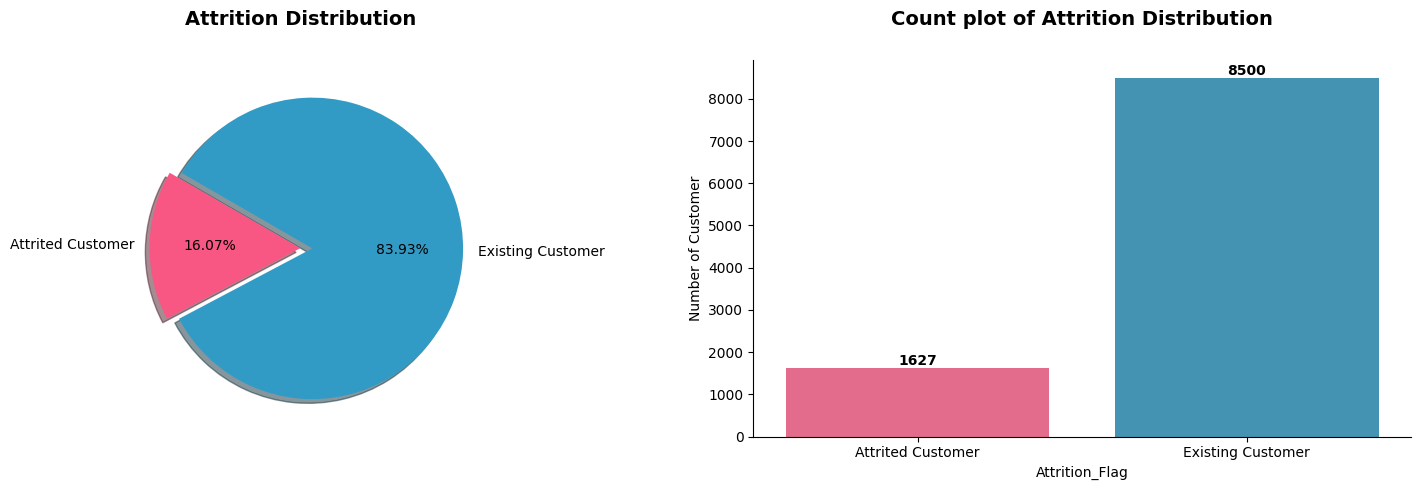

In [17]:
attrition_Distribution  = df_customer_churn["Attrition_Flag"].value_counts().loc[["Attrited Customer", "Existing Customer"]]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15, 5))
# ax[0]
ax[0].pie(
    attrition_Distribution,
    labels = ["Attrited Customer", "Existing Customer"],
    colors = color(n_colors=2),
    autopct = "%1.2f%%",
    startangle = 150,
    explode = (0, 0.08),
    shadow= True
)
ax[0].set_title("Attrition Distribution", weight="bold", fontsize=14, pad=25)

# ax[1]
sns.countplot(data=df_customer_churn, x = "Attrition_Flag", palette=color(n_colors=2), ax=ax[1])
ax[1].set_title("Count plot of Attrition Distribution", weight="bold", fontsize=14, pad=25)
for container in ax[1].containers:
    ax[1].bar_label(container, fmt="%d", label_type="edge", fontsize=10, weight="bold")
ax[1].set_ylabel("Number of Customer")
sns.despine(ax=ax[1], top=True, right=True, left=False, bottom=False)

plt.tight_layout()
plt.show()

**Insights:** <br>
- Around `16.07%` customers has attrited, which reflects a realistic churn rate in the banking sector.
- Although the data is imbalanced, it is not incorrect — it naturally reflects actual customer behavior.

## Numerical Feature Distributions

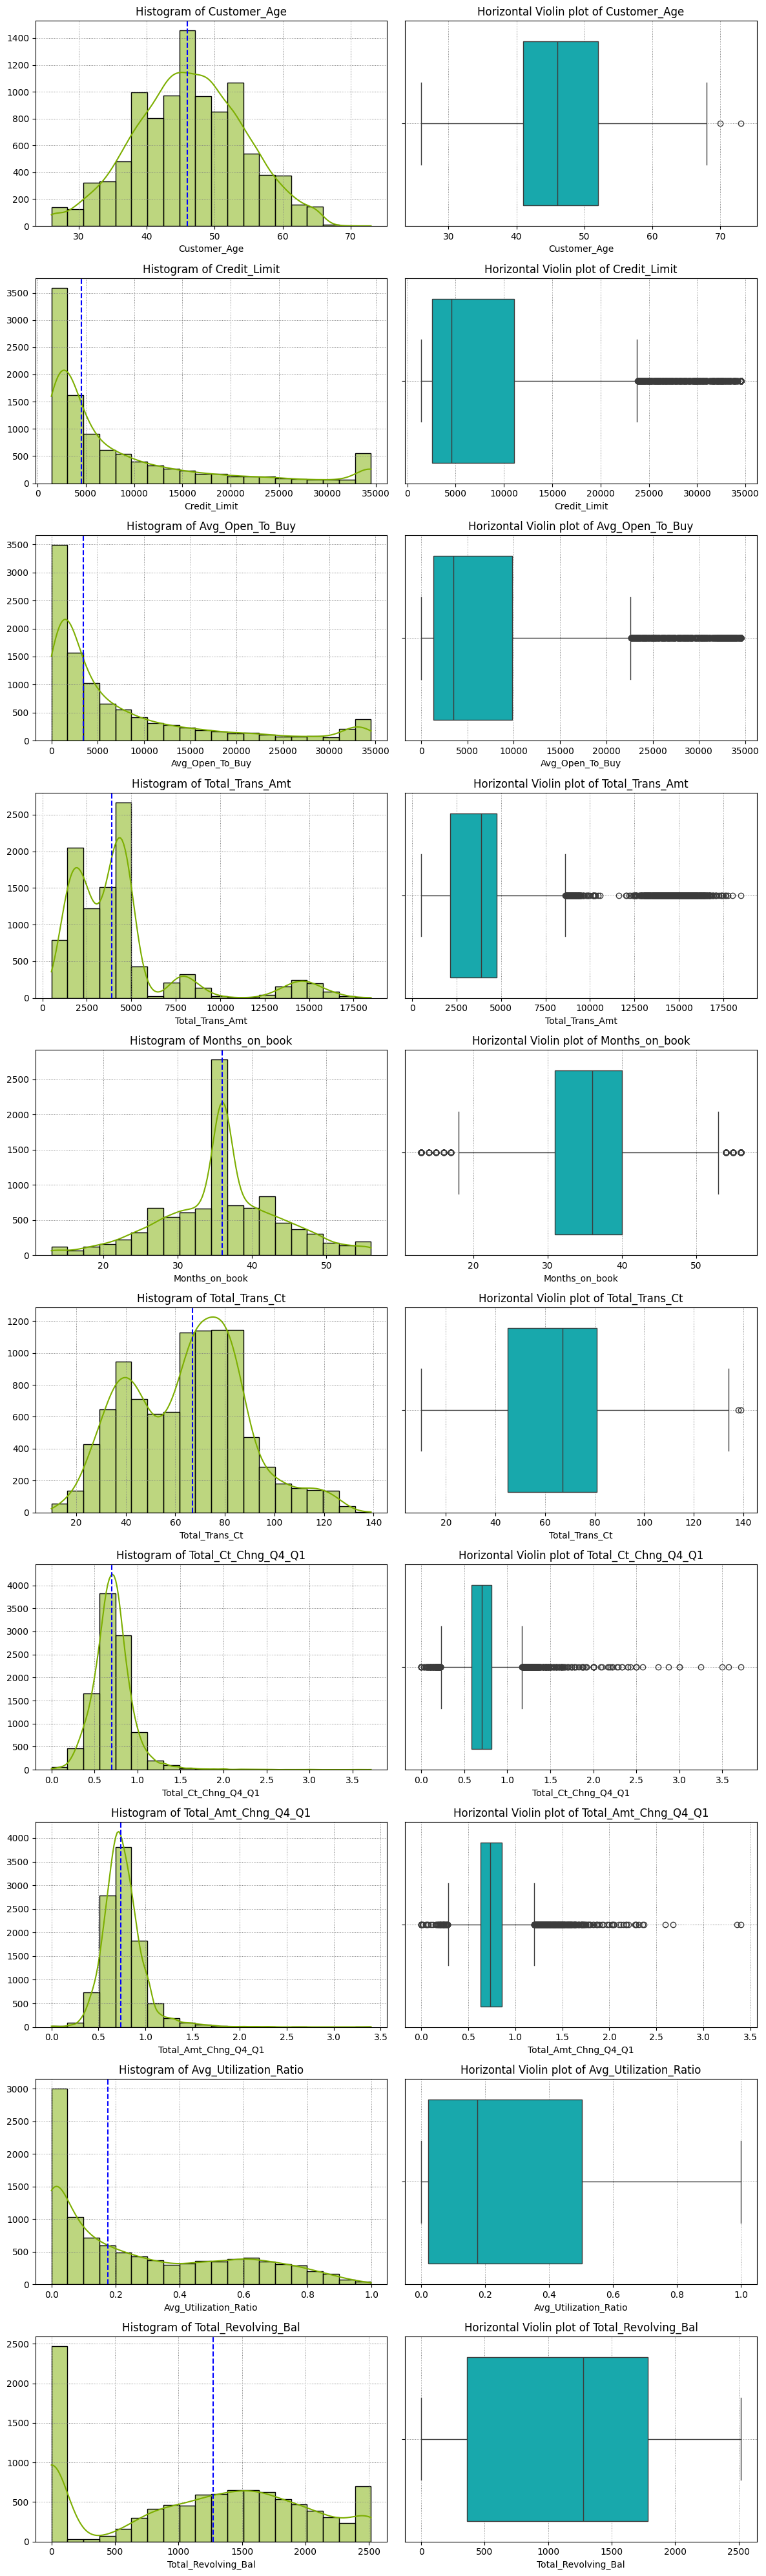

In [18]:
def plot_numerical_features(df=df_customer_churn, numerical_features = num_features):
    fig, axes = plt.subplots(len(numerical_features), 2, figsize=(12, len(numerical_features)*4))
    axes = np.atleast_2d(axes)

    for i, feature in enumerate(numerical_features):
        sns.histplot(data=df[feature], color="#7CAE00", bins = 20, kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f"Histogram of {feature}")
        axes[i, 0].set_ylabel("")
        axes[i, 0].grid(color="gray", linestyle=":", linewidth=0.7)
        axes[i, 0].axvline(df[feature].median(), color="blue", linestyle="--", label="Median Train")

        sns.boxplot(data=df[feature], color="#00BFC4", orient="h", ax=axes[i, 1])
        axes[i, 1].set_title(f"Horizontal Violin plot of {feature}")
        axes[i, 1].set_xlabel(feature)
        axes[i, 1].grid(color="gray", linestyle=":", linewidth=0.7)

    plt.tight_layout()
    plt.show()

plot_numerical_features()

In [19]:
def check_skewness(data = df_customer_churn, numerical_features = num_features, highlight=True, sort=True):
    skewness_dict = {}
    skew_feature = []
    for feature in numerical_features:
        skew = data[feature].skew(skipna=True)
        skewness_dict[feature] = skew

    skew_df = pd.DataFrame.from_dict(skewness_dict, orient="index", columns=["Skewness"])
    if sort:
        skew_df = skew_df.reindex(skew_df["Skewness"].abs().sort_values(ascending=False).index)
    else:
        pass
    
    print(f"\n🔍 Skewness for dataset:")
    print("-"*70)
    print(f"{'Feature':<30} | {'Skewness':<10} | {'Remark'}")
    print("-"*70)
    for feature, row in skew_df.iterrows():
        skew = row["Skewness"]
        abs_skew = abs(skew)
        if abs_skew > 1:
            remark = "Highly skewed"
            color = "\033[91m"  
        elif abs_skew > 0.5:
            remark = "Moderately skewed"
            color = "\033[93m"  
        else:
            remark = "Approximately symmetric"
            color = ""
        endc = "\033[0m" if color else ""
        if highlight and color:
            print(f"{color}{feature:<30} | {skew:>+10f} | {remark}{endc}")
            skew_feature.append(feature)
        else:
            print(f"{feature:<30} | {skew:>+10f} | {remark}")
    print("-"*70)
    return skew_feature, skew_df

skew_feature, skew_df = check_skewness()


🔍 Skewness for dataset:
----------------------------------------------------------------------
Feature                        | Skewness   | Remark
----------------------------------------------------------------------
Total_Ct_Chng_Q4_Q1            |  +2.064031 | Highly skewed
Total_Trans_Amt                |  +2.041003 | Highly skewed
Total_Amt_Chng_Q4_Q1           |  +1.732064 | Highly skewed
Credit_Limit                   |  +1.666726 | Highly skewed
Avg_Open_To_Buy                |  +1.661697 | Highly skewed
Avg_Utilization_Ratio          |  +0.718008 | Moderately skewed
Total_Trans_Ct                 |  +0.153673 | Approximately symmetric
Total_Revolving_Bal            |  -0.148837 | Approximately symmetric
Months_on_book                 |  -0.106565 | Approximately symmetric
Customer_Age                   |  -0.033605 | Approximately symmetric
----------------------------------------------------------------------


### Insights on Numerical Feature Distributions

**Shape and Spread of Distributions**

- **Histograms** reveal that all features are distributed fairly evenly across their respective ranges.
- **Box plot** confirm that the central 50% of values (the interquartile range), and the whiskers (showing the range).

**Skewness Analysis**

- The **skewness values** for numerical features (`Total_Trans_Ct`, `Months_on_book`, `Customer_Age` and `Total_Revolving_Bal`) in dataset are less than 0.5, indicating that the distributions are **approximately symmetric**. which means:

- The features: `Total_Ct_Chng_Q4_Q1`, `Total_Trans_Amt`, `Total_Amt_Chng_Q4_Q1`, `Credit_Limit`, `Avg_Open_To_Buy`, `Avg_Utilization_Ratio`  have **skewness values** greater than 0.5, indicating that the distributions are **Highly/Moderately symmetric**. Many model assumes **normal distribution** but in reality data points may not be perfectly symmetric. If the data are skewed, then this kind of model will always underestimate the skewness risk.The more the data is skewed the less accurate the model will be. We need to handle skewness in chapter **Data Preprocessing**

### Correlation Analysis of Numerical Features

1. **What is Correlation?**

**Correlation** measures the **strength and direction of a linear relationship** between two variables.

* The correlation coefficient (usually denoted as **r**) ranges from **-1 to 1**.

2. **Interpretation of Correlation Values**

| Value of r | Relationship Type           | Interpretation                               |
| ---------- | --------------------------- | -------------------------------------------- |
| `r ≈ 1`    | Strong positive correlation | As X increases, Y also increases linearly    |
| `r ≈ -1`   | Strong negative correlation | As X increases, Y decreases linearly         |
| `r ≈ 0`    | No linear correlation       | No clear linear relationship between X and Y |

**Common interpretation of |r|**

![](https://i.ibb.co/TQ3FbQK/correlation.png)

3. **Pearson Correlation Formula**

$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \cdot \sum (y_i - \bar{y})^2}}
$$

* $x_i, y_i$: observed values
* $\bar{x}, \bar{y}$: sample means of X and Y.

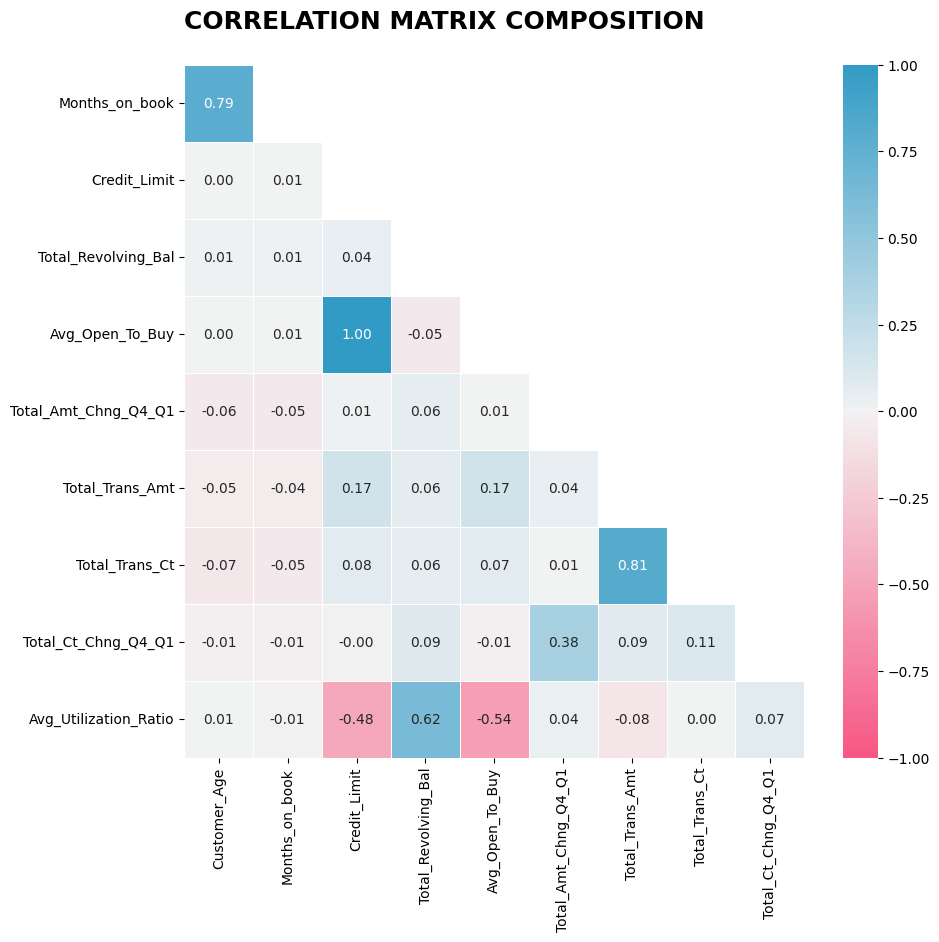

In [20]:
corr_matrix = df_customer_churn.drop(columns="CLIENTNUM", axis=1).corr(numeric_only=True)
# one_like can build a matrix of boolean(True, False) with the same shape as our data
ones_corr = np.ones_like(corr_matrix, dtype=bool)
mask = np.triu(ones_corr)
adjusted_mask = mask[1:, :-1]
adjusted_cereal_corr = corr_matrix.iloc[1:, :-1]

fig, ax = plt.subplots(figsize = (10, 9))
# That method uses HUSL colors, so you need hue, saturation, and lightness. 
# I used hsluv.org to select the colors of this chart.
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(data=adjusted_cereal_corr, mask=adjusted_mask,
            annot=True, fmt=".2f", cmap=cmap,
            vmin=-1, vmax=1, linecolor="white", linewidths=0.5)

title = "CORRELATION MATRIX COMPOSITION\n"
ax.set_title(title, loc="left", fontsize=18, weight="bold");

## **Insights from Correlation Analysis of Numerical Features**

**1. Overall Weak Correlation Pattern**

* Most numerical features exhibit **correlation coefficients near 0**.
* Indicates **minimal linear dependency** among feature pairs.

> **Implication**: No sign of multicollinearity → suitable for models that assume feature independence (e.g., **Logistic Regression**) as well as **tree-based models** (e.g., RandomForest, XGBoost).

**2. Notable Positive Correlations**

| Feature Pair                                    | Correlation | Interpretation                                                                        |
| ----------------------------------------------- | ----------- | ------------------------------------------------------------------------------------- |
| `Total_Trans_Ct` & `Total_Trans_Amt`            | **0.81**    | Higher transaction count usually corresponds to higher transaction amounts.           |
| `Months_on_book` & `Customer_Age`               | **0.79**    | Older customers tend to have longer banking relationships.                            |
| `Total_Ct_Chng_Q4_Q1` & `Total_Amt_Chng_Q4_Q1`  | **0.38**    | Changes in transaction frequency moderately align with changes in transaction amount. |
| `Avg_Utilization_Ratio` & `Total_Revolving_Bal` | **0.62**    | Customers with high utilization tend to carry larger revolving balances.              |

**3. Moderate Negative Correlations**

| Feature Pair                                | Correlation | Interpretation                                                             |
| ------------------------------------------- | ----------- | -------------------------------------------------------------------------- |
| `Avg_Utilization_Ratio` & `Avg_Open_To_Buy` | **-0.54**   | Higher utilization reduces available credit → inverse relationship.        |
| `Avg_Utilization_Ratio` & `Credit_Limit`    | **-0.48**   | Customers with higher credit limits generally use a smaller portion of it. |


**Summary**

| Observation                                     | Actionable Insight                                       |
| ----------------------------------------------- | -------------------------------------------------------- |
| Weak overall correlations                       | Features are not redundant → preserve full feature set   |
| Strong link: `Trans_Ct` ↔ `Trans_Amt`           | Confirms purchase frequency correlates with volume       |
| `Avg_Utilization_Ratio` as behavioral indicator | Valuable signal for **credit risk and churn prediction** |

## Categorical Feature Distributions

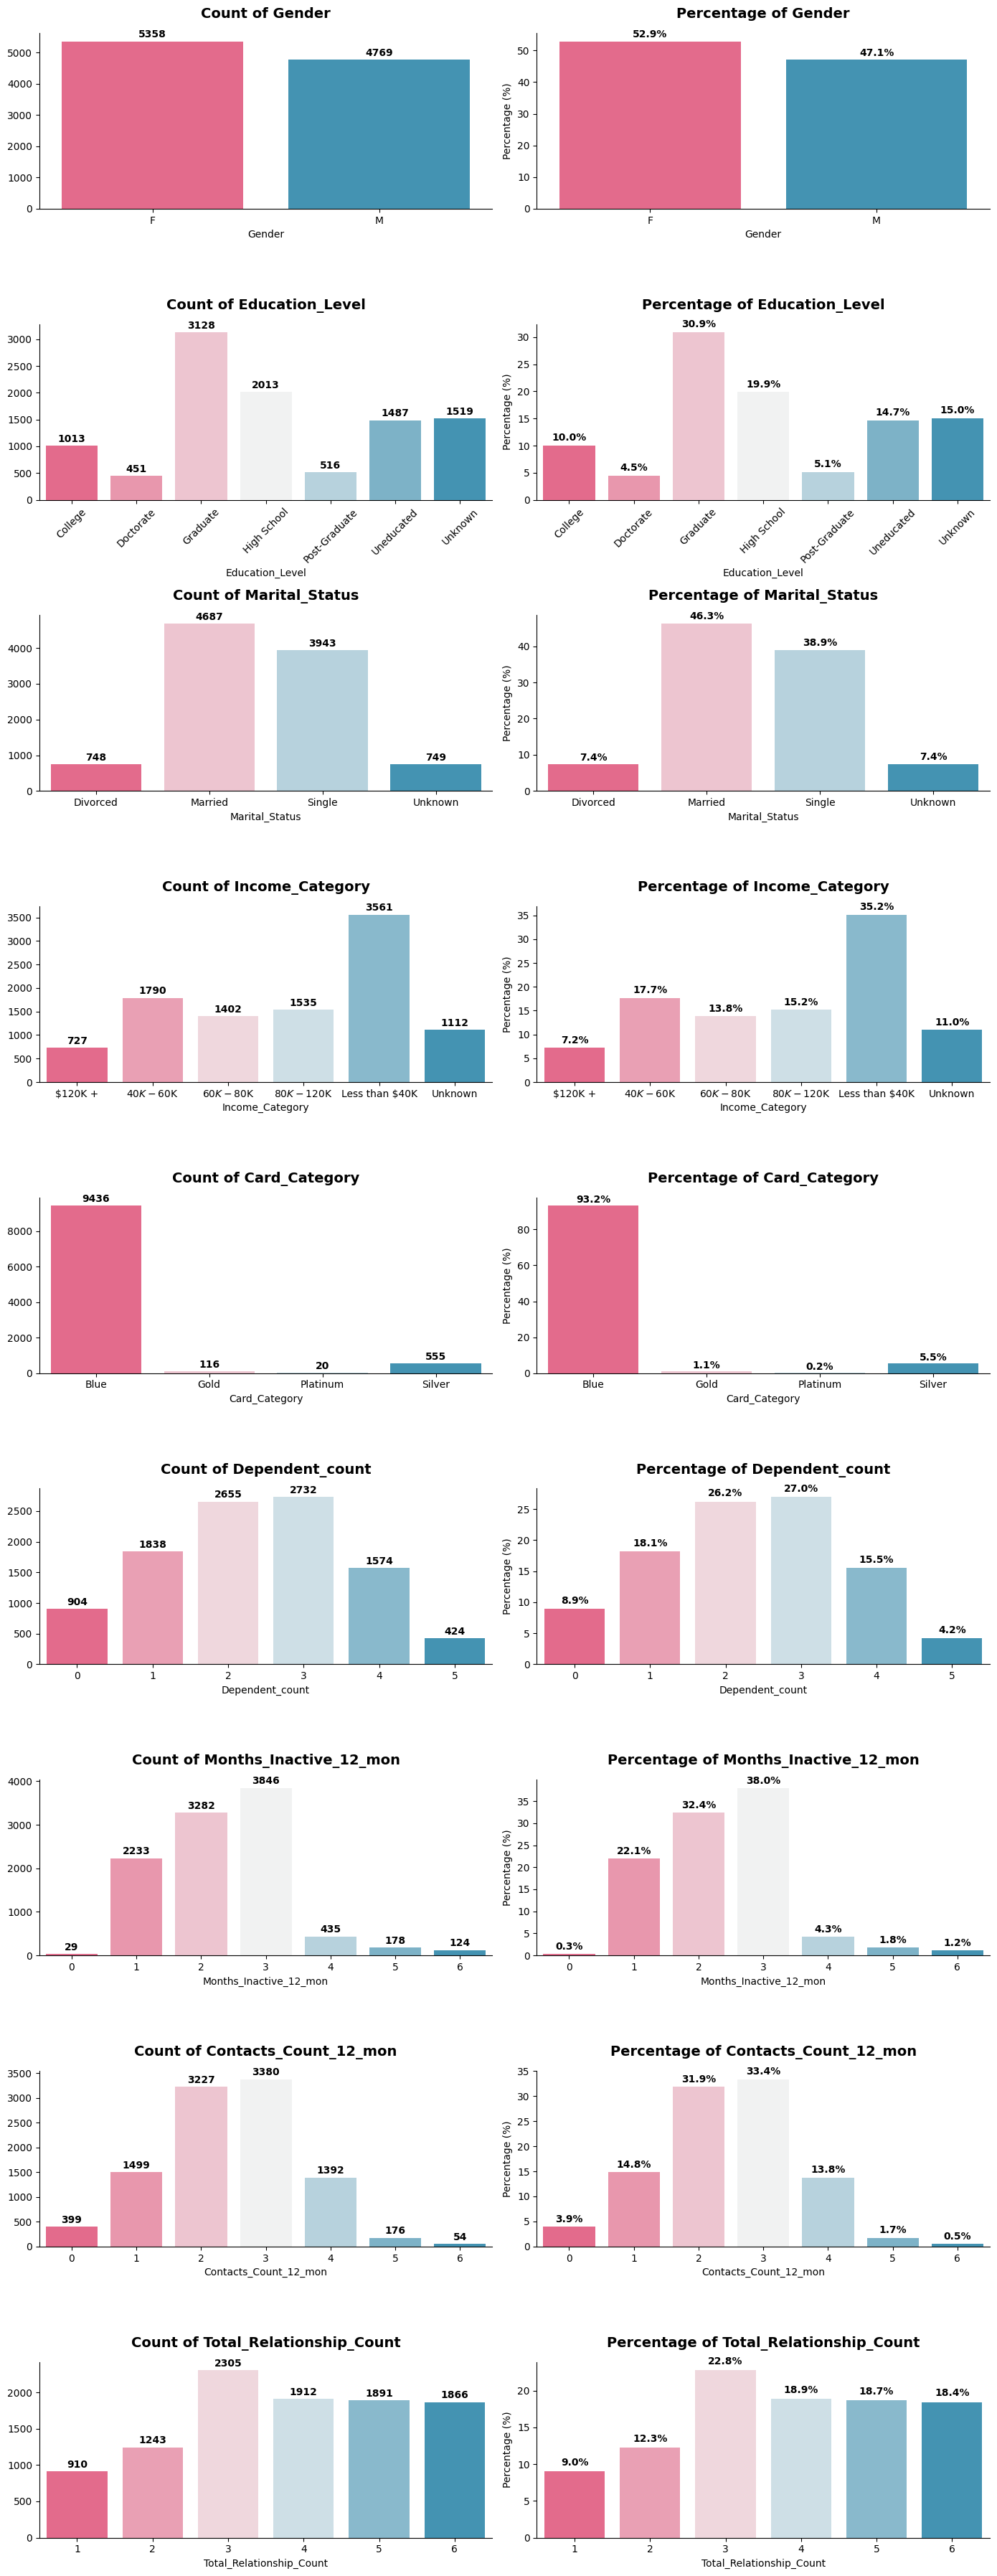

In [21]:
def plot_categorical_distribution(df, cat_features):
    fig, ax = plt.subplots(len(cat_features), 2, figsize=(14, len(cat_features)*4))
    ax = np.atleast_2d(ax)

    for i, feature in enumerate(cat_features):
        # ----------------------------
        # LEFT: Vertical Countplot
        # ----------------------------
        sns.countplot(data=df, x=feature, ax=ax[i, 0],
                      palette=color(n_colors=len(df[feature].unique())))
        
        ax[i, 0].set_title(f"Count of {feature}", fontsize=14, pad=15, weight="bold")
        ax[i, 0].set_xlabel(feature)
        if feature == "Education_Level":
            ax[i, 0].set_xticklabels(labels = ax[i, 0].get_xticklabels(), rotation = 45)
        ax[i, 0].set_ylabel("")
        sns.despine(ax=ax[i, 0], top=True, right=True)

        # Add count labels on top
        for p in ax[i, 0].patches:
            height = p.get_height()
            x = p.get_x() + p.get_width() / 2
            ax[i, 0].text(x, height + max(df[feature].value_counts()) * 0.01,
                          f"{int(height)}",
                          ha="center", va="bottom", fontsize=10, fontweight="bold")

        # ----------------------------
        # RIGHT: Barplot with % labels
        # ----------------------------
        feature_counts = df[feature].value_counts(normalize=True).sort_index()
        percentage_df = feature_counts.mul(100).round(2).reset_index()
        percentage_df.columns = [feature, "Percentage"]

        sns.barplot(data=percentage_df, x=feature, y="Percentage",
                    ax=ax[i, 1],
                    palette=color(n_colors=len(feature_counts)))
        
        ax[i, 1].set_title(f"Percentage of {feature}", fontsize=14, pad=15, weight="bold")
        ax[i, 1].set_ylabel("Percentage (%)")
        if feature == "Education_Level":
            ax[i, 1].set_xticklabels(labels = ax[i, 1].get_xticklabels(), rotation = 45)
        ax[i, 1].set_xlabel(feature)
        sns.despine(ax=ax[i, 1], top=True, right=True)

        # Add % labels on top
        for p in ax[i, 1].patches:
            height = p.get_height()
            x = p.get_x() + p.get_width() / 2
            ax[i, 1].text(x, height + 0.5,
                          f"{height:.1f}%",
                          ha="center", va="bottom", fontsize=10, fontweight="bold")

    plt.tight_layout()
    plt.show()

cat_features.remove("Attrition_Flag")
plot_categorical_distribution(df=df_customer_churn, cat_features=cat_features)

**Categorical Feature Distribution**

**1. Attrition Flag (Target Variable)**

* **Existing Customers** account for **83.9%** → the dataset is clearly **imbalanced**.
* → Apply techniques like **SMOTE**, **class weights**, or **threshold tuning**.

**2. Gender**

* Nearly balanced: **Female (52.9%)**, **Male (47.1%)**.
* → No special handling required.

**3. Education Level**

* **Graduate (30.9%)** and **Uneducated (24.7%)** dominate.
* **Doctorate** and **Post-Graduate** are rare (<10%) → consider grouping.
* **Unknown = 15.0%** → retained and captured via `is_unknown_education_level`.

**4. Marital Status**

* **Married** customers dominate (**46.3%**) → indicates stable demographic.
* **Unknown = 7.4%** → retained or grouped; already represented by `is_unknown_marital_status`.

**5. Income Category**

* Most customers earn **less than \$40K (35.2%)**.
* High-income group (`> \$120K`) only **7.2%** → can be grouped as `"High income"`.
* **Unknown = 11.0%** → potentially meaningful → tracked via `is_unknown_income_category`.

**6. Card Category**

* **Blue cards** dominate (**93.2%**); other types are rare.
* → Recommend grouping into `"Blue"` vs `"Other"` to simplify modeling.

**7. Dependent Count**

* Most customers have **1–3 dependents**.
* Very few have 5 → consider grouping `"4+"`.

**8. Months Inactive (Last 12 Months)**

* Inactivity mainly spans **2–3 months** → generally stable.
* Very few customers are inactive for more than 4 months.

**9. Contact Count (Last 12 Months)**

* **2–3 contacts/year** is most common (**\~65%**).
* Customers with **0–1 contact** may be **disengaged or at risk** → investigate churn link.

**10. Total Relationship Count**

* Fairly even spread across 2–6 products.
* Only **9%** have just 1 relationship → possibly at higher churn risk.

**Summary & Recommended Actions**

| Observation                               | Suggested Action                                            |
| ----------------------------------------- | ----------------------------------------------------------- |
| Target imbalance (`Attrition_Flag`)       | Use **SMOTE**, **class weighting**, or **threshold tuning** |
| Skewed category distributions             | **Group rare levels** to improve model stability            |
| "Unknown" values in categorical features  | Keep "Unknown" values.                                      |
| Behavioral indicators (e.g., low contact) | Investigate as **potential churn predictors**               |
| All categorical features                  | Ready for **One-hot or Ordinal Encoding**                   |

## Bivariate Analysis

In [22]:
from IPython.core.display import HTML
# defining function for plotting
def bivariate_percent_plot(cat, df, figsize=(15, 6), order = None, rot = 0):
    
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:blue;'><b>Distribution of {cat} by Attrition_Flag</b></h2>"))
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=figsize)
    # Plot 1
    # Calculate the total number of each "cat" by Attrition_Flag
    grouped = df.groupby([cat, "Attrition_Flag"]).size().unstack(fill_value=0)
    # Calculate the percentages
    percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100
    if order is not None:
        percentages = percentages.loc[order]
        labels = order
    else:
        labels = percentages.index

    # That method uses HUSL colors, so you need hue, saturation, and lightness. 
    # I used hsluv.org to select the colors of this chart.
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    # Draw stacked bar plot
    ax[0] = percentages.plot(kind="bar", stacked=True, cmap=cmap, ax = ax[0], use_index=True)
    for container in ax[0].containers:
        ax[0].bar_label(container, fmt='%1.0f%%', label_type="center", weight="bold", fontsize=10)

    ax[0].set_title(f"Percentage of Attrition by {cat}", fontsize=14, weight="bold")
    ax[0].set_xlabel(f"{cat}", fontsize=12)
    ax[0].set_ylabel("% Attrition Rate", fontsize=12)
    if cat in  ["Education_Level", "Income_Category"]:
        ax[0].set_xticklabels(labels = labels, rotation = 45)
    else:
        ax[0].set_xticklabels(labels = labels, rotation = rot)
    ax[0].legend_.remove()
    # ax[0].grid(color="gray", linestyle=":", linewidth=0.7)
    sns.despine(left=False, bottom=False, ax=ax[0])

    # Plot 2
    sns.countplot(data=df, hue = "Attrition_Flag", x = cat,
                palette=color(n_colors=2), ax=ax[1], order=order)
    # Show value for each bar.
    for container in ax[1].containers:
        ax[1].bar_label(container, fmt='%d', label_type="edge", fontsize=10, weight="bold")

    ax[1].set_title(f"Attrition by {cat}", fontsize=14, weight="bold")
    ax[1].set_xlabel(f"{cat}", fontsize=12)
    ax[1].set_ylabel("Number of Customer", fontsize=12)
    ax[1].legend(title="Attrition", bbox_to_anchor=(1.05, 1), loc="upper left")
    if cat in  ["Education_Level", "Income_Category"]:
        ax[1].set_xticklabels(labels = ax[1].get_xticklabels(), rotation = 45)
    else:
        ax[1].set_xticklabels(labels = ax[1].get_xticklabels(), rotation = rot)
    # ax[1].grid(color="gray", linestyle=":", linewidth=0.7)
    sns.despine(left=False, bottom=False, ax=ax[1])
    plt.tight_layout()
    plt.show()

    cal_ChiSquare(cat_feature=cat, target_feature="Attrition_Flag", df=df, show_residuals=True)

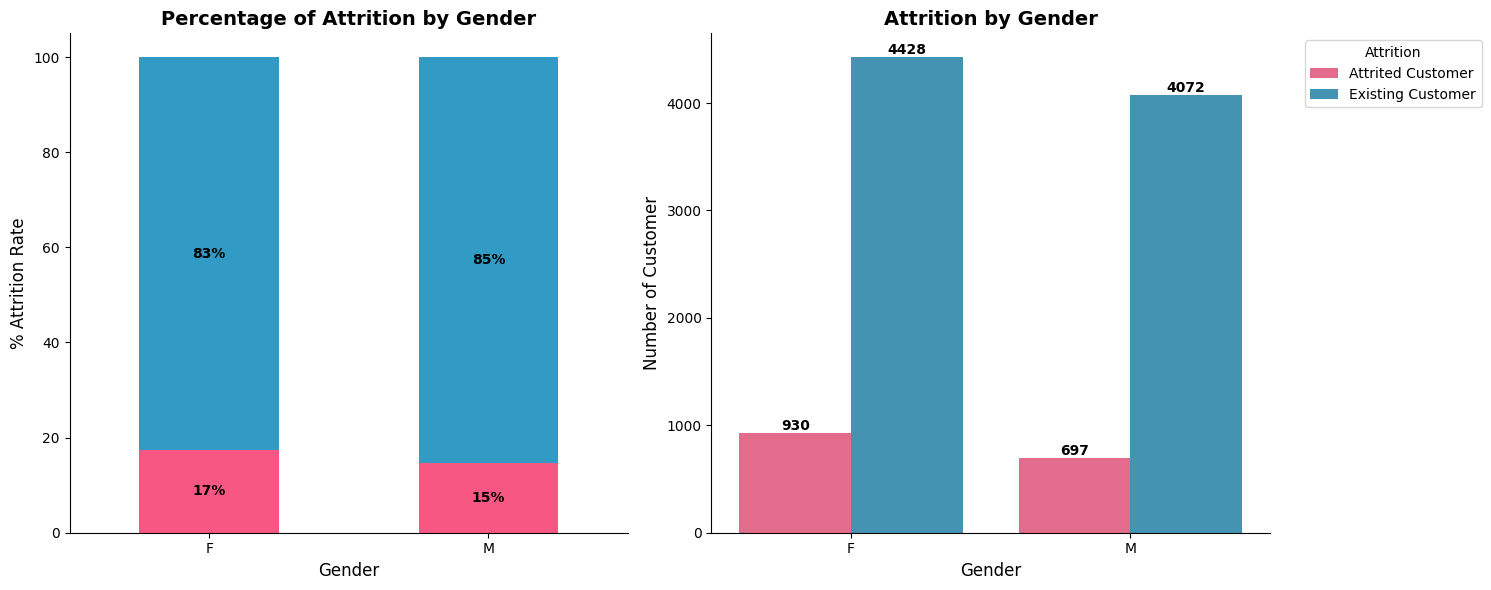


🔍 Chi-Square Test of Independence: 'Gender' vs. 'Attrition_Flag'
Chi-squared statistic: 13.866
Degrees of freedom: 1
p-value: 0.000196
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Gender' and 'Attrition_Flag'.

Standardized Residuals:
Attrition_Flag  Attrited Customer  Existing Customer
Gender                                              
F                            2.36              -1.03
M                           -2.50               1.09


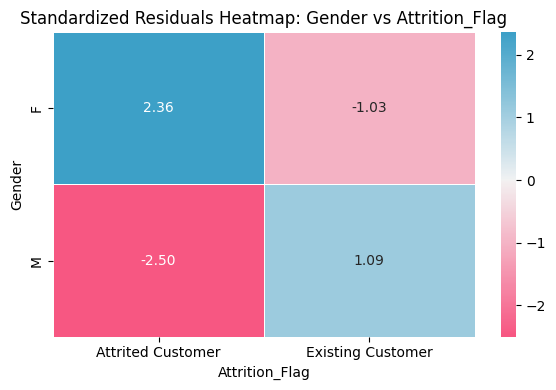

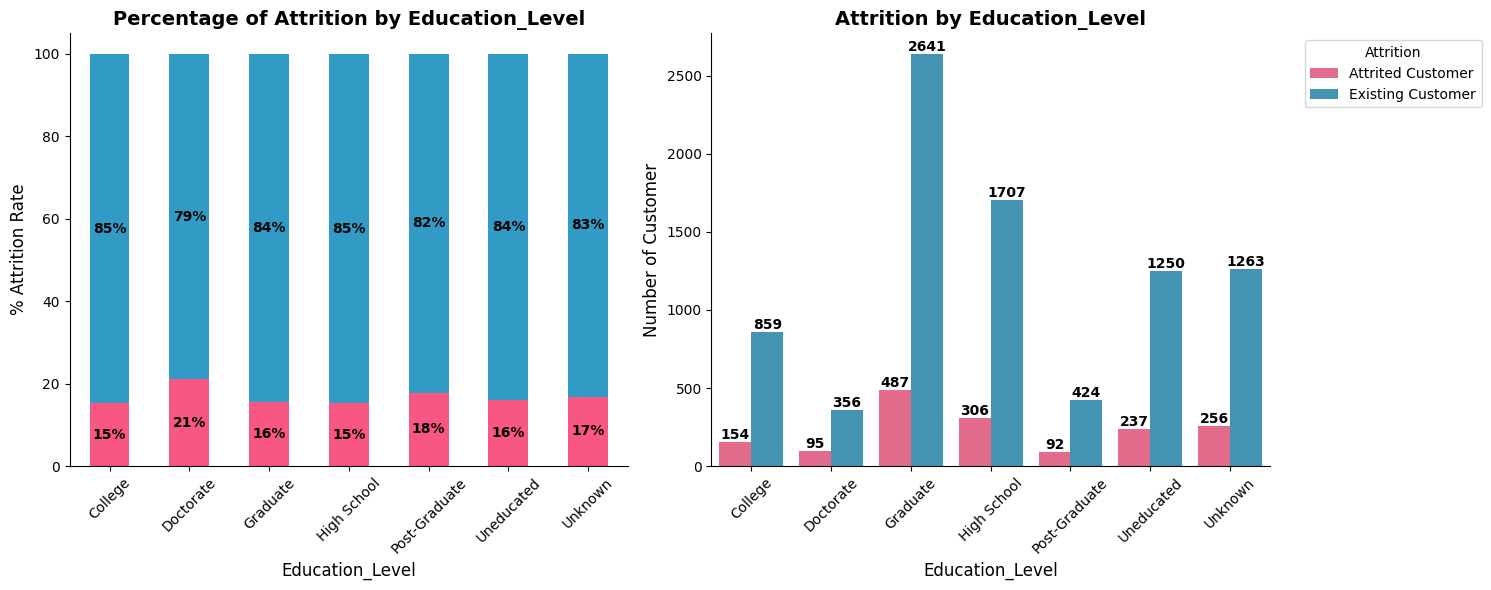


🔍 Chi-Square Test of Independence: 'Education_Level' vs. 'Attrition_Flag'
Chi-squared statistic: 12.511
Degrees of freedom: 6
p-value: 0.051489
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'Education_Level' and 'Attrition_Flag'.

Standardized Residuals:
Attrition_Flag   Attrited Customer  Existing Customer
Education_Level                                      
College                      -0.69               0.30
Doctorate                     2.65              -1.16
Graduate                     -0.69               0.30
High School                  -0.97               0.42
Post-Graduate                 1.00              -0.44
Uneducated                   -0.12               0.05
Unknown                       0.77              -0.33


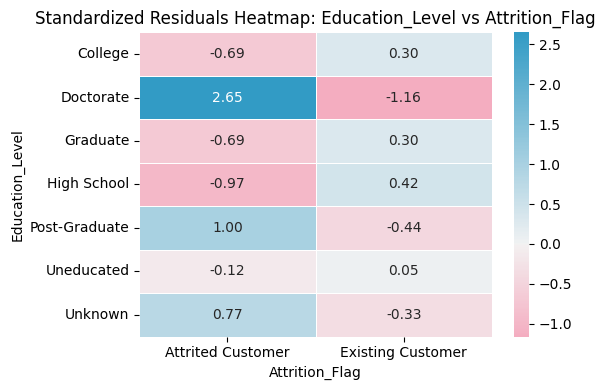

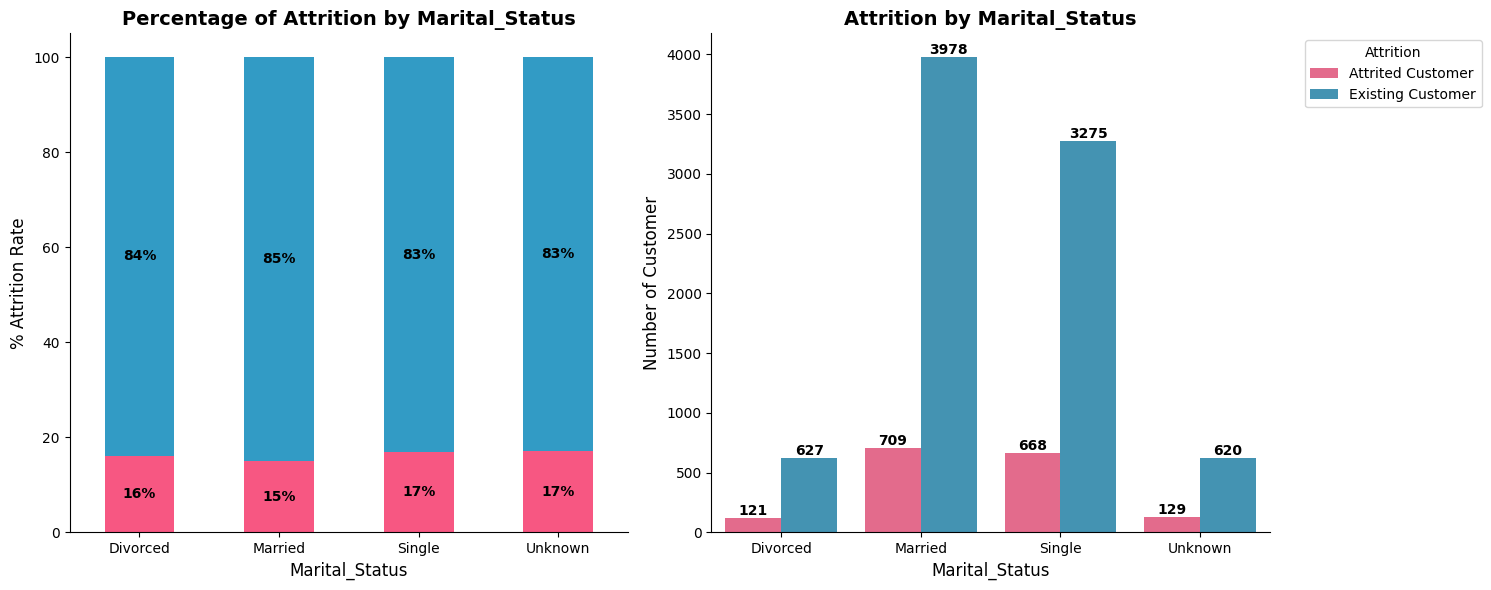


🔍 Chi-Square Test of Independence: 'Marital_Status' vs. 'Attrition_Flag'
Chi-squared statistic: 6.056
Degrees of freedom: 3
p-value: 0.108913
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'Marital_Status' and 'Attrition_Flag'.

Standardized Residuals:
Attrition_Flag  Attrited Customer  Existing Customer
Marital_Status                                      
Divorced                     0.08              -0.03
Married                     -1.60               0.70
Single                       1.37              -0.60
Unknown                      0.79              -0.35


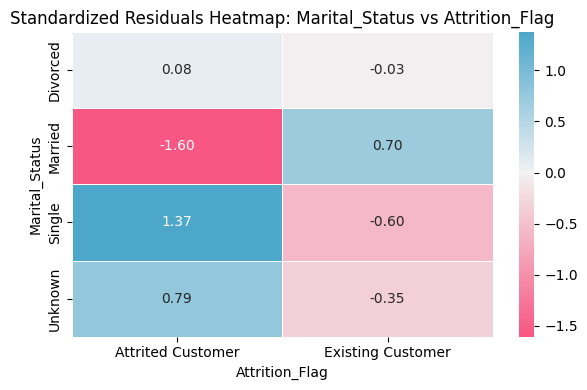

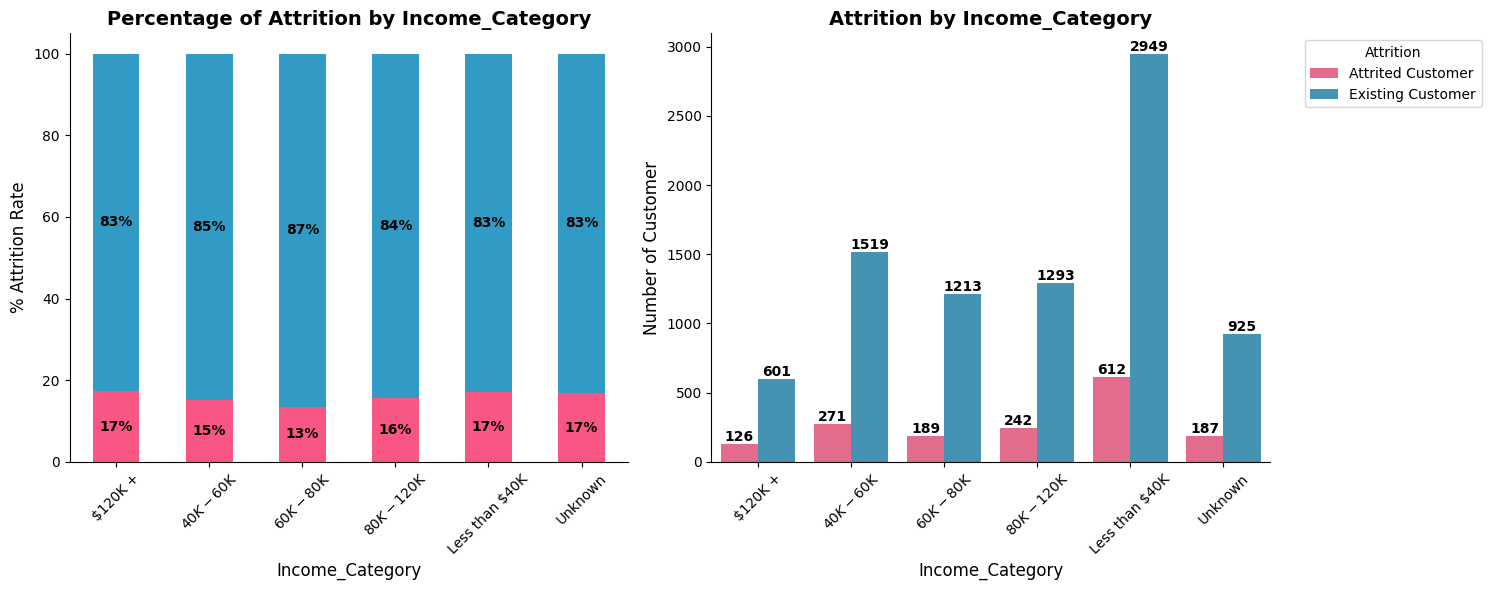


🔍 Chi-Square Test of Independence: 'Income_Category' vs. 'Attrition_Flag'
Chi-squared statistic: 12.832
Degrees of freedom: 5
p-value: 0.025002
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Income_Category' and 'Attrition_Flag'.

Standardized Residuals:
Attrition_Flag   Attrited Customer  Existing Customer
Income_Category                                      
$120K +                       0.85              -0.37
$40K - $60K                  -0.98               0.43
$60K - $80K                  -2.42               1.06
$80K - $120K                 -0.29               0.13
Less than $40K                1.67              -0.73
Unknown                       0.62              -0.27


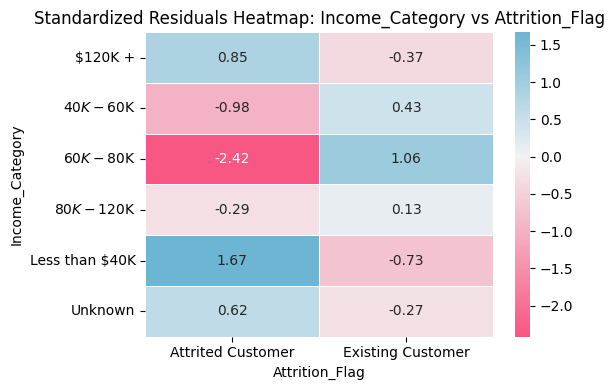

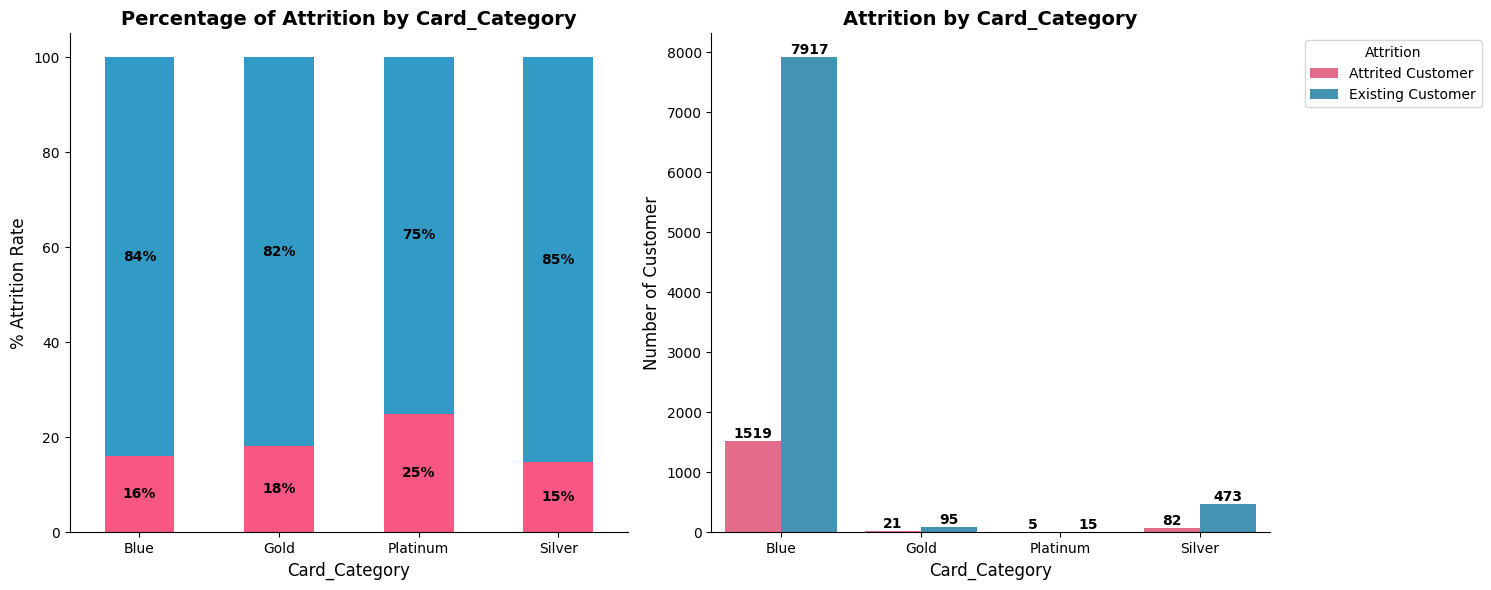


🔍 Chi-Square Test of Independence: 'Card_Category' vs. 'Attrition_Flag'
Chi-squared statistic: 2.234
Degrees of freedom: 3
p-value: 0.525238
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'Card_Category' and 'Attrition_Flag'.

Standardized Residuals:
Attrition_Flag  Attrited Customer  Existing Customer
Card_Category                                       
Blue                         0.08              -0.03
Gold                         0.55              -0.24
Platinum                     1.00              -0.44
Silver                      -0.76               0.33


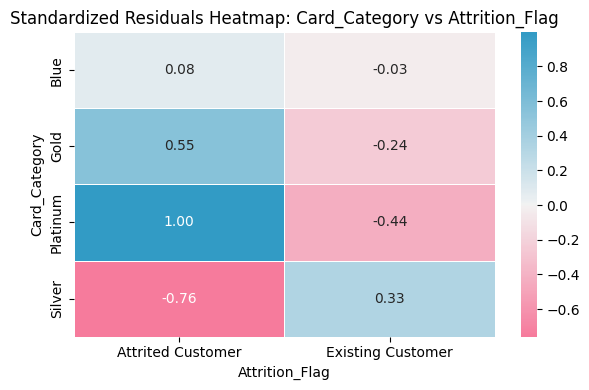

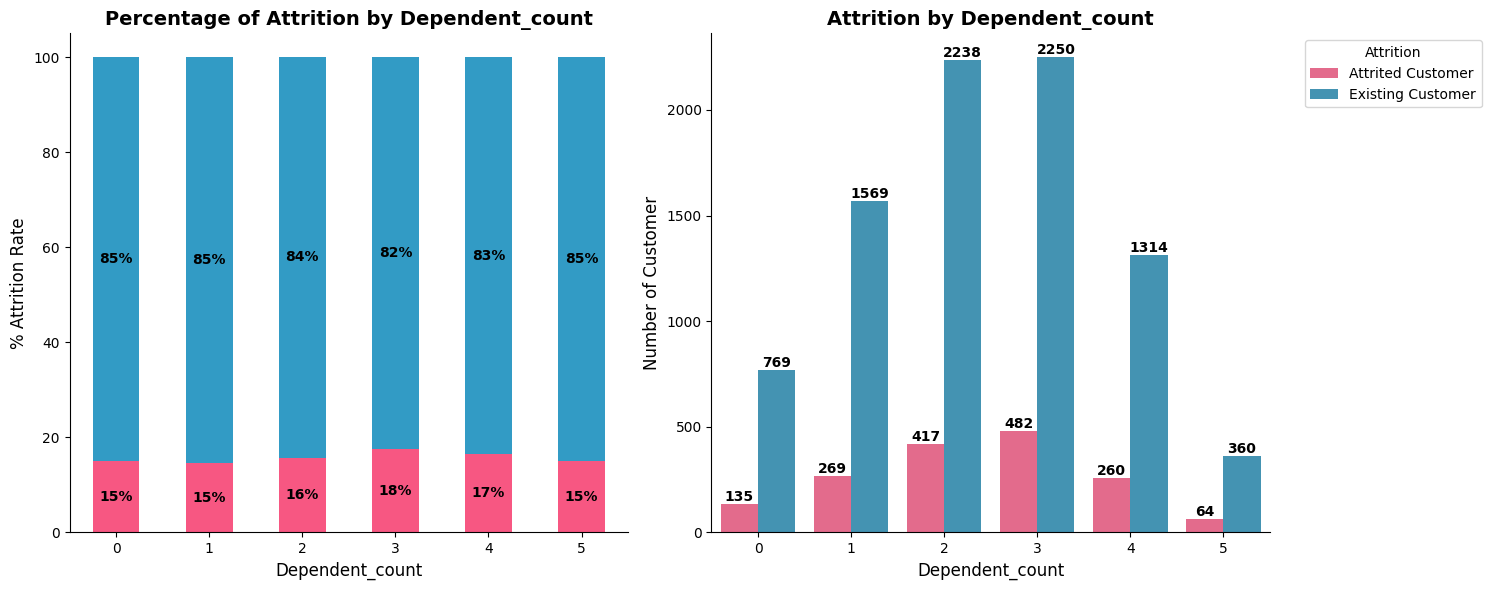


🔍 Chi-Square Test of Independence: 'Dependent_count' vs. 'Attrition_Flag'
Chi-squared statistic: 9.476
Degrees of freedom: 5
p-value: 0.091505
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'Dependent_count' and 'Attrition_Flag'.

Standardized Residuals:
Attrition_Flag   Attrited Customer  Existing Customer
Dependent_count                                      
0                            -0.85               0.37
1                            -1.53               0.67
2                            -0.46               0.20
3                             2.06              -0.90
4                             0.45              -0.20
5                            -0.50               0.22


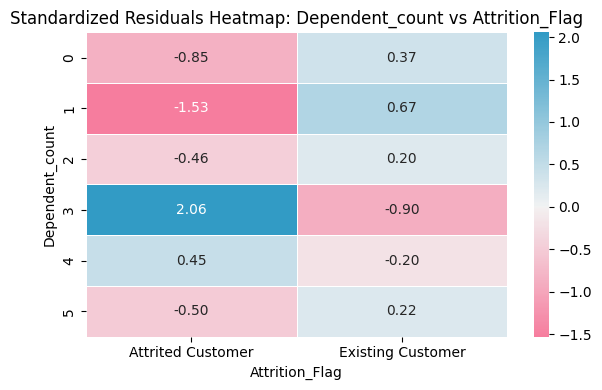

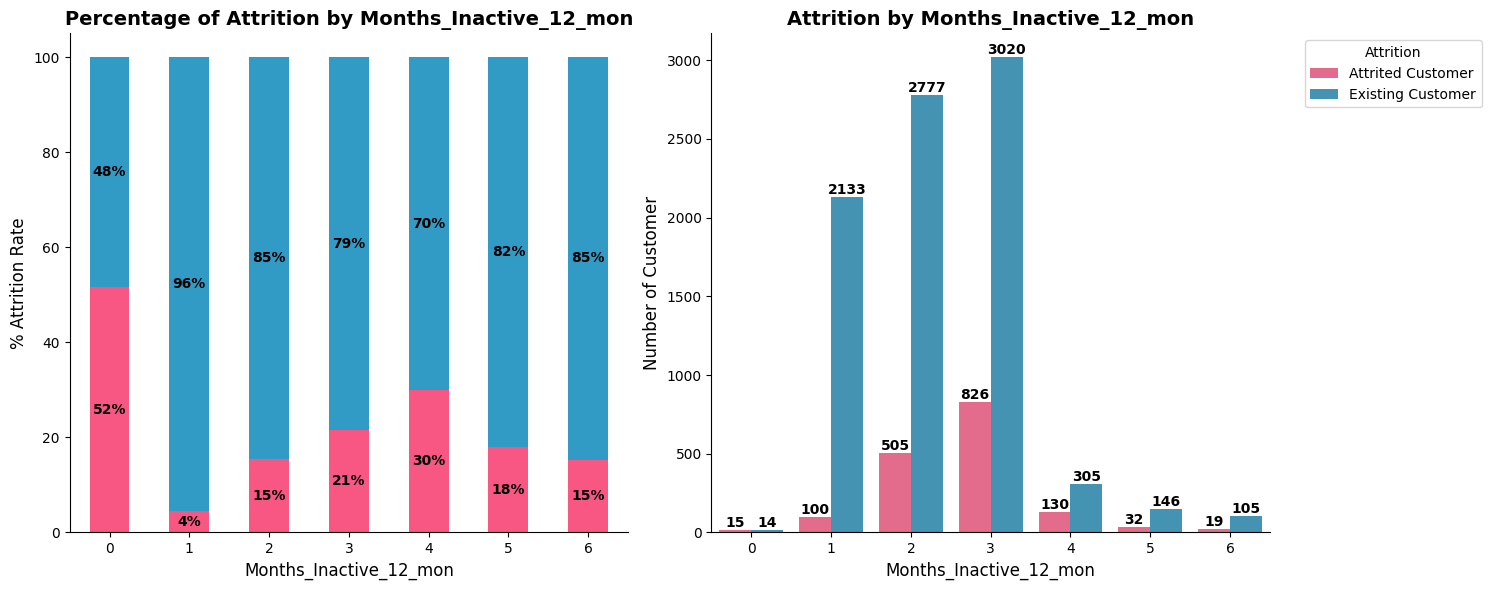


🔍 Chi-Square Test of Independence: 'Months_Inactive_12_mon' vs. 'Attrition_Flag'
Chi-squared statistic: 396.456
Degrees of freedom: 6
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Months_Inactive_12_mon' and 'Attrition_Flag'.

Standardized Residuals:
Attrition_Flag          Attrited Customer  Existing Customer
Months_Inactive_12_mon                                      
0                                    4.79              -2.10
1                                  -13.66               5.98
2                                   -0.97               0.42
3                                    8.37              -3.66
4                                    7.19              -3.15
5                                    0.64              -0.28
6                                   -0.21               0.09


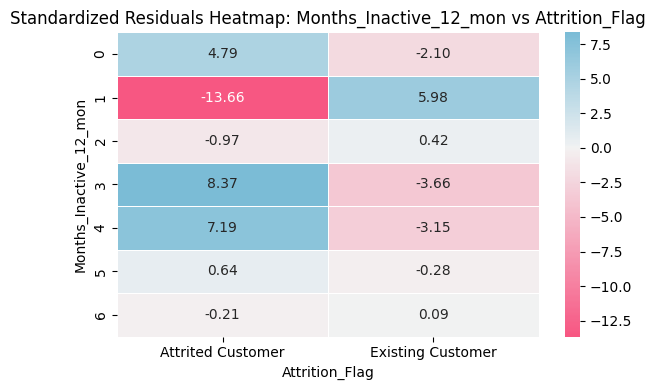

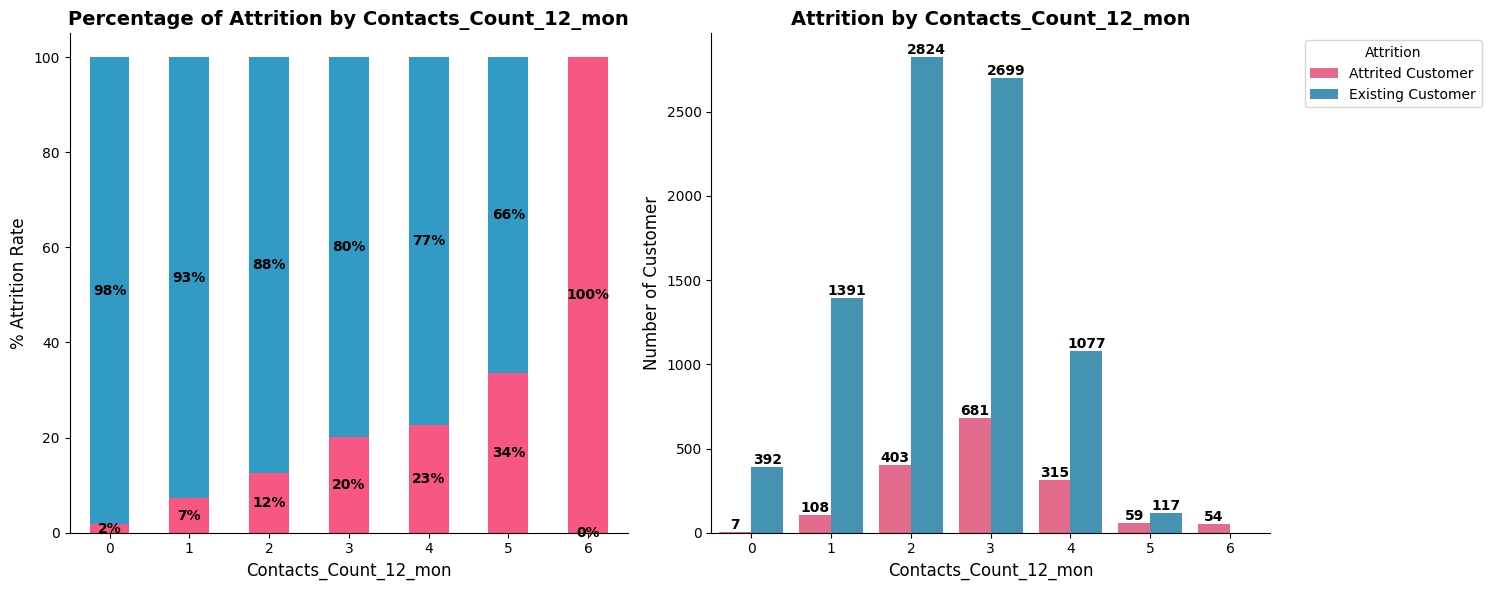


🔍 Chi-Square Test of Independence: 'Contacts_Count_12_mon' vs. 'Attrition_Flag'
Chi-squared statistic: 586.638
Degrees of freedom: 6
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Contacts_Count_12_mon' and 'Attrition_Flag'.

Standardized Residuals:
Attrition_Flag         Attrited Customer  Existing Customer
Contacts_Count_12_mon                                      
0                                  -7.13               3.12
1                                  -8.56               3.74
2                                  -5.07               2.22
3                                   5.92              -2.59
4                                   6.11              -2.67
5                                   5.78              -2.53
6                                  15.39              -6.73


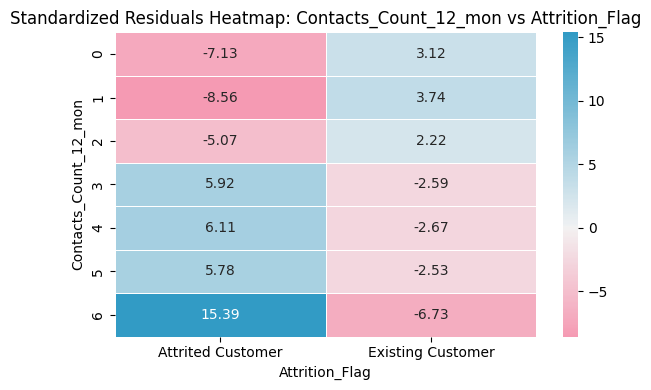

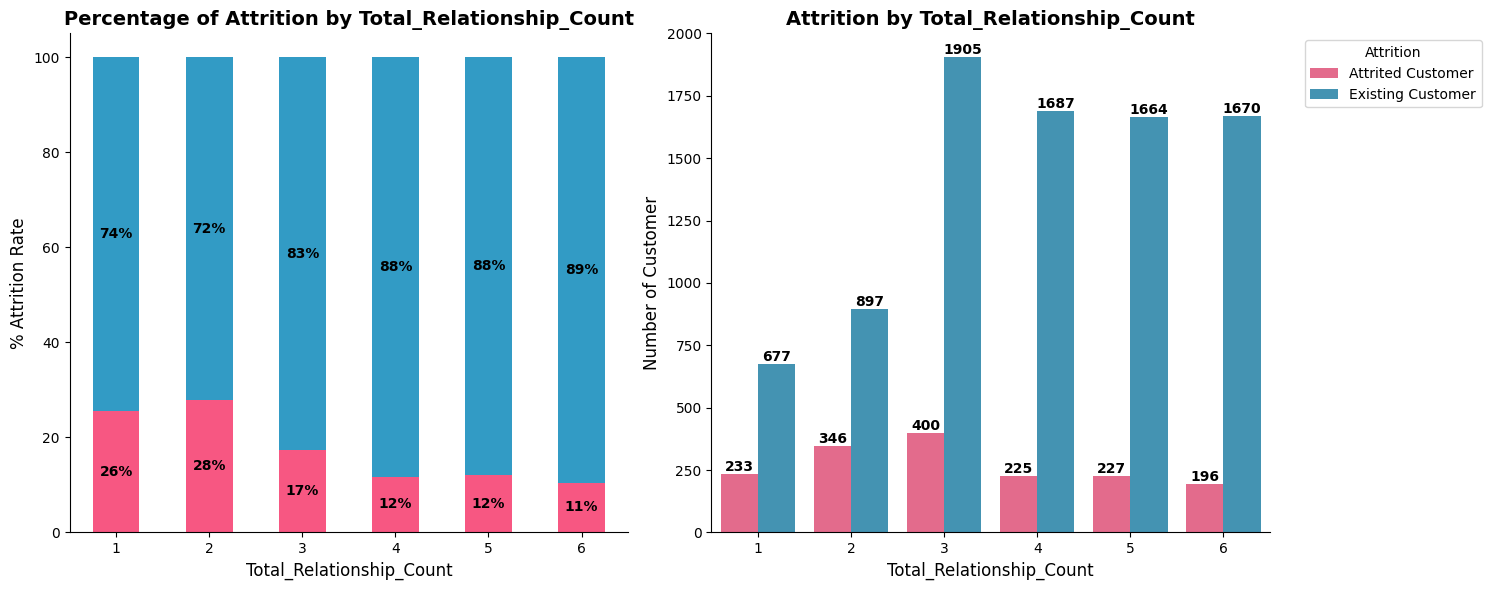


🔍 Chi-Square Test of Independence: 'Total_Relationship_Count' vs. 'Attrition_Flag'
Chi-squared statistic: 284.068
Degrees of freedom: 5
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Total_Relationship_Count' and 'Attrition_Flag'.

Standardized Residuals:
Attrition_Flag            Attrited Customer  Existing Customer
Total_Relationship_Count                                      
1                                      7.18              -3.14
2                                     10.35              -4.53
3                                      1.54              -0.67
4                                     -4.69               2.05
5                                     -4.41               1.93
6                                     -5.99               2.62


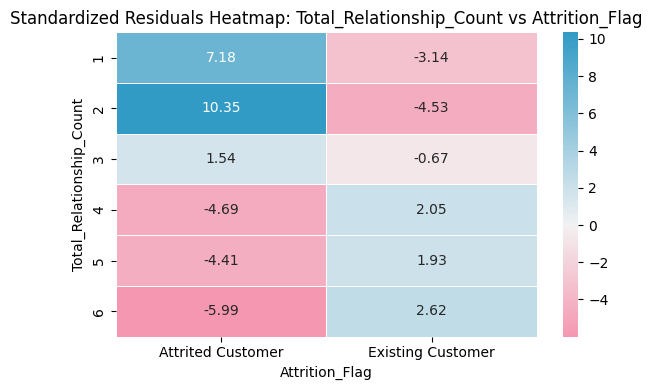

In [23]:
for feature in cat_features:
    bivariate_percent_plot(cat=feature, df= df_customer_churn)

### Insight for Categorical Features by Attrition

**1. Gender**

* Distribution is balanced: **Female (52.9%)**, **Male (47.1%)**
* **Statistically significant association** with churn (p = 0.0002)
* **Females are more likely to churn** (Residual = **+2.36**)
* **Males are less likely to churn** (Residual = **–2.50**)
* → Gender is a **mild but meaningful predictor** of attrition.

**2. Education_Level**

* **No statistically significant association** with churn (p = 0.051)
* However, Doctorate holders show unusually high churn (Residual = +2.65), though sample size is small.
* → Overall: Education is not a strong predictor of churn.

**3. Marital_Status**

* Most customers are **Married** or **Single**
* **No statistically significant association** with churn (p = **0.1089** ≥ 0.05)
* Residuals show mild trends:
  * **Single**: slight tendency to churn more (+1.37)
  * **Married**: slightly more likely to stay (–1.60)
* → Overall: **Marital status is not a strong churn predictor**.

**4. Income_Category**

* **Statistically significant association** with churn (p = **0.025** < 0.05)
* Insights from standardized residuals:
  * **\$60K–\$80K** → significantly **less likely to churn** (**–2.42**) → *statistically meaningful*
  * **< \$40K** → slightly **more likely to churn** (**+1.67**) → *not statistically significant*
* → Income category is a **moderate churn predictor**, driven mainly by the \$60K–\$80K segment

**5. Card_Category**

* **No statistically significant association** with churn (p = **0.525** ≥ 0.05)
* Residuals show **no meaningful deviation** (all |z| < 2)
  * **Platinum** and **Gold** slightly overrepresented among churned, but not statistically significant
* → **Card type is not a reliable predictor** of attrition.

**6. Dependent_count**

* Most attrition customers have **1 and 3 dependents**
* **No statistically significant association** with churn (p = **0.091** ≥ 0.05)
* Standardized residuals:
  * **3 dependents** → slightly **overrepresented** among churned customers (**+2.06**) → *significant*
  * Other groups show weak/no pattern (|z| < 2)
* → **Overall: weak signal**, may reconsider after grouping or binning.

**7. Months_Inactive_12_mon**

* **Strong statistically significant association** with churn (Chi² = 396.5, p < 0.00001)
* Standardized residuals reveal very clear patterns:
  * **1 month inactive** → strongly **negatively associated** with churn (**–13.66**)
    → customers inactive for only 1 month are **very unlikely to churn**
  * **3–4 months inactive** → strongly **positively associated** with churn
    (**+8.37**, **+7.19**) → these customers are **much more likely to churn**
  * **0 month inactive** → also higher attrition than expected (**+4.79**)
* → Inactivity is a **powerful behavioral signal** for predicting churn.

**8. Contacts_Count_12_mon**

* **Very strong statistical association** with churn (Chi² = 586.6, p < 0.00001)
* Standardized residuals show a **very strong churn pattern**:
  * **0–2 contacts/year** → **much less churn than expected**
    (Residual = –8.56 at 1 contact) → these customers are more **loyal**
  * **Frequent contacts (4–6 times/year)** → **more likely to churn than expected**
  * **6 contacts/year** → extremely **high churn signal** (Residual = **+15.39**)
* → Frequent contact may reflect **issues, dissatisfaction, or pre-churn behavior**.

**9. Total_Relationship_Count**

* **Strong statistical association** with churn (Chi² = 284.1, p < 0.00001)
* Residuals indicate a **clear inverse relationship**:
  * Customers with **fewer relationships (1–2)** → **more likely to churn**
    (Residuals = **+7.18**, **+10.35** at 1–2 products)
  * Customers with **4–6 products** → **less likely to churn**
    (Residuals = **–4.69**, **–4.41**, **–5.99** respectively)
* → Total number of products is a **strong loyalty indicator** — more products, lower churn.

In [24]:
def perform_statical_testing(feature, df = df_customer_churn, total_categories = 2, target_feature = "Attrition_Flag"):
    cal_normaltest(cat_feature=target_feature, num_feature=feature, df=df)
    if total_categories == 2:
        cal_mannwhitneyu(dataframe=df, categorical_feature=target_feature, num_feature=feature)
    else:
        pass

def plot_numerical_distribution_by_Attrition(feature, df = df_customer_churn, target_feature = "Attrition_Flag", order = None):
    """
    Performs statical testing for each groups (distribution by target_feature) by Mann-Whitney U test,... <br>
    Draw violinplot and histogram to display the distribution for each groups of feature.
    Parameters:
        feature (str): The name of the column representing the numerical variable.
        df (pd.DataFrame): The input dataset.
        target_feature (str): The name of the column representing the target feature.
        order (list): Order items in plot.

    Returns:
        None
    """
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:blue;'><b>Distribution of {feature} by Attrition_Flag</b></h2>"))
    # Summary information
    df_summary_feature = df.groupby(by = target_feature, as_index= False)\
    .agg (
        Count = (feature, "count"),
        Mean = (feature, "mean"),
        Median = (feature, "median"),
        Std = (feature, "std")
    )
    df_summary_feature = df_summary_feature.sort_values(by="Mean", ascending=False)    

    summary_data = [
        ("Overall Mean", f"{df[feature].mean():.2f}"),
        ("Overall Median", f"{df[feature].median()}"),
        ("Overall Std", f"{df[feature].std():.2f}")
    ]
    summary_html = "<ul>" + "".join([f"<li><b>{k}:</b> {v}</li>" for k, v in summary_data]) + "</ul>"
    display(HTML(summary_html))
    display(df_summary_feature.style.background_gradient(cmap=cm).set_table_attributes('style="width:75%; margin:auto;"'))

    perform_statical_testing(feature=feature, target_feature=target_feature)

    # Plot distribution
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.violinplot(x=target_feature, y=feature, data=df, hue=target_feature,
                   palette=color(n_colors=len(df[target_feature].unique())), ax=ax)
    ax.set_title(f"Violin plot of {feature} distribution by {target_feature}", pad=15, weight = "bold")
    ax.set_xlabel(target_feature, labelpad=10)
    ax.set_ylabel(feature, labelpad=10)
    plt.grid(axis="y", color="gray", linestyle=":", alpha=0.7)
    sns.despine(left=False, bottom=False, ax=ax)
    plt.tight_layout()
    plt.show()

🔎 D’Agostino and Pearson Normality Test for 'Customer_Age' across 'Attrition_Flag' groups

 Group: Existing Customer (n = 8500)
  Statistic : 41.753
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Attrited Customer (n = 1627)
  Statistic : 9.556
  p-value   : 0.00841
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Customer_Age' by 'Attrition_Flag'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 6724539.5
p-value     : 0.07809994878128952

⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).


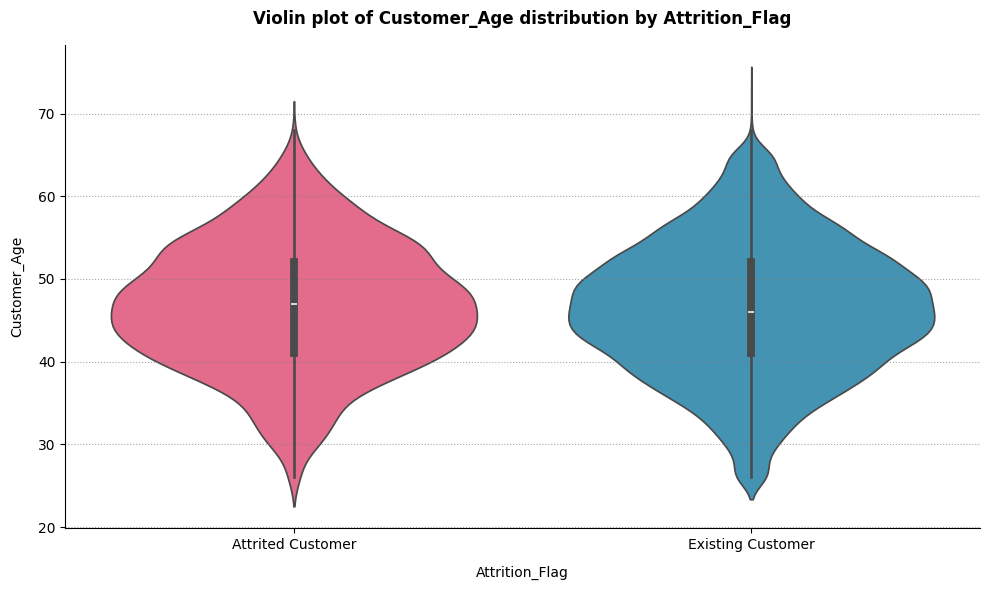

🔎 D’Agostino and Pearson Normality Test for 'Credit_Limit' across 'Attrition_Flag' groups

 Group: Existing Customer (n = 8500)
  Statistic : 2321.715
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Attrited Customer (n = 1627)
  Statistic : 521.992
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Credit_Limit' by 'Attrition_Flag'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 7468152.0
p-value     : 3.0078405911217954e-07

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'Existing Customer' has a higher median 'Credit_Limit' than Group 'Attrited Customer'.


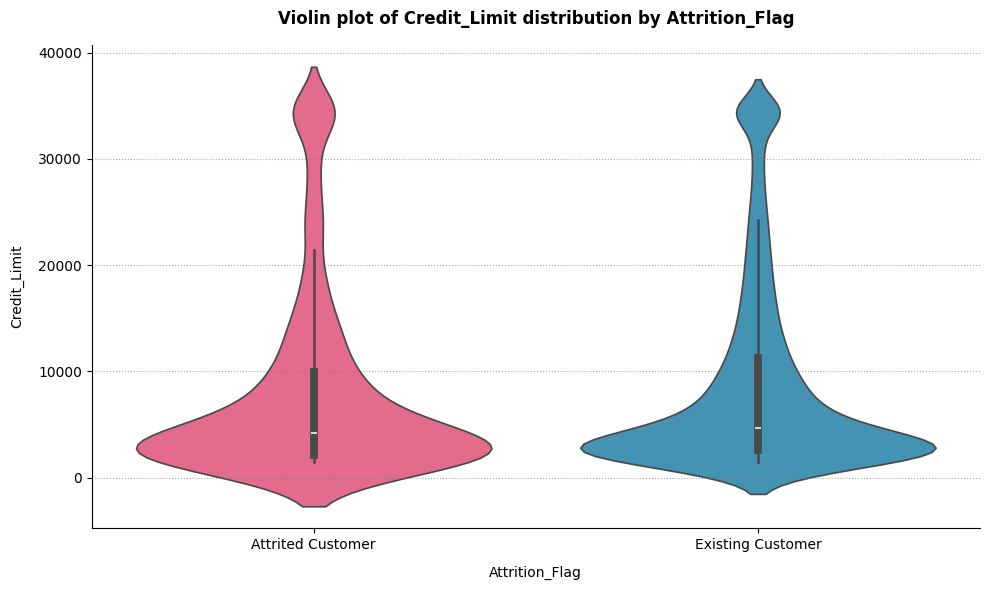

🔎 D’Agostino and Pearson Normality Test for 'Avg_Open_To_Buy' across 'Attrition_Flag' groups

 Group: Existing Customer (n = 8500)
  Statistic : 2306.899
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Attrited Customer (n = 1627)
  Statistic : 519.997
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Avg_Open_To_Buy' by 'Attrition_Flag'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 6615783.0
p-value     : 0.005652366314054008

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'Attrited Customer' has a higher median 'Avg_Open_To_Buy' than Group 'Existing Customer'.


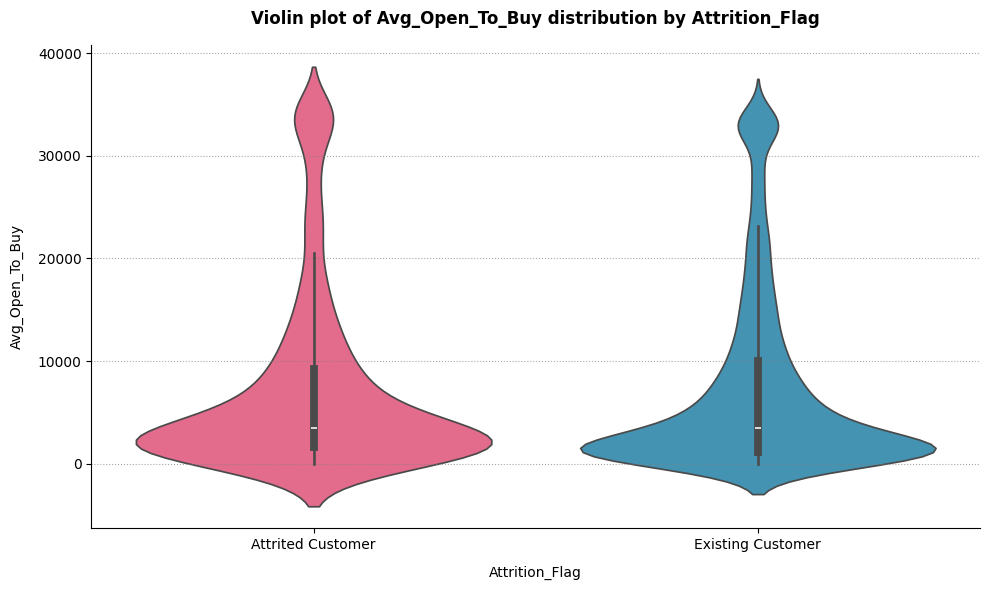

🔎 D’Agostino and Pearson Normality Test for 'Total_Trans_Amt' across 'Attrition_Flag' groups

 Group: Existing Customer (n = 8500)
  Statistic : 3197.816
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Attrited Customer (n = 1627)
  Statistic : 459.748
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Total_Trans_Amt' by 'Attrition_Flag'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 9347620.0
p-value     : 2.719009390771486e-112

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'Existing Customer' has a higher median 'Total_Trans_Amt' than Group 'Attrited Customer'.


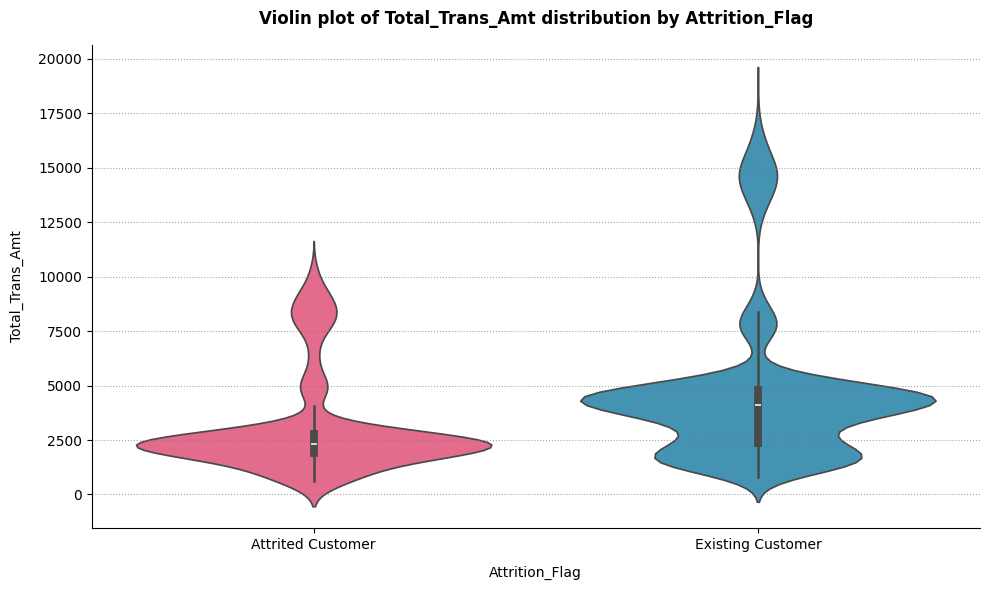

🔎 D’Agostino and Pearson Normality Test for 'Months_on_book' across 'Attrition_Flag' groups

 Group: Existing Customer (n = 8500)
  Statistic : 53.873
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Attrited Customer (n = 1627)
  Statistic : 13.579
  p-value   : 0.00113
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Months_on_book' by 'Attrition_Flag'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 6749662.5
p-value     : 0.12366716741255608

⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).


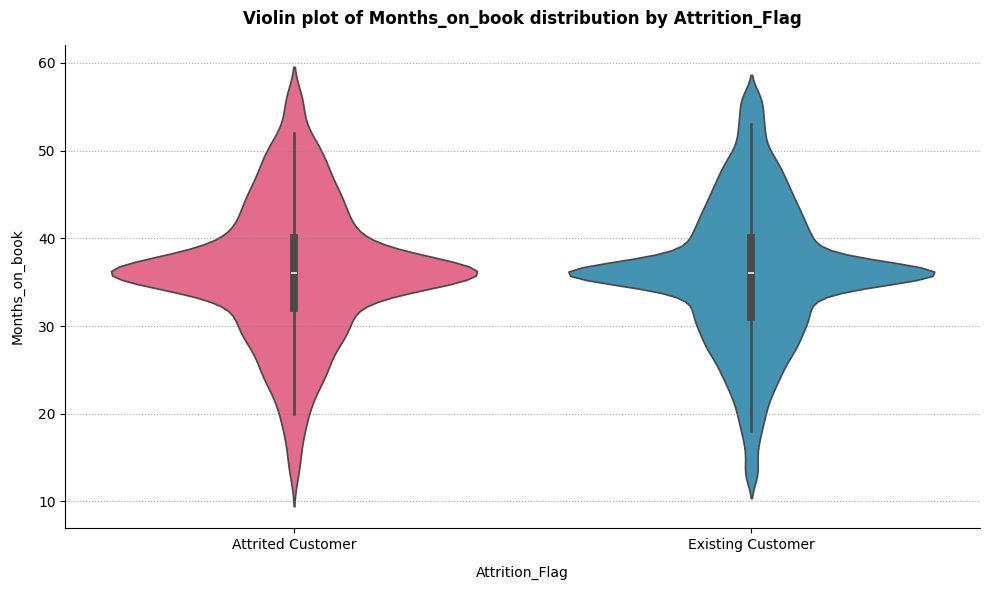

🔎 D’Agostino and Pearson Normality Test for 'Total_Trans_Ct' across 'Attrition_Flag' groups

 Group: Existing Customer (n = 8500)
  Statistic : 17.716
  p-value   : 0.00014
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Attrited Customer (n = 1627)
  Statistic : 72.474
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Total_Trans_Ct' by 'Attrition_Flag'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 11003326.0
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'Existing Customer' has a higher median 'Total_Trans_Ct' than Group 'Attrited Customer'.


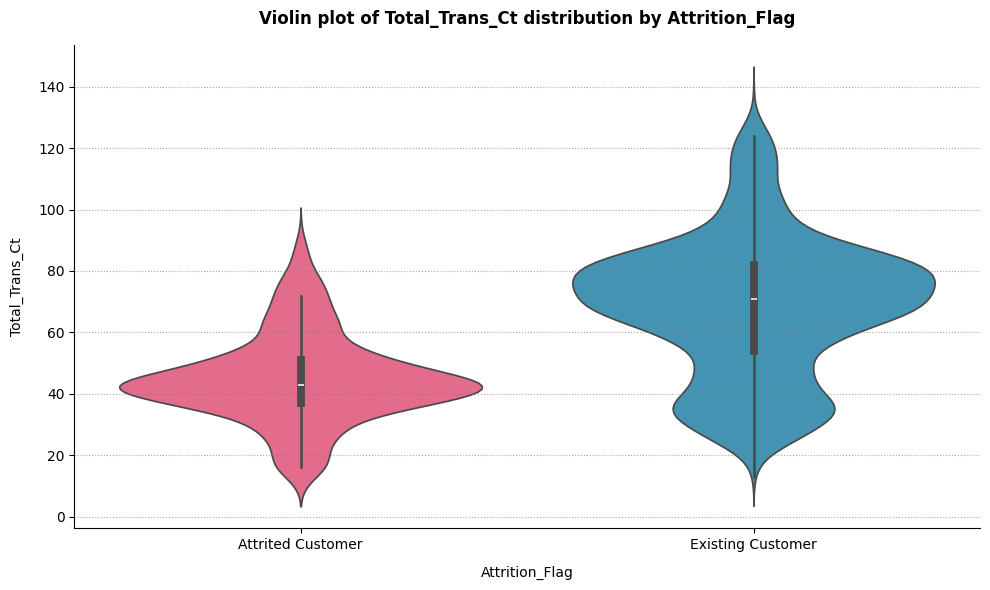

🔎 D’Agostino and Pearson Normality Test for 'Total_Ct_Chng_Q4_Q1' across 'Attrition_Flag' groups

 Group: Existing Customer (n = 8500)
  Statistic : 5499.094
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Attrited Customer (n = 1627)
  Statistic : 403.554
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Total_Ct_Chng_Q4_Q1' by 'Attrition_Flag'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 10307283.0
p-value     : 1.908240659213709e-216

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'Existing Customer' has a higher median 'Total_Ct_Chng_Q4_Q1' than Group 'Attrited Customer'.


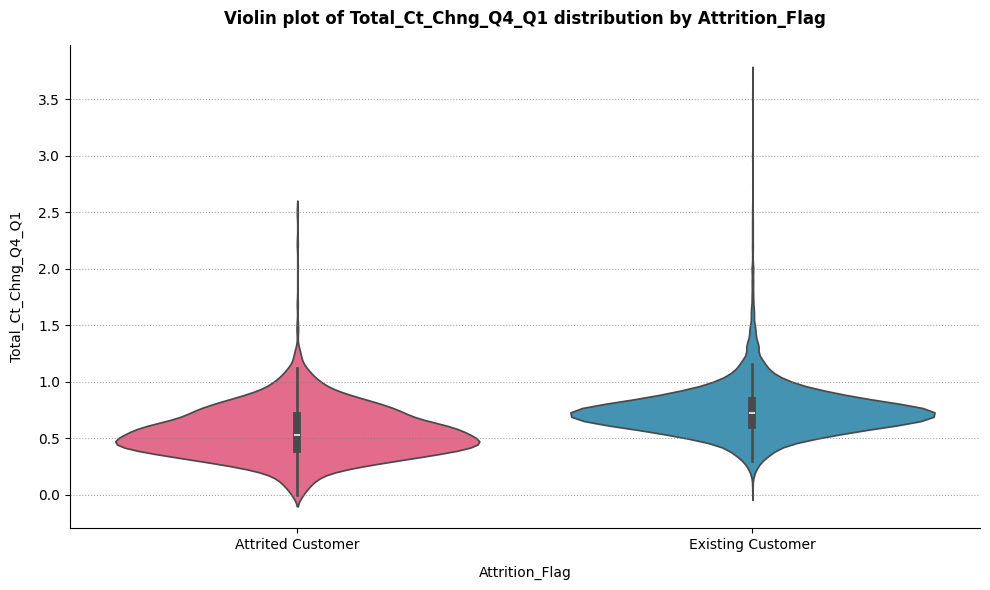

🔎 D’Agostino and Pearson Normality Test for 'Total_Amt_Chng_Q4_Q1' across 'Attrition_Flag' groups

 Group: Existing Customer (n = 8500)
  Statistic : 4334.111
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Attrited Customer (n = 1627)
  Statistic : 12.923
  p-value   : 0.00156
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Total_Amt_Chng_Q4_Q1' by 'Attrition_Flag'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 8023238.5
p-value     : 1.0644743098554122e-24

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'Existing Customer' has a higher median 'Total_Amt_Chng_Q4_Q1' than Group 'Attrited Customer'.


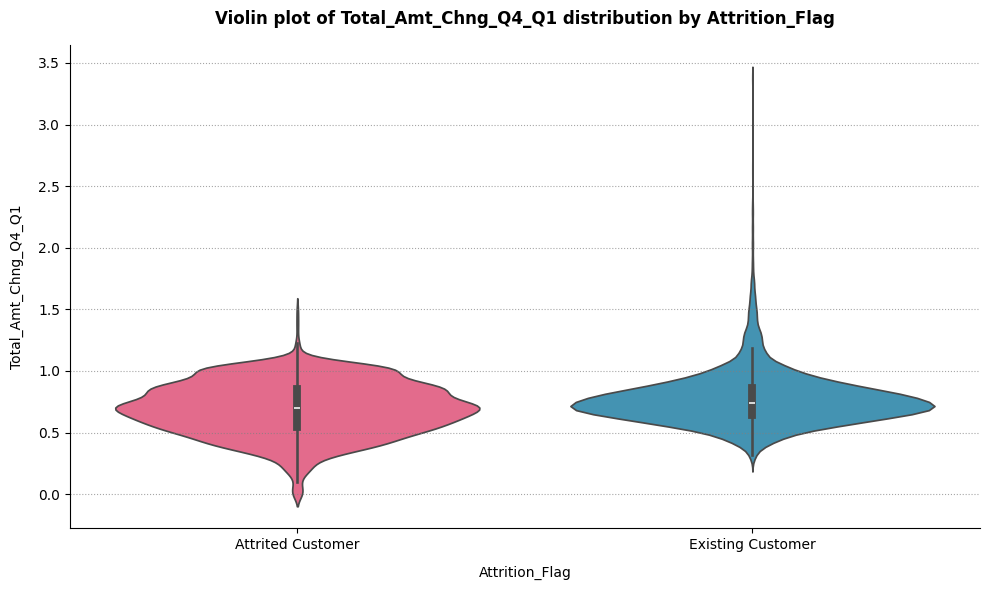

🔎 D’Agostino and Pearson Normality Test for 'Avg_Utilization_Ratio' across 'Attrition_Flag' groups

 Group: Existing Customer (n = 8500)
  Statistic : 1895.914
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Attrited Customer (n = 1627)
  Statistic : 433.202
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Avg_Utilization_Ratio' by 'Attrition_Flag'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 9509093.5
p-value     : 2.8690970172667045e-129

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'Existing Customer' has a higher median 'Avg_Utilization_Ratio' than Group 'Attrited Customer'.


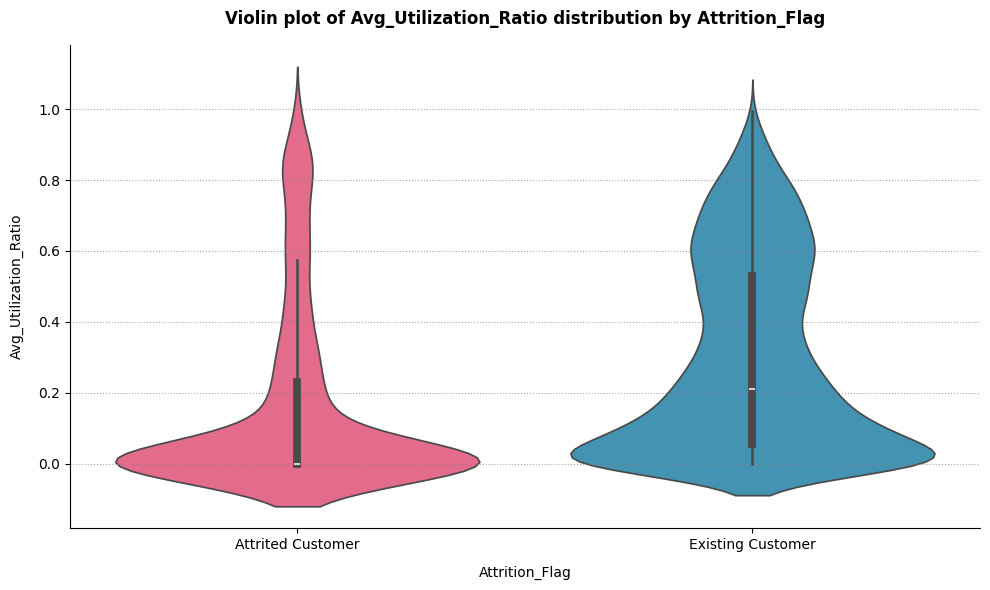

🔎 D’Agostino and Pearson Normality Test for 'Total_Revolving_Bal' across 'Attrition_Flag' groups

 Group: Existing Customer (n = 8500)
  Statistic : 982.460
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Attrited Customer (n = 1627)
  Statistic : 238.552
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Total_Revolving_Bal' by 'Attrition_Flag'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 9510716.0
p-value     : 1.9156786730316762e-129

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'Existing Customer' has a higher median 'Total_Revolving_Bal' than Group 'Attrited Customer'.


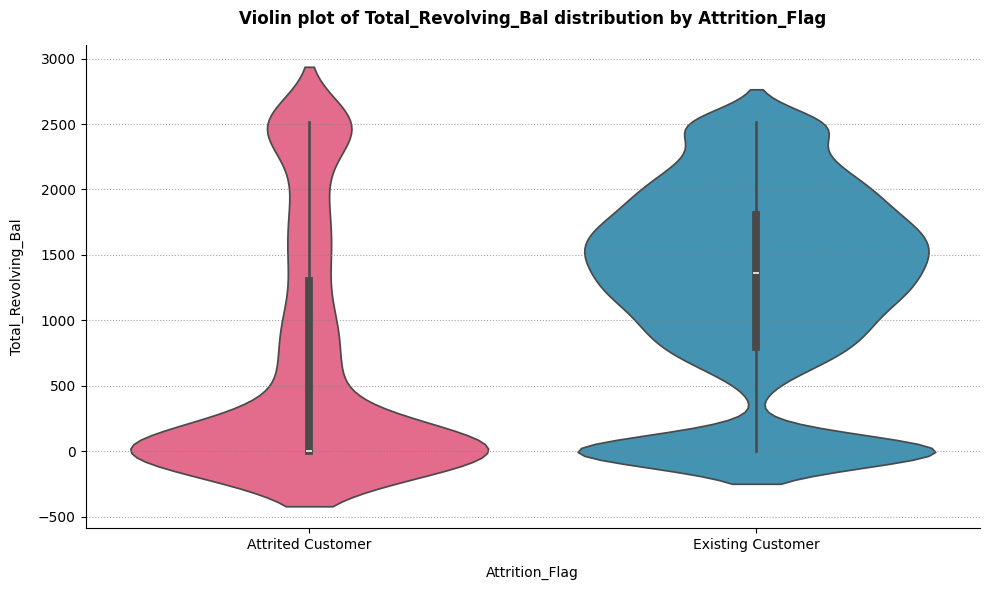

In [25]:
for feature in num_features:
    plot_numerical_distribution_by_Attrition(feature=feature)

### Insight Numerical Features by Attrition

**1. Customer_Age, Months_on_book**

> **Customer\_Age, Months\_on\_book are not a statistically significant factor** <br>
> → Age, Months_on_book do **not meaningfully differentiate churn behavior**

**2. Credit_Limit**

> **Credit\_Limit is statistically and visually associated with churn** <br>
> → Attrited customers generally hold **lower credit lines**

**3. Avg_Open_To_Buy**

> **Avg\_Open\_To\_Buy is statistically and visually associated with churn** <br>
> → Attrited customers tend to have a lower available credit balance.

**4. Total_Trans_Amt**

> **Total_Trans_Amt is statistically and visually associated with churn** <br>
> → Attrited customers tend to have a lower total transicion amount.

**5. Total_Trans_Ct** 

> **Total_Trans_Ct is statistically and visually associated with churn** <br>
> → Attrited customers tend to have a lower total transicion.

**6. Total_Ct_Chng_Q4_Q1**

> **Total_Ct_Chng_Q4_Q1 is statistically and visually associated with churn** <br>
> → Attrited customers tend to have a lower Percentage change in total transaction amount from Q1 to Q4.

**7. Total_Amt_Chng_Q4_Q1** 

> **Total_Amt_Chng_Q4_Q1 is statistically and visually associated with churn** <br>
> → Attrited customers tend to have a lower rate of change in transaction volume from Q1 to Q4.

**8. Avg_Utilization_Ratio**

> **Avg_Utilization_Ratio is statistically and visually associated with churn** <br>
> → Attrited customers tend to have a lower average utilization rate of credit limit.

**9. Total_Revolving_Bal**

> **Total_Revolving_Bal is statistically and visually associated with churn** <br>
> → Attrited customers tend to have a lower revolving credit balance (interest payable).

**Summary of Feature Relationships with Churn**

| Feature                  | Type        | Statistical Test Used | Relationship with Attrition | Summary                                                                 |
|--------------------------|-------------|------------------------|------------------------------|-------------------------------------------------------------------------|
| **Gender**               | Categorical | Chi-Square Test        | ✅ Significant               | Female customers are slightly more likely to churn                     |
| **Education_Level**      | Categorical | Chi-Square Test        | ❌ Not Significant           | Doctorate holders show higher churn, but overall pattern is weak       |
| **Marital_Status**       | Categorical | Chi-Square Test        | ❌ Not Significant           | No strong difference between marital groups                            |
| **Income_Category**      | Categorical | Chi-Square Test        | ✅ Significant               | $60K–$80K segment has lowest churn rate                                |
| **Card_Category**        | Categorical | Chi-Square Test        | ❌ Not Significant           | Card type does not impact churn significantly                          |
| **Dependent_count**      | Categorical | Chi-Square Test        | ❌ Not Significant           | Weak signal; 3 dependents slightly overrepresented among churners      |
| **Months_Inactive_12_mon** | Categorical | Chi-Square Test        | ✅ Significant               | 3–4 months inactivity strongly linked with higher churn                |
| **Contacts_Count_12_mon** | Categorical | Chi-Square Test        | ✅ Significant               | Frequent contact (especially 6/year) associated with high churn        |
| **Total_Relationship_Count** | Categorical | Chi-Square Test      | ✅ Significant               | Fewer products (1–2) linked with higher churn                          |
| **Customer_Age**         | Numerical   | Mann–Whitney U Test    | ❌ Not Significant           | Age does not differ significantly between churned and retained         |
| **Months_on_book**       | Numerical   | Mann–Whitney U Test    | ❌ Not Significant           | Tenure shows no significant churn pattern                              |
| **Credit_Limit**         | Numerical   | Mann–Whitney U Test    | ✅ Significant               | Churned customers tend to have lower credit limits                     |
| **Avg_Open_To_Buy**      | Numerical   | Mann–Whitney U Test    | ✅ Significant               | Churned customers have less available credit                           |
| **Total_Trans_Amt**      | Numerical   | Mann–Whitney U Test    | ✅ Significant               | Churned customers spend less overall                                   |
| **Total_Trans_Ct**       | Numerical   | Mann–Whitney U Test    | ✅ Significant               | Churned customers have fewer transactions                              |
| **Total_Ct_Chng_Q4_Q1**  | Numerical   | Mann–Whitney U Test    | ✅ Significant               | Churned customers show smaller increase in transaction count           |
| **Total_Amt_Chng_Q4_Q1** | Numerical   | Mann–Whitney U Test    | ✅ Significant               | Churned customers show lower growth in transaction volume              |
| **Avg_Utilization_Ratio**| Numerical   | Mann–Whitney U Test    | ✅ Significant               | Churned customers have lower utilization rates                         |
| **Total_Revolving_Bal**  | Numerical   | Mann–Whitney U Test    | ✅ Significant               | Churned customers have lower revolving balances                        |


## Multivariate Analysis
### RFM Analysis

In [26]:
# Create R-F-M
df_customer_churn["Recency"] = df_customer_churn["Months_on_book"].max() - df_customer_churn["Months_on_book"] + 1
df_customer_churn["Frequency"] = df_customer_churn["Total_Trans_Ct"]
df_customer_churn["Monetary"] = df_customer_churn["Total_Trans_Amt"]

In [27]:
df_customer_churn["R_Score"] = pd.qcut(df_customer_churn["Recency"].rank(method="first"), 5, labels=[5, 4, 3, 2, 1])
df_customer_churn["F_Score"] = pd.qcut(df_customer_churn["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
df_customer_churn["M_Score"] = pd.qcut(df_customer_churn["Monetary"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

In [28]:
df_customer_churn["RFM_Segment"] = df_customer_churn["R_Score"].astype(str) + df_customer_churn["F_Score"].astype(str) + df_customer_churn["M_Score"].astype(str)

| Segment                 | Description                                              | RFM Condition         |
| ----------------------- | -------------------------------------------------------- | --------------------- |
| **Top Customers**       | Purchase frequently, recently, and spend a lot           | `R=5, F=5, M=5`       |
| **At Risk / Lost**      | Rarely purchase, haven’t returned, and spend very little | `R=1–2, F=1–2, M=1–2` |
| **New but not engaged** | Recently joined but low purchase activity and spending   | `R=5, F=1, M=1`       |
| **Potential Loyalists** | Moderate recency, high frequency and high spending       | `R=3–4, F=4–5, M=4–5` |
| **Other**               | Customers not fitting the above profiles                 | Anything else         |

In [29]:
def classify_rfm(row):
    r, f, m = int(row["R_Score"]), int(row["F_Score"]), int(row["M_Score"])

    if r == 5 and f == 5 and m == 5:
        return "Top Customers"
    elif r in [1, 2] and f in [1, 2] and m in [1, 2]:
        return "At Risk or Lost"
    elif r == 5 and f == 1 and m == 1:
        return "New but not engaged"
    elif r in [3, 4] and f in [4, 5] and m in [4, 5]:
        return "Potential Loyalists"
    else:
        return "Other"

df_customer_churn["RFM_Segment"] = df_customer_churn.apply(classify_rfm, axis=1)

In [30]:
df_customer_churn.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender Dependent_count  \
0  768805383  Existing Customer            45      M               3   
1  818770008  Existing Customer            49      F               5   
2  713982108  Existing Customer            51      M               3   
3  769911858  Existing Customer            40      F               4   
4  709106358  Existing Customer            40      M               3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book Total_Relationship_Count Months_Inactive_12_mon  \
0              39                        5                      1   
1              44                        6                      1   
2              36                        4                      1   
3              34                        3                      4   
4              21                        5                      1   

  Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                     3       12691.0                  777          11914.0   
1                     2        8256.0                  864           7392.0   
2                     0        3418.0                    0           3418.0   
3                     1        3313.0                 2517            796.0   
4                     0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  Recency  Frequency  Monetary R_Score F_Score  \
0                  0.061       18         42      1144       4       2   
1                  0.105       13         33      1291       5       1   
2                  0.000       21         20      1887       4       1   
3                  0.760       23         20      1171       2       1   
4                  0.000       36         28       816       1       1   

  M_Score          RFM_Segment  
0       1                Other  
1       1  New but not engaged  
2       1                Other  
3       1      At Risk or Lost  
4       1      At Risk or Lost

In [31]:
summary_rfm = (
    df_customer_churn.groupby("RFM_Segment").agg({
        "Recency": ["mean", "min", "max"],
        "Frequency": ["mean", "min", "max"],
        "Monetary": ["mean", "min", "max"],
        "CLIENTNUM": "count"
    })
    .sort_values(("Monetary", "mean"), ascending=False)
    .style
    .set_caption("RFM Summary by Segment")
    .format(precision=0)
    .set_table_styles([
        {"selector": "th", "props": [("text-align", "center")]},
        {"selector": "caption", "props": [("caption-side", "top"), ("font-size", "16px"), ("font-weight", "bold")]}
    ])
    .set_properties(**{
        "text-align": "center",
        "font-size": "12px"
    })
    .background_gradient(subset=[("Recency", "mean"), ("Frequency", "mean"), ("Monetary", "mean")], cmap="Blues")
)
summary_rfm

In [32]:
df_customer_churn = df_customer_churn.astype({
    "R_Score": "int8",
    "F_Score": "int8",
    "M_Score": "int8"
})

(np.float64(0.0), np.float64(100.0), np.float64(0.0), np.float64(100.0))

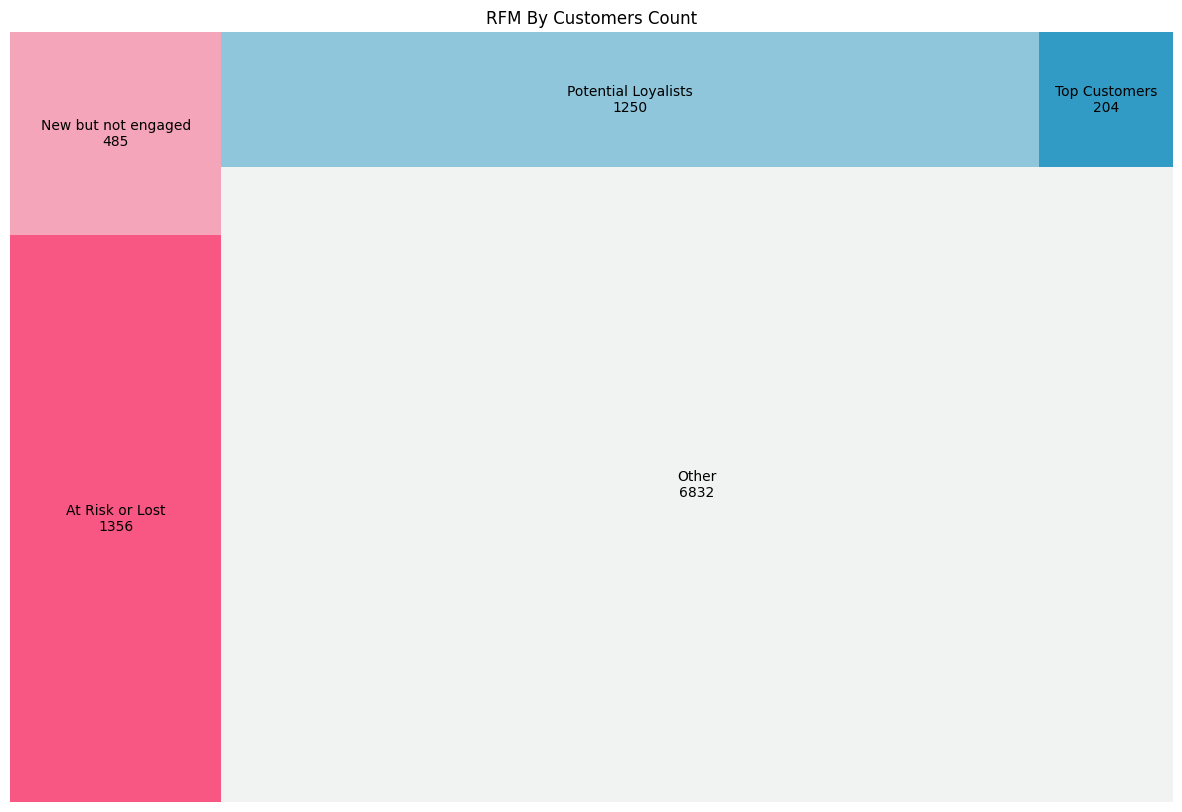

In [33]:
import squarify

rfm_summarised = df_customer_churn.groupby (by = "RFM_Segment", as_index = False)\
                        .agg (
                            customersCount = ("CLIENTNUM", "nunique"),
                            total_R = ("R_Score", "sum"),
                            total_F = ("F_Score", "sum"),
                            total_M = ("M_Score", "sum")
                        )

plt.figure(figsize=(15, 10))
squarify.plot(
    rfm_summarised["customersCount"].to_list(),
    label = rfm_summarised["RFM_Segment"] + "\n" + rfm_summarised["customersCount"].astype(str),
    color = color(n_colors=5)
)
plt.title ("RFM By Customers Count")
plt.axis("off")

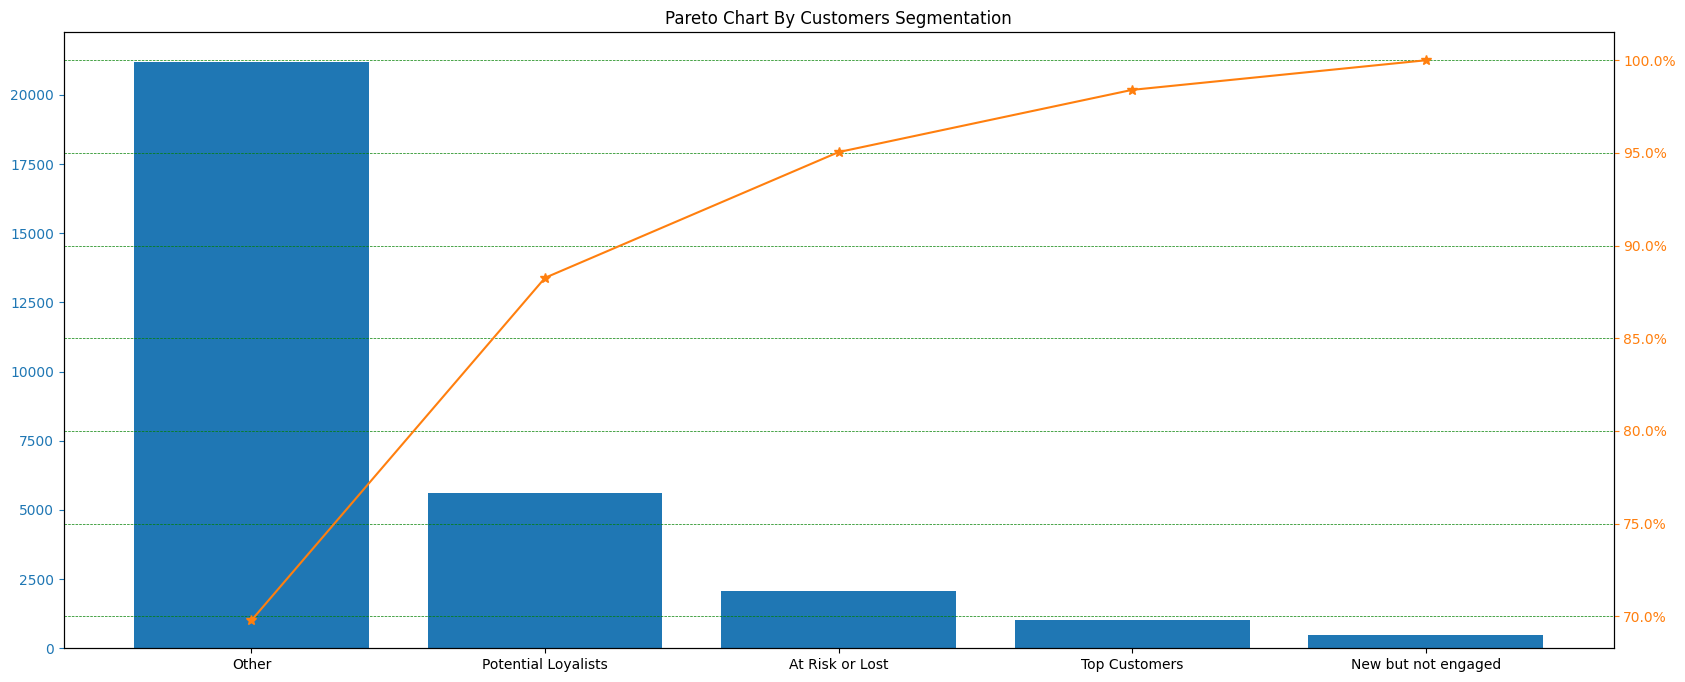

In [34]:
from matplotlib.ticker import PercentFormatter
rfm_summarised = rfm_summarised.sort_values(by="total_M",ascending=False)
rfm_summarised["cumpercentage"] = rfm_summarised["total_M"].cumsum()/rfm_summarised["total_M"].sum()*100
fig, ax = plt.subplots(figsize = (20, 8))
ax.bar(rfm_summarised["RFM_Segment"], rfm_summarised["total_M"], color="C0")
ax2 = ax.twinx()
ax2.plot(rfm_summarised["RFM_Segment"], rfm_summarised["cumpercentage"], color="C1", marker="*", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.grid(color = "green", linestyle = "--", linewidth = 0.5)
plt.title ("Pareto Chart By Customers Segmentation")
plt.show()

**Insight**

| Segment                 | % of Customers | Key Behavior Insights                            | 
| ----------------------- | -------------- | ------------------------------------------------ |
| **Top Customers**       | **2%**         | Most recent, frequent, and highest spenders      |
| **Potential Loyalists** | **12%**        | Active with good frequency/spending              |
| **Other**               | **68%**        | Average recency, frequency, and spend            |
| **At Risk / Lost**      | **13%**        | Previously active, now disengaged (long recency) |
| **New, Not Engaged**    | **5%**         | Just joined, low activity & spend                |

**Pareto Insight**

* **Top 2 groups ("Top Customers" + "Potential Loyalists") = only 14% of users**
* But contribute **nearly 80% of revenue**
* → Focus efforts on **high-value groups**

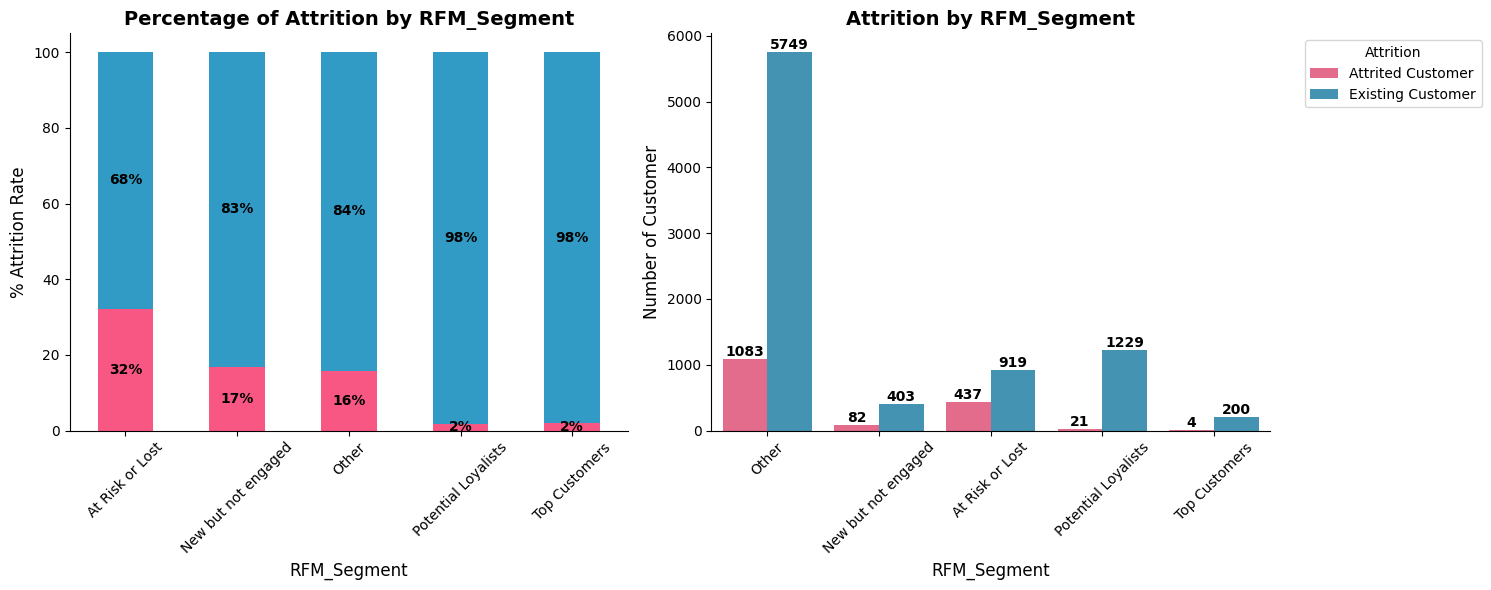


🔍 Chi-Square Test of Independence: 'RFM_Segment' vs. 'Attrition_Flag'
Chi-squared statistic: 485.067
Degrees of freedom: 4
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'RFM_Segment' and 'Attrition_Flag'.

Standardized Residuals:
Attrition_Flag       Attrited Customer  Existing Customer
RFM_Segment                                              
At Risk or Lost                  14.85              -6.50
New but not engaged               0.46              -0.20
Other                            -0.44               0.19
Potential Loyalists             -12.69               5.55
Top Customers                    -5.03               2.20


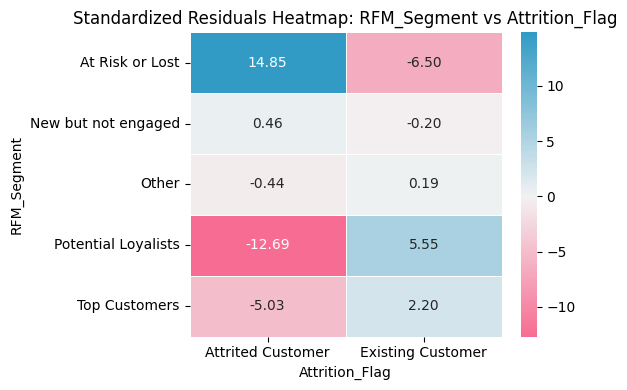

In [35]:
bivariate_percent_plot(cat="RFM_Segment", df= df_customer_churn, rot=45)

* **RFM segmentation is strongly associated with churn**
* **“At Risk or Lost”** group needs **recovery strategies**
* **“Top” and “Potential Loyalists”** show strong retention potential
* RFM segments are useful **predictors for churn modeling**

### Business Insight Ideas

#### Analyzing the Relationship Between Income and Trading Behavior

In [36]:
df_customer_churn_bussiness = df_customer_churn.copy()

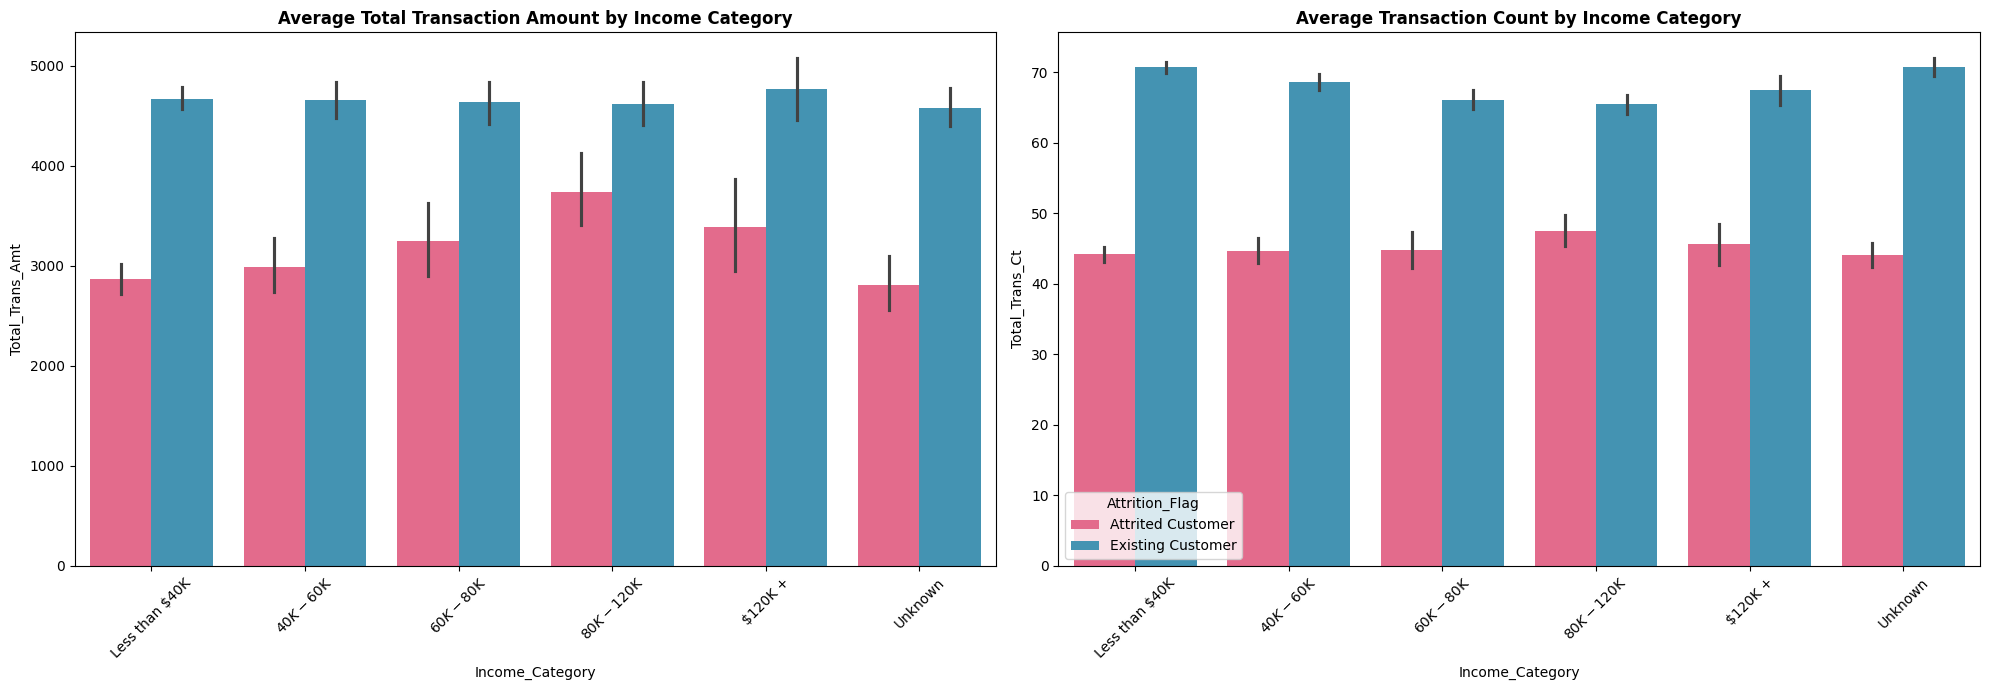

In [37]:
income_order = ["Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K", "$120K +", "Unknown"]
plt.figure(figsize=(20, 7))

# --- Barplot 1 ---
plt.subplot(1, 2, 1)
ax1 = sns.barplot(data=df_customer_churn_bussiness, x="Income_Category", y="Total_Trans_Amt",
                  palette=color(n_colors=2), order=income_order, hue="Attrition_Flag")
plt.title("Average Total Transaction Amount by Income Category", weight = "bold")
plt.xticks(rotation=45)
plt.legend().remove()

# --- Barplot 2 ---
plt.subplot(1, 2, 2)
ax2 = sns.barplot(data=df_customer_churn_bussiness, x="Income_Category", y="Total_Trans_Ct", 
                  palette=color(n_colors=2), order=income_order, hue="Attrition_Flag")
plt.title("Average Transaction Count by Income Category", weight = "bold")
plt.xticks(rotation=45)

# for container in ax2.containers:
#     ax2.bar_label(container, fmt='%.0f', label_type="edge", fontsize=10)

plt.tight_layout()
plt.show()

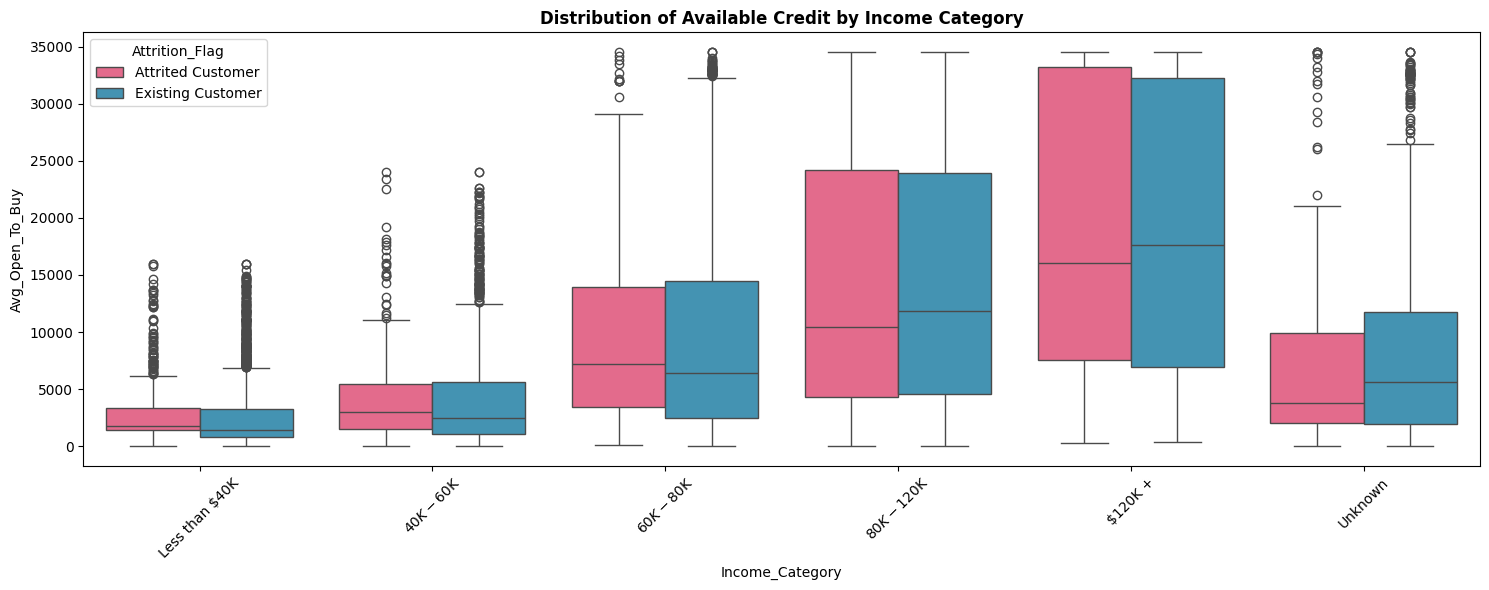

In [38]:
# Avg_Open_To_Buy/Credit Limit  theo Income_Category
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_customer_churn_bussiness, x="Income_Category", y="Avg_Open_To_Buy",
                palette=color(n_colors=2), order=income_order, hue="Attrition_Flag")
plt.title("Distribution of Available Credit by Income Category", weight = "bold")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

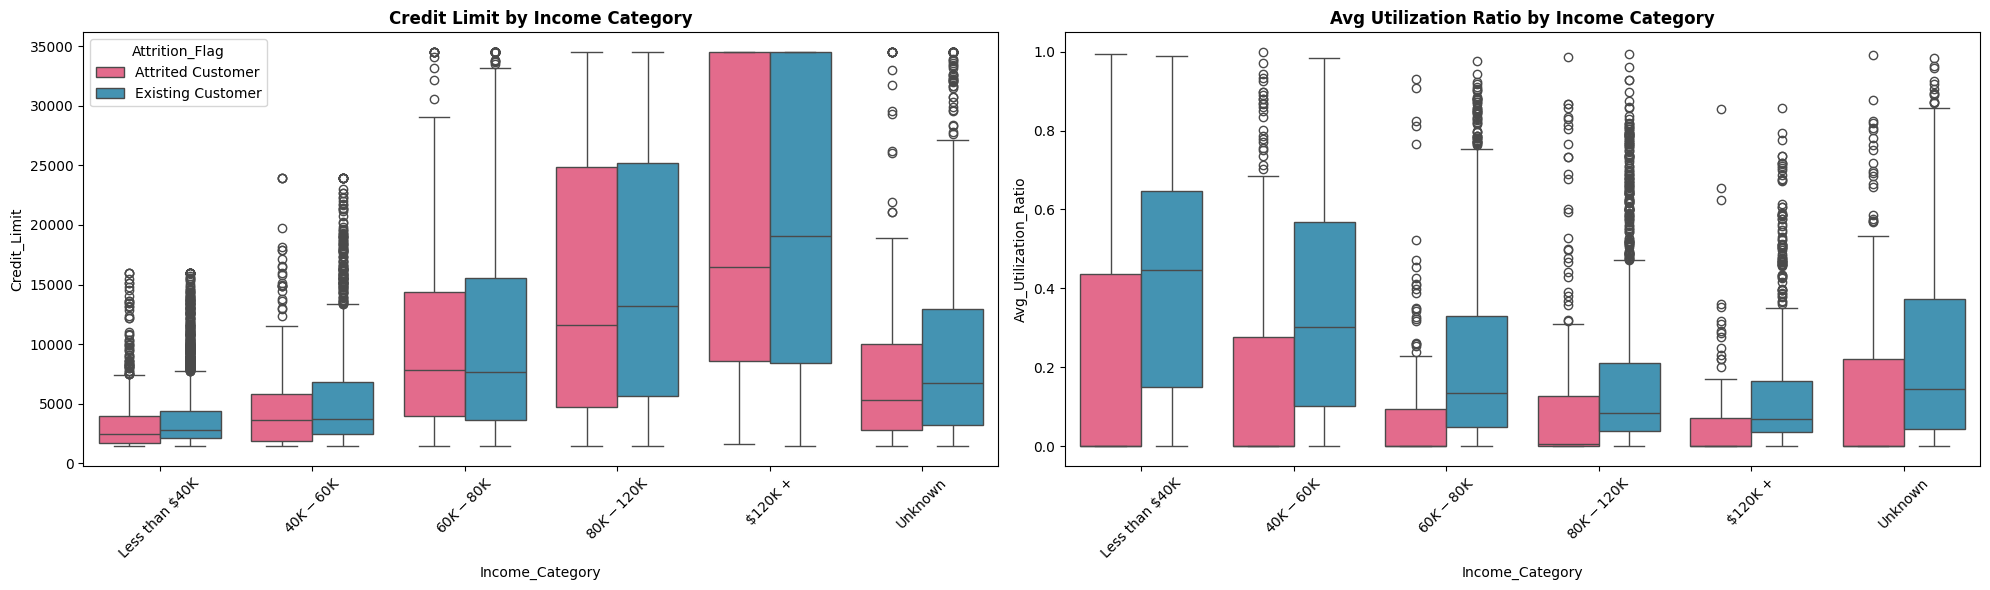

In [39]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df_customer_churn_bussiness, x="Income_Category", y="Credit_Limit", order=income_order, palette=color(n_colors=2), hue="Attrition_Flag")
plt.title("Credit Limit by Income Category", weight = "bold")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df_customer_churn_bussiness, x="Income_Category", y="Avg_Utilization_Ratio", order=income_order,  palette=color(n_colors=2), hue="Attrition_Flag")
plt.title("Avg Utilization Ratio by Income Category", weight = "bold")
plt.xticks(rotation=45)
plt.legend().remove()

plt.tight_layout()
plt.show()

**1. Average Transactions by Income & Customer Status**

**Insight:**

* **Existing Customers** consistently show higher average transaction amounts and counts across all income groups.
* In the `$80K–$120K` income group, **Attrited Customers** exhibit the highest transaction levels among their peers — indicating this may be a **high-value segment that was lost**.

**2. Distribution of `Avg_Open_To_Buy` by Income & Churn Status**

**Insight:**

* **Existing Customers** tend to have significantly **more available credit left** (`Avg_Open_To_Buy`) across all income tiers.
* Most **Attrited Customers have low remaining credit**, which may indicate that their cards were either maxed out or rarely used.


**3. Credit Limit & Utilization by Income & Churn Status**

**Insight:**

* **Credit Limit increases clearly with income**, as expected.
* However, **Attrited Customers consistently show higher Utilization Ratios** — particularly in income groups below `$60K`, where usage often approaches full limit.
* This pattern suggests higher financial pressure among churned customers.

#### Transaction Analysis by Age

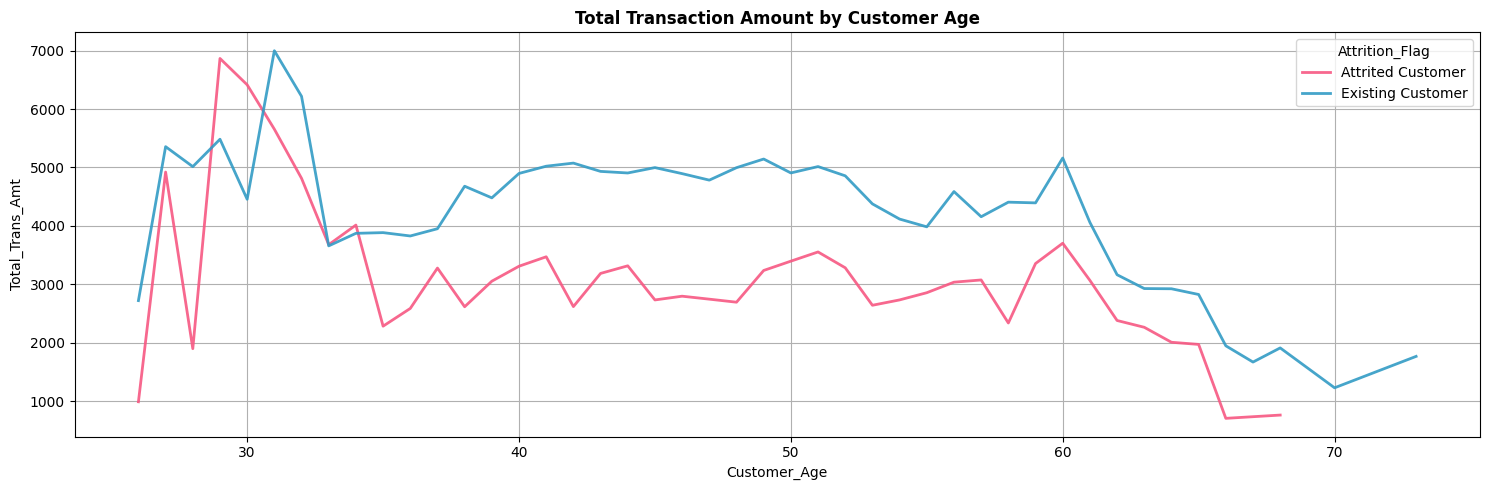

In [40]:
# Total Transaction Amount by Customer Age
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_customer_churn_bussiness, x="Customer_Age", y="Total_Trans_Amt",
             hue="Attrition_Flag", palette=color(n_colors=2), ci=None, linewidth=2, alpha=0.9)
plt.title("Total Transaction Amount by Customer Age", weight = "bold")
plt.grid(True)
plt.tight_layout()
plt.show()

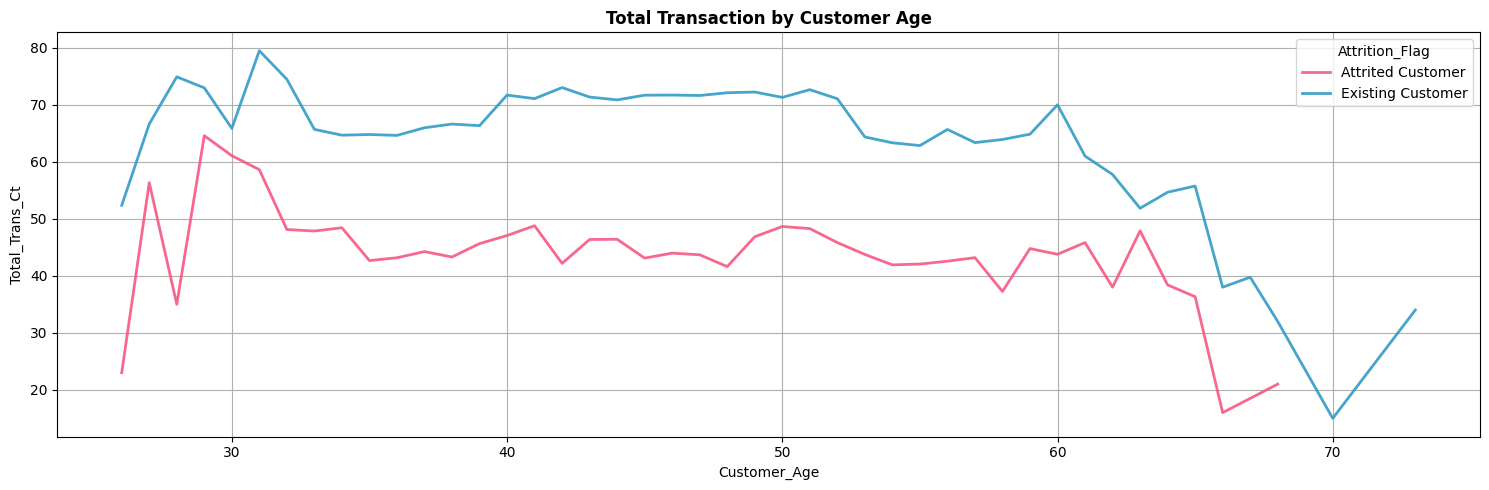

In [41]:
# Total Transaction by Customer Age
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_customer_churn_bussiness, x="Customer_Age", y="Total_Trans_Ct",
             hue="Attrition_Flag", palette=color(n_colors=2), ci=None, linewidth=2, alpha=0.9)
plt.title("Total Transaction by Customer Age", weight = "bold")
plt.grid(True)
plt.tight_layout()
plt.show()

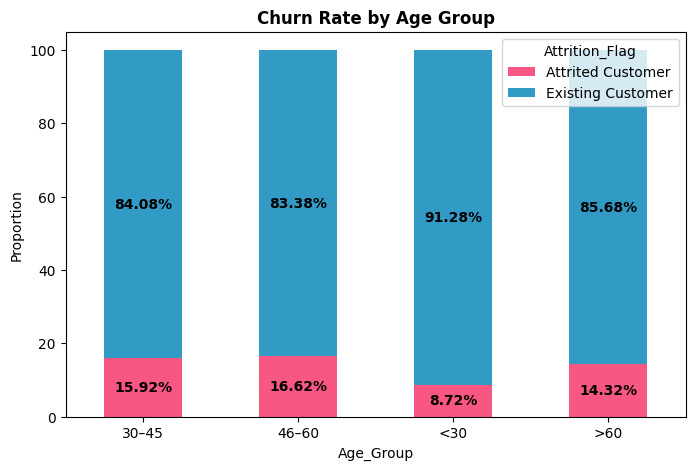

In [42]:
def categorize_age(age):
    if age < 30:
        return "<30"
    elif 30 <= age <= 45:
        return "30–45"
    elif 46 <= age <= 60:
        return "46–60"
    else:
        return ">60"

cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

df_customer_churn_bussiness["Age_Group"] = df_customer_churn_bussiness["Customer_Age"].apply(categorize_age)

age_churn = df_customer_churn_bussiness.groupby("Age_Group")["Attrition_Flag"].value_counts(normalize=True).unstack() * 100

ax = age_churn.plot(kind="bar", stacked=True, figsize=(8, 5), cmap=cmap)
for container in ax.containers:
    ax.bar_label(container, fmt='%1.2f%%', label_type="center", weight="bold", fontsize=10)
plt.title("Churn Rate by Age Group", weight = "bold")
plt.ylabel("Proportion")
plt.legend(title="Attrition_Flag")
plt.xticks(rotation=0)
plt.show()

**Customer Behavior by Age – Business Insights**

**1. Total Transaction Amount and Count by Age**

**Insights:**

* **Existing Customers** consistently perform more transactions (both in count and value) than **Attrited Customers**.
* Transaction activity **peaks around age 30–40** and steadily declines after age 60.
* For Attrited Customers, spending behavior is **lower overall and declines faster with age**.

**2. Churn Rate by Age Group**

**Insights:**

| Age Group | Attrited (%) | Existing (%) |
| --------- | ------------ | ------------ |
| `<30`     | **8.72%**    | 91.28%       |
| `30–45`   | 15.92%       | 84.08%       |
| `46–60`   | **16.62%**   | 83.38%       |
| `>60`     | 14.32%       | 85.68%       |

* **Customers under 30** have the **lowest churn rate**, though they transact less.
* The **46–60 segment has the highest churn rate**, suggesting unmet needs or declining satisfaction.

#### Consumer Behavior by Gender

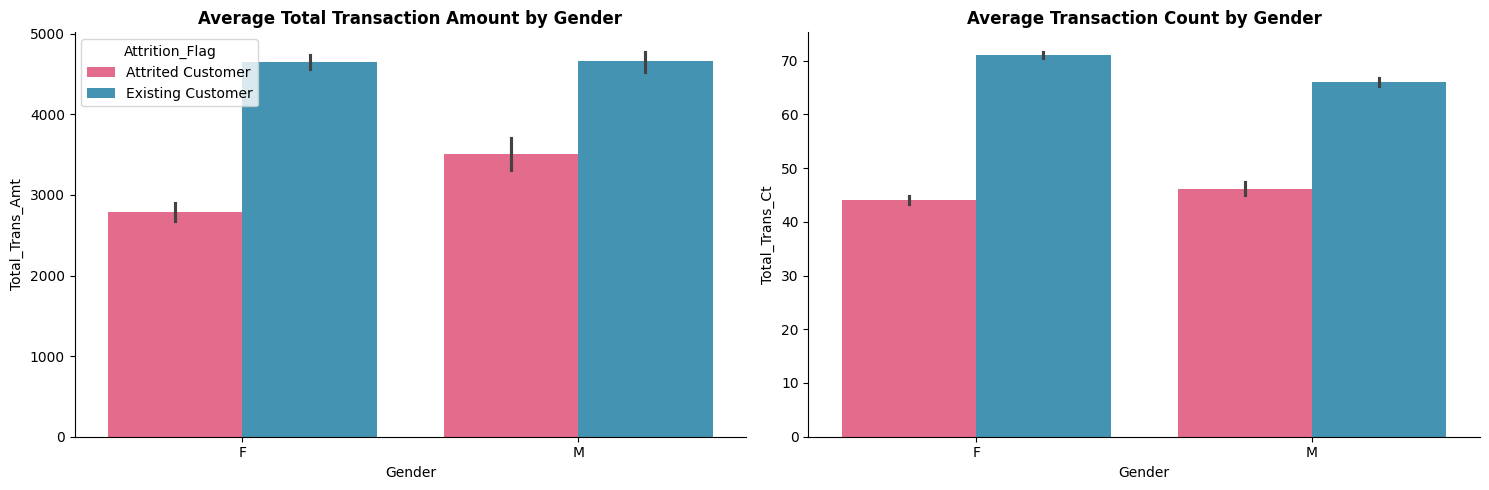

In [43]:
# Total_Trans_Amt and Total_Trans_Ct by Gender
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df_customer_churn_bussiness, x="Gender", y="Total_Trans_Amt",
            estimator="mean", palette=color(n_colors=2),  hue="Attrition_Flag")
sns.despine(top=True, right=True, left=False, bottom=False)
plt.title("Average Total Transaction Amount by Gender", weight = "bold")

plt.subplot(1, 2, 2)
sns.barplot(data=df_customer_churn_bussiness, x="Gender", y="Total_Trans_Ct",
            estimator="mean", palette=color(n_colors=2),  hue="Attrition_Flag")
sns.despine(top=True, right=True, left=False, bottom=False)
plt.title("Average Transaction Count by Gender", weight = "bold")
plt.legend().remove()

plt.tight_layout()
plt.show()


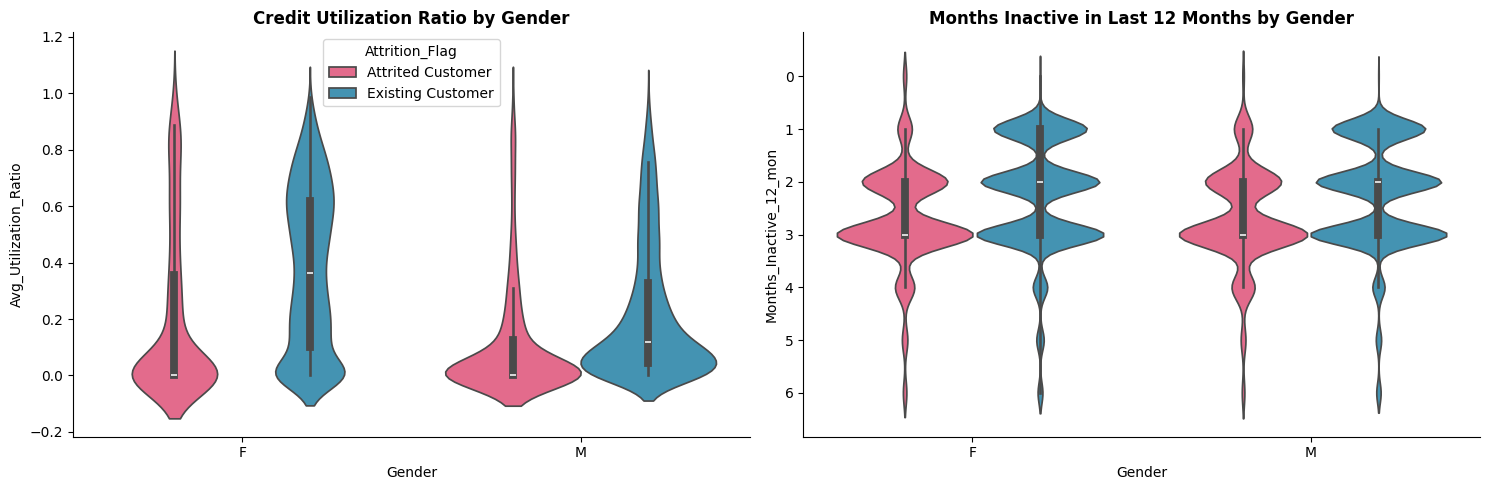

In [44]:
# Avg_Utilization_Ratio and Months_Inactive_12_mon between Male và Female
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.violinplot(data=df_customer_churn, x="Gender", y="Avg_Utilization_Ratio",
               palette=color(n_colors=2), hue="Attrition_Flag")
sns.despine(top=True, right=True, left=False, bottom=False)
plt.title("Credit Utilization Ratio by Gender", weight = "bold")

plt.subplot(1, 2, 2)
sns.violinplot(data=df_customer_churn, x="Gender", y="Months_Inactive_12_mon",
               palette=color(n_colors=2), hue="Attrition_Flag")
sns.despine(top=True, right=True, left=False, bottom=False)
plt.title("Months Inactive in Last 12 Months by Gender", weight = "bold")
plt.legend().remove()

plt.tight_layout()
plt.show()

**1. Average Transactions by Gender (`Total_Trans_Amt`, `Total_Trans_Ct`)**

**Insights:**

* **Existing Customers** have significantly higher transaction amounts and counts than **Attrited Customers**, for both males and females.
* Among **Attrited Customers**, **males have higher average transaction amounts** than females.
* Transaction count is fairly similar between genders in the attrited group, but **female Existing Customers perform more transactions** than males.

**2. Distribution of `Avg_Utilization_Ratio` and `Months_Inactive_12_mon` by Gender**

**Insights:**

* For `Avg_Utilization_Ratio`:

  * Most customers have low utilization ratios, concentrated near zero.
  * **Attrited Customers** show a wider spread toward high utilization, especially among females.
  * No major difference is observed between genders in the **Existing Customer** group.

* For `Months_Inactive_12_mon`:

  * Both genders show similar distributions.
  * Most customers had 2–3 months of inactivity in the past year.
  * **Attrited Customers** exhibit more variation, but no clear gender-specific trend is observed.

#### Credit Utilization Efficiency

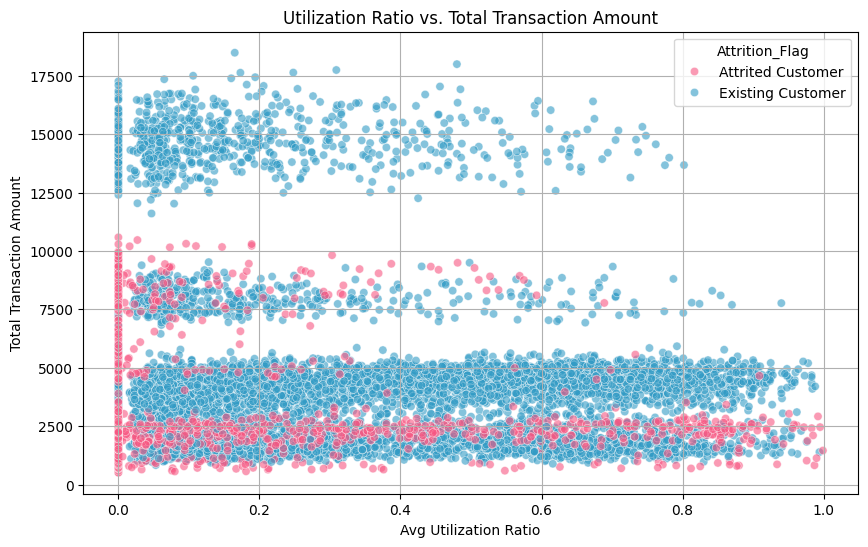

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_customer_churn_bussiness,
    x="Avg_Utilization_Ratio",
    y="Total_Trans_Amt",
    hue="Attrition_Flag",
    alpha=0.6,
    palette=color(n_colors=2)
)
plt.title("Utilization Ratio vs. Total Transaction Amount")
plt.xlabel("Avg Utilization Ratio")
plt.ylabel("Total Transaction Amount")
plt.grid(True)
plt.show()

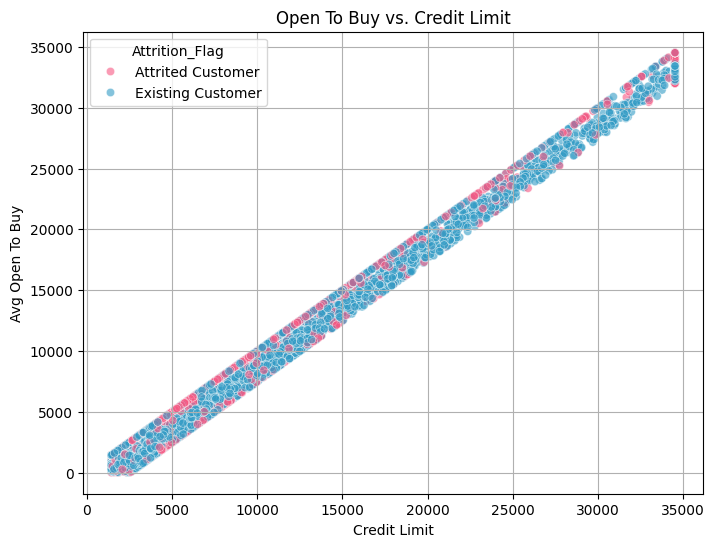

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_customer_churn,
    x="Credit_Limit",
    y="Avg_Open_To_Buy",
    hue="Attrition_Flag",
    alpha=0.6,
    palette=color(n_colors=2)
)
plt.title("Open To Buy vs. Credit Limit")
plt.xlabel("Credit Limit")
plt.ylabel("Avg Open To Buy")
plt.grid(True)
plt.show()

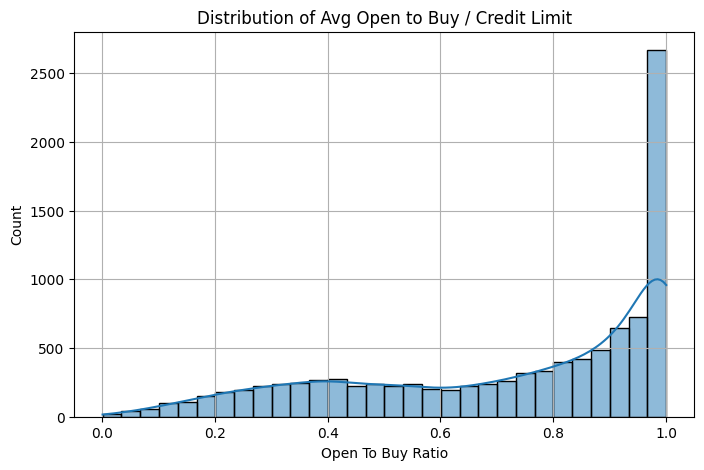

In [47]:
df_customer_churn_bussiness["OpenToLimitRatio"] = df_customer_churn_bussiness["Avg_Open_To_Buy"] / df_customer_churn_bussiness["Credit_Limit"]
plt.figure(figsize=(8, 5))
sns.histplot(df_customer_churn_bussiness["OpenToLimitRatio"], bins=30, kde=True)
plt.title("Distribution of Avg Open to Buy / Credit Limit")
plt.xlabel("Open To Buy Ratio")
plt.grid(True)
plt.show()

**1. Chart: `Avg_Utilization_Ratio` vs. `Total_Trans_Amt`**

**Insights:**

* The data forms several horizontal "bands" — indicating common spending levels (e.g., 2,500 / 5,000 / 10,000...).
* Most data points are concentrated at low `Avg_Utilization_Ratio` values (below 0.4), even when `Total_Trans_Amt` is high.
* There is no clear linear relationship between credit utilization and spending amount.
* **Existing Customers** show a wider spread along both axes.

**2. Chart: `Avg_Open_To_Buy` vs. `Credit_Limit`**

**Insights:**

* The points lie almost perfectly on a diagonal — indicating a near-linear relationship between `Credit_Limit` and `Avg_Open_To_Buy`.
* This is expected because:
  `Avg_Open_To_Buy ≈ Credit_Limit - Avg_Revolving_Bal`.
* The distribution appears similar across both **Attrited** and **Existing** customer groups.

**3. Chart: Distribution of `Avg_Open_To_Buy / Credit_Limit`**

**Insights:**

* The distribution is heavily right-skewed — the majority of customers have an **open-to-buy ratio > 0.8**, indicating a large portion of their credit limit remains unused.
* The peak occurs close to 1.0, confirming that most customers are using very little of their available credit.
* A smaller subset has ratios below 0.4, meaning they are utilizing most of their limit.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preprocessing</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preprocessing
    </h1>
</div>


## Feature Engineering

In [48]:
df_customer_churn["Utilization_Ratio_Per_Trans"] = df_customer_churn["Avg_Utilization_Ratio"] / (df_customer_churn["Total_Trans_Ct"] + 1)
df_customer_churn["Credit_Usage_Efficiency"] = df_customer_churn["Total_Trans_Amt"] / (df_customer_churn["Credit_Limit"] + 1)
df_customer_churn["Trans_Change_Rate"] = df_customer_churn["Total_Ct_Chng_Q4_Q1"] / (df_customer_churn["Total_Trans_Ct"] + 1)
df_customer_churn["Age_To_Months_Ratio"] = df_customer_churn["Customer_Age"] / (df_customer_churn["Months_on_book"] + 1)

`Utilization_Ratio_Per_Trans`

* Measures the **average utilization ratio per transaction**.
* Helps distinguish customers who **make fewer but larger transactions** (potentially high risk) from those who **spend smaller amounts more frequently**.

`Credit_Usage_Efficiency`

* Indicates how efficiently the customer **converts their credit limit into actual transaction amount**.
* High values may reflect good utilization — or possibly overextension.

`Open_To_Buy_Ratio`

* Represents the **remaining credit capacity**.
* High ratio → customer still has large available credit.
* Low ratio → customer is utilizing most of their limit, potentially risky.

`Trans_Change_Rate`

* Measures the **rate of transaction count change between Q4 and Q1** relative to total transactions.
* A high value suggests **behavioral shifts**, which could be early signs of churn or instability.

`Age_To_Months_Ratio`

* Estimates the **relative age at account creation**.
* Younger customers with long tenure may indicate **higher loyalty**.

In [49]:
list_feature_drop = ["Recency", "Frequency", "Monetary", "R_Score", "F_Score", "M_Score", "CLIENTNUM"]
df_customer_churn.drop(columns=list_feature_drop, axis=1, inplace=True)

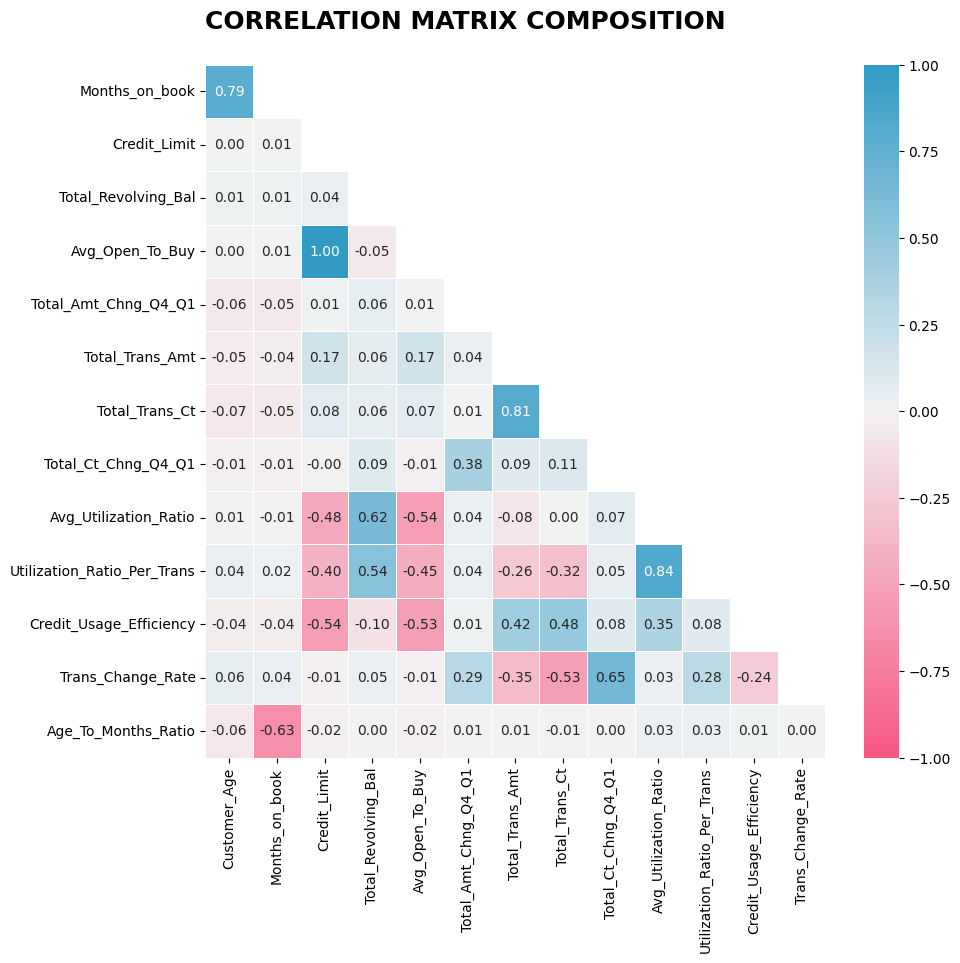

In [50]:
corr_matrix = df_customer_churn.corr(numeric_only=True)
# one_like can build a matrix of boolean(True, False) with the same shape as our data
ones_corr = np.ones_like(corr_matrix, dtype=bool)
mask = np.triu(ones_corr)
adjusted_mask = mask[1:, :-1]
adjusted_cereal_corr = corr_matrix.iloc[1:, :-1]

fig, ax = plt.subplots(figsize = (10, 9))
# That method uses HUSL colors, so you need hue, saturation, and lightness. 
# I used hsluv.org to select the colors of this chart.
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(data=adjusted_cereal_corr, mask=adjusted_mask,
            annot=True, fmt=".2f", cmap=cmap,
            vmin=-1, vmax=1, linecolor="white", linewidths=0.5)

title = "CORRELATION MATRIX COMPOSITION\n"
ax.set_title(title, loc="left", fontsize=18, weight="bold");

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = df_customer_churn[num_features].columns
vif_data["VIF"] = [variance_inflation_factor(df_customer_churn[num_features].values, i)
                   for i in range(len(df_customer_churn[num_features].columns))]

In [52]:
vif_data

feature        VIF
0           Customer_Age  70.631111
1           Credit_Limit        inf
2        Avg_Open_To_Buy        inf
3        Total_Trans_Amt   7.675934
4         Months_on_book  56.296010
5         Total_Trans_Ct  21.627793
6    Total_Ct_Chng_Q4_Q1  11.656472
7   Total_Amt_Chng_Q4_Q1  13.224664
8  Avg_Utilization_Ratio   5.995190
9    Total_Revolving_Bal        inf

**VIF Analysis – Detecting Multicollinearity in Numerical Features**

**What is VIF?**

* **VIF (Variance Inflation Factor)** measures how much a feature is **linearly explained by other features**.
* **Higher VIF** → stronger multicollinearity → coefficient becomes unstable in linear models.

| VIF Value   | Interpretation                       |
| ----------- | ------------------------------------ |
| **1–5**     | Low multicollinearity (acceptable)   |
| **5–10**    | Moderate correlation (check closely) |
| **> 10**    | **High multicollinearity** (problem) |
| **inf (∞)** | Perfect linear relationship → drop!  |

**Key Findings from VIF Table**

| Feature                    | VIF Score | Interpretation                                                                |
| -------------------------- | --------- | ----------------------------------------------------------------------------- |
| **Credit\_Limit**          | ∞         | Perfect multicollinearity — likely caused by `Avg_Open_To_Buy` being derived. |
| **Avg\_Open\_To\_Buy**     | ∞         | Strongly collinear with `Credit_Limit` (→ recommend **drop 1 of them**)       |
| **Customer\_Age**          | 219.7     | Very high collinearity with `Months_on_book` (r = 0.79)                       |
| **Months\_on\_book**       | 132.2     | Same issue — should keep only **one** of the pair                             |
| **Total\_Trans\_Ct**       | 56.6      | Strong correlation with `Total_Trans_Amt` (r = 0.81) — consider dropping one  |
| **Age\_To\_Months\_Ratio** | 59.3      | Derived from age/months → high VIF is expected                                |

**Features with Multicollinearity Risk (VIF > 10)**

* `Credit_Limit`, `Avg_Open_To_Buy` → **Perfect correlation**
* `Customer_Age`, `Months_on_book` → **Very high redundancy**
* `Total_Trans_Ct`, `Total_Trans_Amt` → strong positive linear dependency
* `Age_To_Months_Ratio` → engineered feature, already dependent

**Handling Multicollinearity in Feature Set**

Although several features exhibit **high multicollinearity** (e.g., high VIF scores or perfect correlations),
we will **not drop any of them** at this stage.

> This decision is based on the fact that **multicollinearity primarily affects linear models** (e.g., Logistic Regression),
> whereas **non-linear models** (e.g., Decision Trees, Random Forest, XGBoost) are **not sensitive** to collinear features.

Furthermore:

* Tree-based models **naturally handle redundant features** by selecting only the most informative splits.
* Removing features too early might lead to **loss of potentially useful signals** for churn prediction.

👉 **Action**: We will retain all numerical features for now and rely on model-specific mechanisms (e.g., regularization or feature importance) to handle redundancy if needed.

## Handling Skewness

In [53]:
list_new_features = ["Utilization_Ratio_Per_Trans", "Credit_Usage_Efficiency", "Trans_Change_Rate", "Age_To_Months_Ratio"]
num_features.extend(list_new_features)

In [54]:
skew_feature, skew_df = check_skewness(data=df_customer_churn, numerical_features=num_features)


🔍 Skewness for dataset:
----------------------------------------------------------------------
Feature                        | Skewness   | Remark
----------------------------------------------------------------------
Trans_Change_Rate              |  +6.138422 | Highly skewed
Total_Ct_Chng_Q4_Q1            |  +2.064031 | Highly skewed
Total_Trans_Amt                |  +2.041003 | Highly skewed
Utilization_Ratio_Per_Trans    |  +2.027268 | Highly skewed
Total_Amt_Chng_Q4_Q1           |  +1.732064 | Highly skewed
Credit_Limit                   |  +1.666726 | Highly skewed
Avg_Open_To_Buy                |  +1.661697 | Highly skewed
Age_To_Months_Ratio            |  +1.556009 | Highly skewed
Credit_Usage_Efficiency        |  +1.269607 | Highly skewed
Avg_Utilization_Ratio          |  +0.718008 | Moderately skewed
Total_Trans_Ct                 |  +0.153673 | Approximately symmetric
Total_Revolving_Bal            |  -0.148837 | Approximately symmetric
Months_on_book                 |  -0

In [55]:
from sklearn.preprocessing import PowerTransformer

def handle_skewed_features(
    df,
    zero_threshold=0.9,
    skew_threshold=0.5,
    num_features=None,
    exclude_cols=None    
):
    """
    Handle skewed numerical features by applying appropriate transformations.

    Parameters:
    - df: pandas.DataFrame
    - zero_threshold: float (default=0.9)
    - skew_threshold: float (default=0.5)
    - num_features: list of numerical columns to consider
    - exclude_cols: list of columns to skip entirely

    Returns:
    - df: transformed DataFrame
    - transformed_cols: list of new feature names
    - high_zero_cols: list of sparse features (> zero_threshold)
    - skewed_cols: list of auto‑detected skewed features
    """
    df = df.copy()
    if num_features is None:
        raise ValueError("`num_features` must be provided")
    if exclude_cols is None:
        exclude_cols = []

    # 1) pick the numeric cols to scan
    numerical_cols = [c for c in num_features if c not in exclude_cols]

    # 2) detect ultra‑sparse
    zero_ratios = (df[numerical_cols] == 0).sum() / len(df)
    high_zero_cols = zero_ratios[zero_ratios > zero_threshold].index.tolist()

    # 3) compute skew
    skew_vals = df[numerical_cols].apply(lambda s: skew(s.dropna()))
    auto_skewed = skew_vals[abs(skew_vals) > skew_threshold].index.tolist()

    # 4) union these with your forced list
    to_transform = list(set(auto_skewed))

    transformed_cols = []
    dropped_cols     = []

    for col in to_transform:
        # if it's sparse → binary+log
        if col in high_zero_cols:
            df[f"Has_{col}"] = (df[col] > 0).astype(int)
            df[f"Log_{col}"] = df[col].map(lambda x: np.log1p(x) if x > 0 else 0)
            transformed_cols += [f"Has_{col}", f"Log_{col}"]
            dropped_cols.append(col)
        # if it's discrete small‑cardinality, skip transform but keep
        elif df[col].nunique() <= 5:
            # do nothing (we still keep raw col in df)
            continue
        # otherwise apply Yeo‑Johnson
        else:
            pt = PowerTransformer(method="yeo-johnson")
            arr = df[[col]].values  # shape (n,1)
            df[f"PT_{col}"] = pt.fit_transform(arr)
            transformed_cols.append(f"PT_{col}")
            dropped_cols.append(col)

    # drop originals for any column we did transform
    df.drop(columns=dropped_cols, inplace=True)

    return df, transformed_cols, high_zero_cols, auto_skewed

In [56]:
processed_df, transformed_columns, sparse_columns, skewed_columns = handle_skewed_features(df=df_customer_churn, 
                                                                                           num_features=skew_feature)

In [57]:
list_feature_skewed = processed_df.select_dtypes(include=["number"]).columns.tolist()
skew_feature, skew_df = check_skewness(data=processed_df, numerical_features=list_feature_skewed)


🔍 Skewness for dataset:
----------------------------------------------------------------------
Feature                        | Skewness   | Remark
----------------------------------------------------------------------
PT_Utilization_Ratio_Per_Trans |  +0.349589 | Approximately symmetric
PT_Trans_Change_Rate           |  +0.272257 | Approximately symmetric
PT_Avg_Utilization_Ratio       |  +0.196952 | Approximately symmetric
Total_Trans_Ct                 |  +0.153673 | Approximately symmetric
Total_Revolving_Bal            |  -0.148837 | Approximately symmetric
PT_Credit_Usage_Efficiency     |  +0.113058 | Approximately symmetric
PT_Age_To_Months_Ratio         |  -0.106826 | Approximately symmetric
Months_on_book                 |  -0.106565 | Approximately symmetric
PT_Credit_Limit                |  +0.102567 | Approximately symmetric
PT_Total_Amt_Chng_Q4_Q1        |  -0.088065 | Approximately symmetric
PT_Total_Ct_Chng_Q4_Q1         |  -0.067379 | Approximately symmetric
Customer_A

**Insight** <br>
**Observations from the Skewness Table (`processed_df`):**

**Approximately Symmetric**: <br>
Several features, such as: <br>
  * `PT_Utilization_Ratio_Per_Trans`, `PT_Trans_Change_Rate`, `PT_Avg_Utilization_Ratio`, `PT_Credit_Usage_Efficiency`, `PT_Age_To_Months_Ratio`, `PT_Credit_Limit`, `PT_Total_Amt_Chng_Q4_Q1`, `PT_Total_Ct_Chng_Q4_Q1`, `PT_Avg_Open_To_Buy` and `PT_Total_Trans_Amt` show skewness close to `0`.
  * This indicates that **Yeo-Johnson transformation was effective** for these variables.

## Re-Checking Outlier

In [58]:
checking_outlier(list_feature=list_feature_skewed, df=processed_df, dataset_name="Data")

🔍 Data Checking outlier


Feature  Outlier Count
0             Customer_Age              2
1           Months_on_book            386
2           Total_Trans_Ct              2
3   PT_Total_Ct_Chng_Q4_Q1            459
4   PT_Age_To_Months_Ratio            263
5  PT_Total_Amt_Chng_Q4_Q1            357
6     PT_Trans_Change_Rate             32
7       PT_Total_Trans_Amt             53
8       PT_Avg_Open_To_Buy             15

## Create Test Set

🔴 Suppose you chatted with experts who told you that the **Total_Trans_Amt** is a very important attribute to predict **Attrition_Flag**. <br>
🔴 We may want to ensure that the test set is representative of the various categories of total trans amount in the whole dataset. Since the Total_Trans_Amt is a continuous numerical attribute, we first need to create an score category attribute.

In [59]:
df_customer_churn["Attrition_Flag"].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [60]:
from sklearn.preprocessing import LabelEncoder

le_Gender = LabelEncoder()
processed_df["Gender"] = le_Gender.fit_transform(processed_df["Gender"])

manual_map = {
    "Attrited Customer": 1,
    "Existing Customer": 0
}

processed_df["Attrition_Flag"] = processed_df["Attrition_Flag"].map(manual_map)

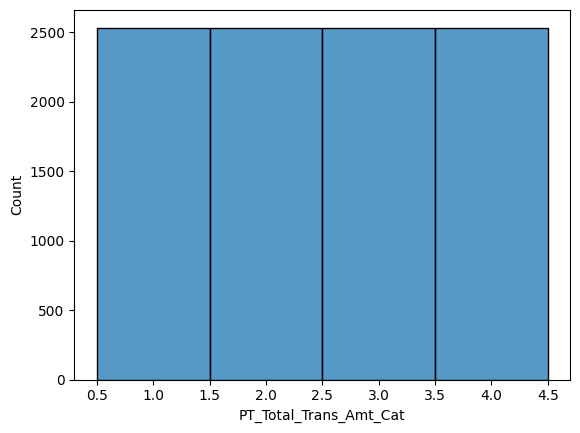

In [61]:
processed_df["PT_Total_Trans_Amt_Cat"] = pd.qcut(processed_df["PT_Total_Trans_Amt"],
                                              q=4,
                                              labels=[1, 2, 3, 4])

sns.histplot(data=processed_df["PT_Total_Trans_Amt_Cat"]);

In [62]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(processed_df, processed_df["PT_Total_Trans_Amt_Cat"]):
    start_train_set = processed_df.iloc[train_index]
    start_test_set = processed_df.iloc[test_index]

In [63]:
# Now we should remove the PT_Total_Trans_Amt_Cat attribute so the data is back to its original state:
for set_ in (start_train_set, start_test_set): 
    set_.drop("PT_Total_Trans_Amt_Cat", axis=1, inplace=True)

## Scale and Encode

In [64]:
df_Churn_new = start_train_set.drop("Attrition_Flag", axis=1)
df_Churn_label = start_train_set["Attrition_Flag"].copy()

In [65]:
df_Churn_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8101 entries, 9736 to 6136
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Customer_Age                    8101 non-null   int8    
 1   Gender                          8101 non-null   int64   
 2   Dependent_count                 8101 non-null   category
 3   Education_Level                 8101 non-null   category
 4   Marital_Status                  8101 non-null   category
 5   Income_Category                 8101 non-null   category
 6   Card_Category                   8101 non-null   category
 7   Months_on_book                  8101 non-null   int8    
 8   Total_Relationship_Count        8101 non-null   category
 9   Months_Inactive_12_mon          8101 non-null   category
 10  Contacts_Count_12_mon           8101 non-null   category
 11  Total_Revolving_Bal             8101 non-null   int16   
 12  Total_Trans_Ct        

In [66]:
list_feature_num_robust = ["Customer_Age","Months_on_book", "Total_Trans_Ct",  "PT_Age_To_Months_Ratio", "PT_Avg_Open_To_Buy",
                           "PT_Total_Ct_Chng_Q4_Q1", "PT_Total_Trans_Amt", "PT_Trans_Change_Rate", "PT_Total_Amt_Chng_Q4_Q1"]
list_feature_num_stand = ["Total_Revolving_Bal", "PT_Credit_Limit", "PT_Credit_Usage_Efficiency", "PT_Avg_Utilization_Ratio",
                          "PT_Utilization_Ratio_Per_Trans"]
list_feature_cat_onehot = ["Education_Level", "Marital_Status", "Income_Category", "Card_Category", "Dependent_count",
                           "Months_Inactive_12_mon", "Contacts_Count_12_mon", "Total_Relationship_Count", "RFM_Segment"]
list_feature_cat_keep = ["Gender"]


In [67]:
# There are no **missing values** in dataset. But we will still handle missing values ​​to check the data in the future.
num_robust_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler())
])

num_stand_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_onehot_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")), 
    ("encoder", OneHotEncoder(handle_unknown="ignore")) # Handling Text and Categorical Attributes
])

cat_keep_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent"))
])

In [68]:
preprocessor = ColumnTransformer(transformers=[
    ("num_robust", num_robust_transformer, list_feature_num_robust),
    ("num_standard", num_stand_transformer, list_feature_num_stand),
    ("cat_onehot", cat_onehot_transformer, list_feature_cat_onehot),
    ("cat_keep", cat_keep_transformer, list_feature_cat_keep),
])

preprocessor.fit(df_Churn_new)

ColumnTransformer(transformers=[('num_robust',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['Customer_Age', 'Months_on_book',
                                  'Total_Trans_Ct', 'PT_Age_To_Months_Ratio',
                                  'PT_Avg_Open_To_Buy',
                                  'PT_Total_Ct_Chng_Q4_Q1',
                                  'PT_Total_Trans_Amt', 'PT_Trans_Change_Rate',
                                  'PT_Total_Amt_Chng_Q4_Q1']),
                                ('num_standard',
                                 Pipeli...
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Education_Level', 'Marital_Status',
                                  'Income_Category', 'Card_Category',
                                  'Dependent_count', 'Months_Inactive_12_mon',
                                  'Contacts_Count_12_mon',
                                  'Total_Relationship_Count', 'RFM_Segment']),
                                ('cat_keep',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Gender'])])

In [69]:
df_Churn_prepared = preprocessor.transform(df_Churn_new)

In [70]:
list_feature_prepared = preprocessor.get_feature_names_out().tolist()
list_feature_prepared

['num_robust__Customer_Age',
 'num_robust__Months_on_book',
 'num_robust__Total_Trans_Ct',
 'num_robust__PT_Age_To_Months_Ratio',
 'num_robust__PT_Avg_Open_To_Buy',
 'num_robust__PT_Total_Ct_Chng_Q4_Q1',
 'num_robust__PT_Total_Trans_Amt',
 'num_robust__PT_Trans_Change_Rate',
 'num_robust__PT_Total_Amt_Chng_Q4_Q1',
 'num_standard__Total_Revolving_Bal',
 'num_standard__PT_Credit_Limit',
 'num_standard__PT_Credit_Usage_Efficiency',
 'num_standard__PT_Avg_Utilization_Ratio',
 'num_standard__PT_Utilization_Ratio_Per_Trans',
 'cat_onehot__Education_Level_College',
 'cat_onehot__Education_Level_Doctorate',
 'cat_onehot__Education_Level_Graduate',
 'cat_onehot__Education_Level_High School',
 'cat_onehot__Education_Level_Post-Graduate',
 'cat_onehot__Education_Level_Uneducated',
 'cat_onehot__Education_Level_Unknown',
 'cat_onehot__Marital_Status_Divorced',
 'cat_onehot__Marital_Status_Married',
 'cat_onehot__Marital_Status_Single',
 'cat_onehot__Marital_Status_Unknown',
 'cat_onehot__Income_Ca

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Define Metric</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Define Metric
    </h1>
</div>

| Metric        | Definition                                                  | Meaning in Attrition Context                                          |
| ------------- | ----------------------------------------------------------- | --------------------------------------------------------------------- |
| **Recall**    | $\frac{TP}{TP + FN}$                                        | **Most important** – how many true leavers you can catch              |
| **Precision** | $\frac{TP}{TP + FP}$                                        | Among predicted leavers, how many are actually correct                |
| **Accuracy**  | $\frac{TP + TN}{Total}$                                     | Can be misleading with imbalanced data (e.g., <20% attrition)         |
| **F1-score**  | $\frac{2 \cdot Precision \cdot Recall}{Precision + Recall}$ | Balanced trade-off between Precision and Recall                       |
| **AUC-ROC**   | Area under ROC Curve                                        | Measures ability to distinguish leavers vs. stayers at all thresholds |

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Comparison Models</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Comparison Models
    </h1>
</div>

In [71]:
# Using SMOTE to handling imbalance data.
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df_Churn_prepared, df_Churn_label)

In [72]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier,
AdaBoostClassifier, BaggingClassifier)
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

seed = 42
max_iter = 50000

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
models = [
    LinearSVC(max_iter=max_iter, random_state=42),
    SVC(kernel="rbf", random_state=seed),
    KNeighborsClassifier(metric = "minkowski", p = 2, n_neighbors=5),
    GaussianNB(),
    LogisticRegression(solver="liblinear", max_iter=max_iter, random_state=seed),
    DecisionTreeClassifier(max_depth=5, random_state=seed),
    RandomForestClassifier(n_estimators=100, random_state=seed),
    ExtraTreesClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    XGBClassifier(n_estimators= 2000, max_depth= 4, eval_metric = "logloss",
                  random_state=seed, min_child_weight= 2, gamma=0.9,
                  subsample=0.8, colsample_bytree=0.8, objective= "binary:logistic",
                  nthread= -1),
    MLPClassifier(max_iter=max_iter, random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    RidgeClassifier(alpha=1.0, random_state=seed, max_iter=max_iter),
    RidgeClassifierCV(alphas=[0.1, 0.5, 1.0], cv=kfold),
    CatBoostClassifier(verbose=0, random_seed=seed, allow_writing_files=False),
    BaggingClassifier(random_state=seed),
    LGBMClassifier(random_state=seed, verbosity=-1)
]

In [73]:
def generate_baseline_results(models = models, X = X_resampled, y = y_resampled, metric = "roc_auc",
                              cv = kfold, plot_result = False):
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        model_scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
        for fold_idx, score in enumerate(model_scores):
            entries.append((model_name, fold_idx, score))
        cv_df = pd.DataFrame(entries, columns=["model_name", "fold_id", "roc_auc_score"])

    # Summary
    mean = cv_df.groupby("model_name")["roc_auc_score"].mean()
    std = cv_df.groupby("model_name")["roc_auc_score"].std()

    baseline_result = pd.concat([mean, std], axis=1, ignore_index=True)
    baseline_result.columns = ["Mean", "Standard Deviation"]

    # Sort by roc_auc
    baseline_result.sort_values(by=["Mean"], ascending=False, inplace=True)   

    if plot_result:
        plt.figure(figsize=(18, 8))
        sns.barplot(x="model_name", y="roc_auc_score", data=cv_df, palette="viridis")
        plt.title("Base-Line Model ROC AUC using 5-fold cross-validation", fontsize=14, weight="bold", pad=20)
        plt.xlabel("Model")
        plt.ylabel("roc_auc_score")
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

        return baseline_result
    else:
        return baseline_result

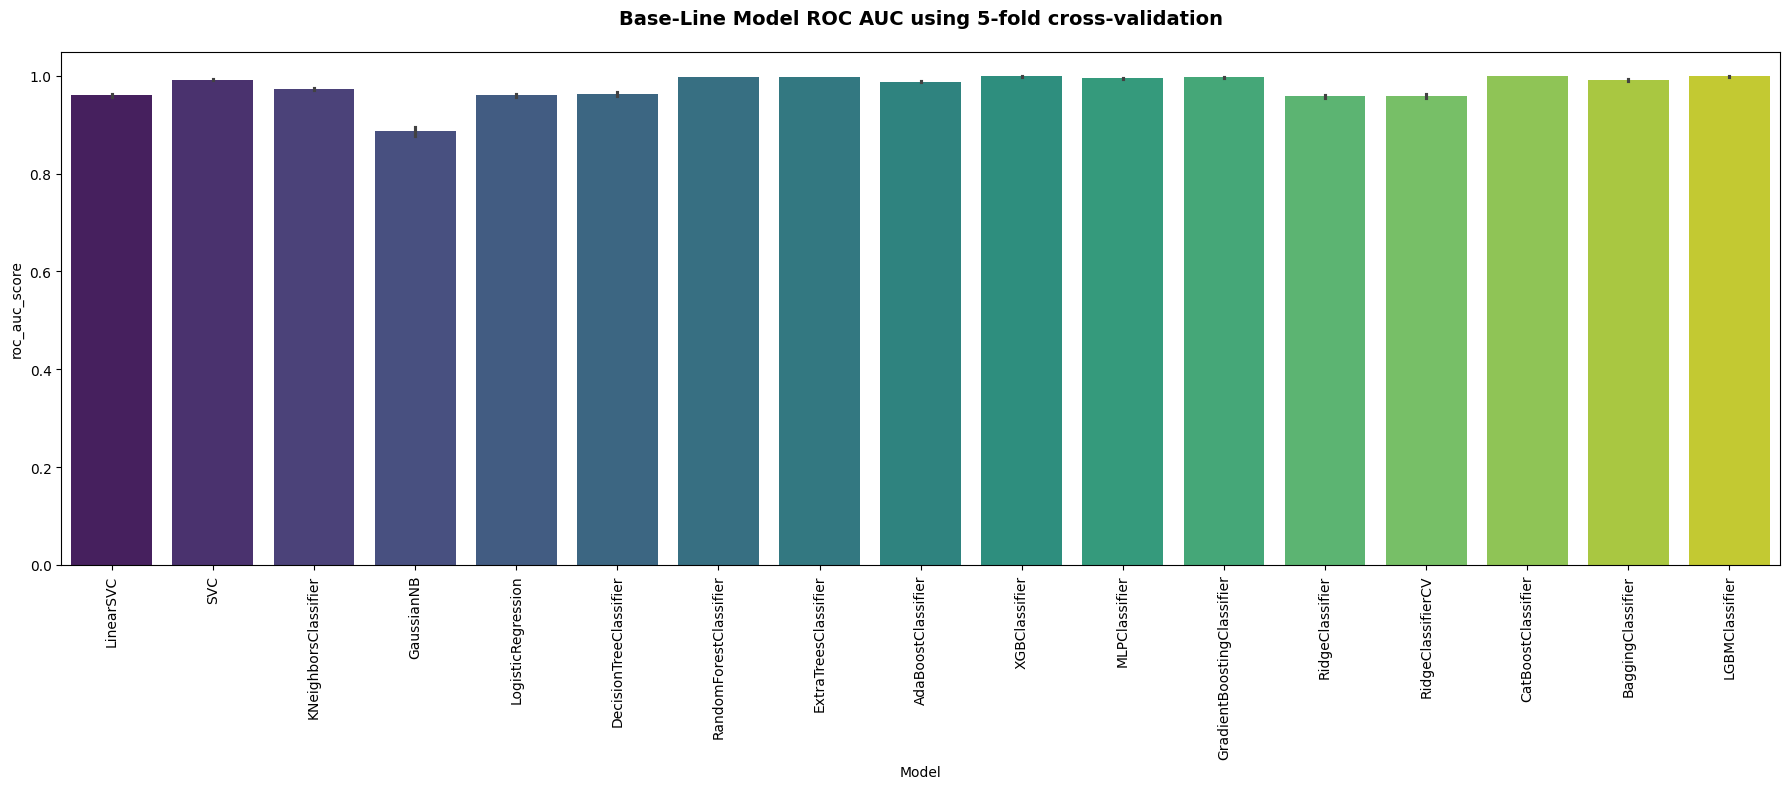

Mean  Standard Deviation
model_name                                              
CatBoostClassifier          0.999011            0.000296
LGBMClassifier              0.998846            0.000232
XGBClassifier               0.998781            0.000315
ExtraTreesClassifier        0.998135            0.000543
RandomForestClassifier      0.997844            0.000431
GradientBoostingClassifier  0.996843            0.000904
MLPClassifier               0.995223            0.001245
SVC                         0.992441            0.002156
BaggingClassifier           0.991522            0.002391
AdaBoostClassifier          0.988373            0.002589
KNeighborsClassifier        0.972864            0.001901
DecisionTreeClassifier      0.963015            0.005028
LinearSVC                   0.960139            0.004252
LogisticRegression          0.959918            0.004283
RidgeClassifierCV           0.958461            0.004321
RidgeClassifier             0.958450            0.004323
GaussianNB                  0.886434            0.012704

In [74]:
generate_baseline_results(plot_result = True)

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Hyperparameter tuning</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Hyperparameter tuning
    </h1>
</div>

In [75]:
def shap_plot(model, X_test, list_feature, type = None):    
     # https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137/
    if hasattr(X_test, "toarray"):
        X_test = X_test.toarray()
    X_test_sample = pd.DataFrame(X_test, columns=list_feature)
    explainer = shap.Explainer(model.predict, X_test_sample)
    shap_values = explainer(X_test_sample)
    if type =="bar":
        shap_importance = np.abs(shap_values.values).mean(axis=0)
        shap_df = pd.DataFrame({"feature": X_test_sample.columns, "importance": shap_importance})
        shap_df = shap_df.sort_values("importance", ascending=False).head(20)
        plt.figure(figsize=(12, 6))
        sns.barplot(x=shap_df["importance"], y=shap_df["feature"], palette="viridis", order=shap_df["feature"])
        plt.xlabel("mean(|SHAP value|)")
        plt.title("SHAP Feature Importance")
        plt.tight_layout()
        plt.show()
    else:
        shap.summary_plot(shap_values, X_test_sample)

In [ ]:
def plot_ROC_confusionMatrix(estimator, X_val, y_val, figsize):
    y_pred_prob = estimator.predict_proba(X_val)[:, 1]  # Probability of positive class
    y_pred = estimator.predict(X_val)

    fig, ax = plt.subplots(nrows=2, ncols=2, sharey=False, figsize=figsize)
    
    # Plot 1    
    # Calculate ROC
    fpr, tpr, _ = roc_curve(y_val, y_pred_prob)
    rocScore = roc_auc_score(y_val, y_pred_prob)

    ax[0, 0].plot(fpr, tpr, label=f"{estimator.__class__.__name__} (AUC = {rocScore:.2f})")
    ax[0, 0].plot([0, 1], [0, 1], "b--")
    ax[0, 0].set_xlabel("False Positive Rate")
    ax[0, 0].set_ylabel("True Positive Rate")
    ax[0, 0].set_title(f"ROC ({estimator.__class__.__name__})", weight="bold")
    ax[0, 0].legend()

    # Plot 2
    confusionMatrix = confusion_matrix(y_val, y_pred)
    sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Blues", ax=ax[0, 1])
    ax[0, 1].set_title(f"Confusion Matrix ({estimator.__class__.__name__})", weight="bold")
    ax[0, 1].set_xlabel("Prediction")
    ax[0, 1].set_ylabel("Actual")

    # plot 3
    precision, recall, thresholds_pr = precision_recall_curve(y_val, y_pred_prob)
    pr_auc = auc(recall, precision)
    ax[1, 0].plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.3f})")
    ax[1, 0].set_xlabel("Recall")
    ax[1, 0].set_ylabel("Precision")
    ax[1, 0].set_title("Precision-Recall Curve", weight="bold")
    ax[1, 0].legend()
    
    ax.flat[-1].set_visible(False)

    plt.tight_layout()
    plt.show()

    print(classification_report(y_val, y_pred))

In [77]:
# Function to evaluate models
def evaluate_model(model, X_train, X_val, y_train, y_val, figsize = (15, 6), show_shap_plot = False):
    print(f"Evaluating {model.__class__.__name__}...")
    model.fit(X_train, y_train)
    plot_ROC_confusionMatrix(estimator = model, X_val = X_val, y_val = y_val, figsize = figsize)
    if show_shap_plot:
        shap_sample = X_val.iloc[:200] if isinstance(X_val, pd.DataFrame) else X_val[:200]
        shap_plot(model=model, X_test=shap_sample, list_feature=list_feature_prepared)

In [78]:
X_test = start_test_set.drop("Attrition_Flag", axis=1)
y_test = start_test_set["Attrition_Flag"].copy()
X_test_prepared = preprocessor.transform(X_test)

## CatBoostClassifier

In [79]:
# After running optuna.
param_cb = {
 "iterations": 687,
 "learning_rate": 0.22278841471925673,
 "depth": 7,
 "l2_leaf_reg": 2.146037400088227,
 "border_count": 54,
 "random_strength": 0.07669797192938685,
 "bagging_temperature": 0.9398972489915723,
 "eval_metric": "AUC",
 "loss_function": "Logloss",
 "verbose": 0,
 "random_seed": seed
}

In [80]:
best_model_cb = CatBoostClassifier(**param_cb)
best_model_cb

Evaluating CatBoostClassifier...


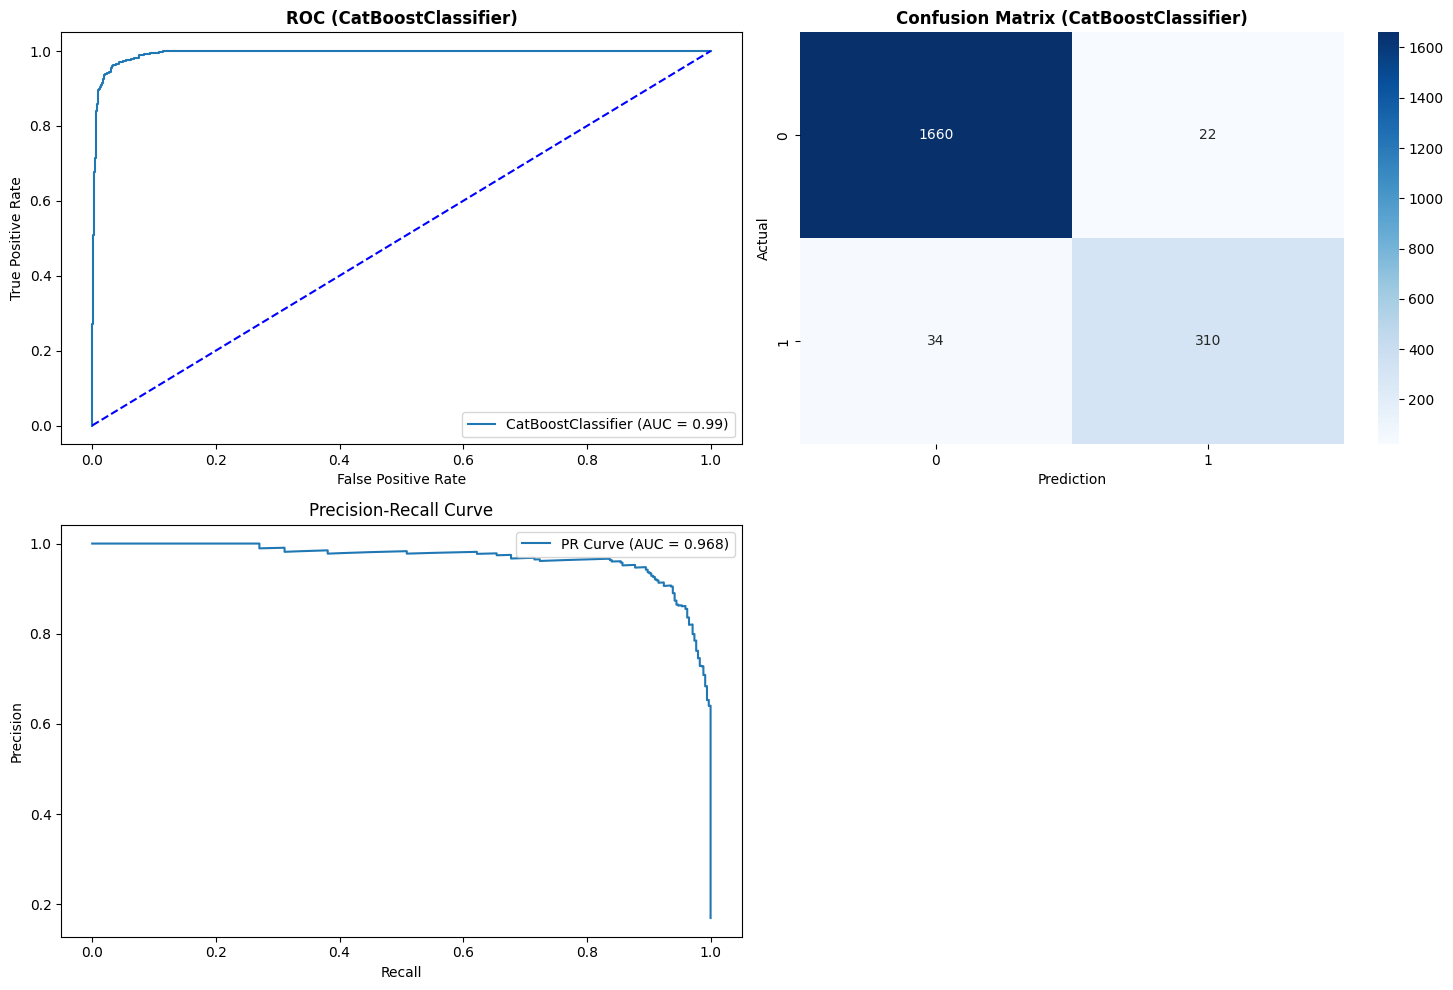

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1682
           1       0.93      0.90      0.92       344

    accuracy                           0.97      2026
   macro avg       0.96      0.94      0.95      2026
weighted avg       0.97      0.97      0.97      2026



In [81]:
evaluate_model(model = best_model_cb, X_train=X_resampled, X_val=X_test_prepared,
               y_train=y_resampled, y_val=y_test, figsize=(15, 10), show_shap_plot=False)

## LGBMClassifier

In [82]:
# After running optuna.
param_lgbm = {
 "n_estimators": 864,
 "learning_rate": 0.061163220617013334,
 "num_leaves": 110,
 "max_depth": 13,
 "min_child_samples": 31,
 "subsample": 0.6463158924558087,
 "colsample_bytree": 0.7909944139467433,
 "reg_alpha": 7.855232280011533e-07,
 "reg_lambda": 0.1044433782968261,
 "random_seed": seed,
 "n_jobs": -1,
 "verbosity": -1
}

In [83]:
best_model_lgbm = LGBMClassifier(**param_lgbm)
best_model_lgbm

LGBMClassifier(colsample_bytree=0.7909944139467433,
               learning_rate=0.061163220617013334, max_depth=13,
               min_child_samples=31, n_estimators=864, n_jobs=-1,
               num_leaves=110, random_seed=42, reg_alpha=7.855232280011533e-07,
               reg_lambda=0.1044433782968261, subsample=0.6463158924558087,
               verbosity=-1)

Evaluating LGBMClassifier...


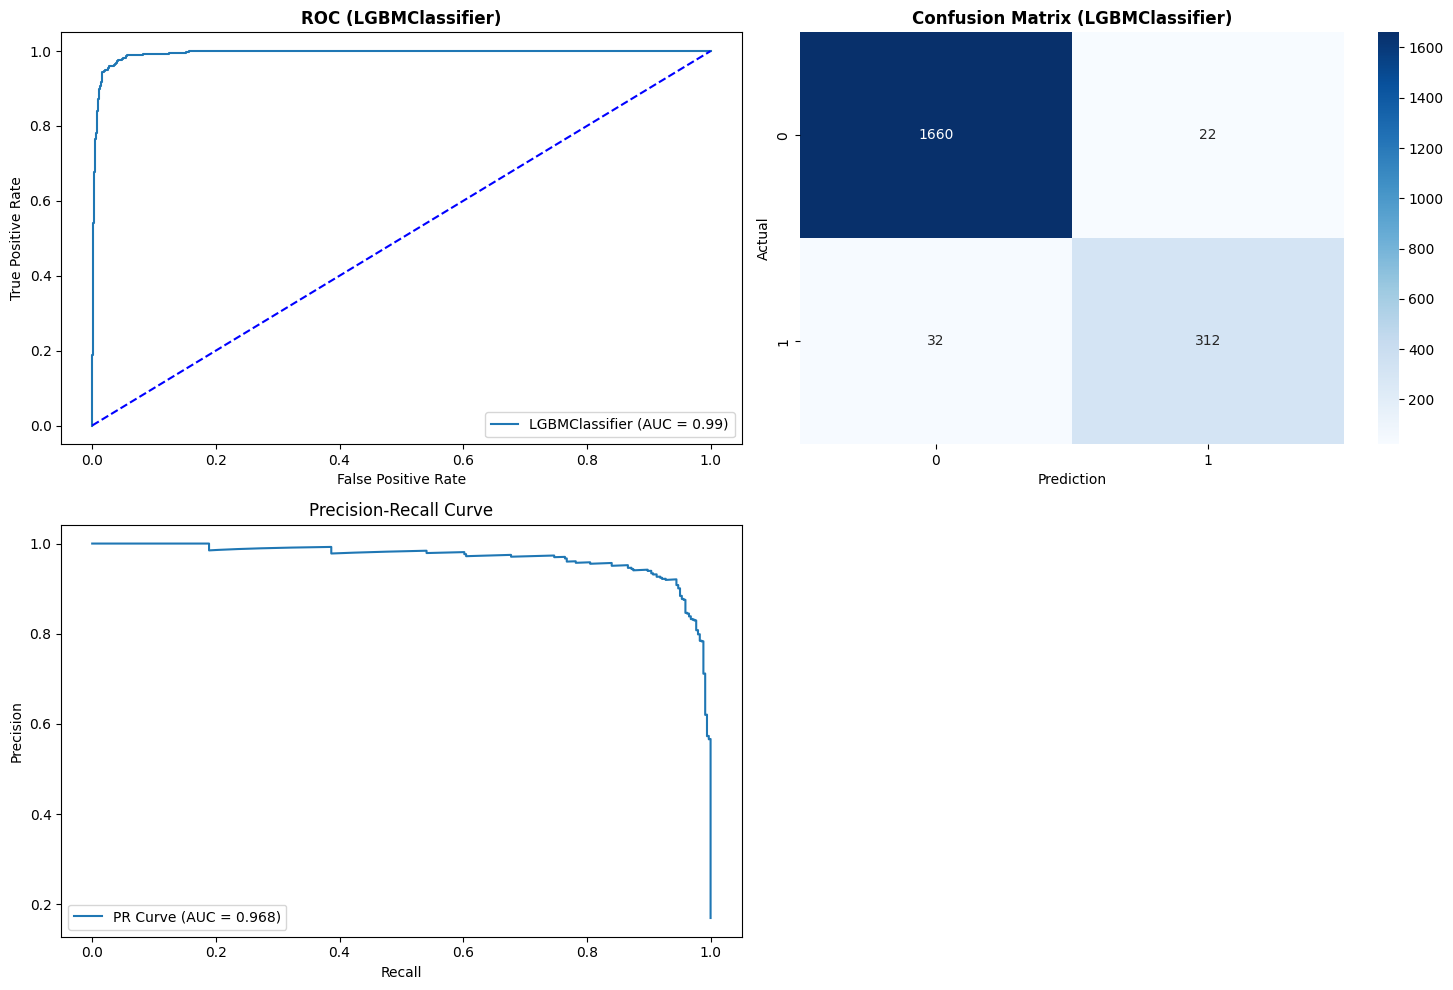

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1682
           1       0.93      0.91      0.92       344

    accuracy                           0.97      2026
   macro avg       0.96      0.95      0.95      2026
weighted avg       0.97      0.97      0.97      2026



In [84]:
evaluate_model(model = best_model_lgbm, X_train=X_resampled, X_val=X_test_prepared,
               y_train=y_resampled, y_val=y_test, figsize=(15, 10), show_shap_plot=False)

## XGBClassifier

In [85]:
# After running optuna.
param_xgb = {
 "n_estimators": 831,
 "max_depth": 12,
 "learning_rate": 0.02583971809059078,
 "subsample": 0.6245033991063241,
 "colsample_bytree": 0.7600912832095267,
 "gamma": 1.8611817476742898,
 "reg_alpha": 0.28438437703658187,
 "reg_lambda": 0.00013468443121609304,
 "min_child_weight": 1,
 "random_state": seed,
 "n_jobs": -1,
 "verbosity": 0,
 "use_label_encoder": False,
 "eval_metric": "auc"
}

In [86]:
best_model_xgb = XGBClassifier(**param_xgb)
best_model_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7600912832095267, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, feature_weights=None,
              gamma=1.8611817476742898, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02583971809059078,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=831, n_jobs=-1,
              num_parallel_tree=None, ...)

Evaluating XGBClassifier...


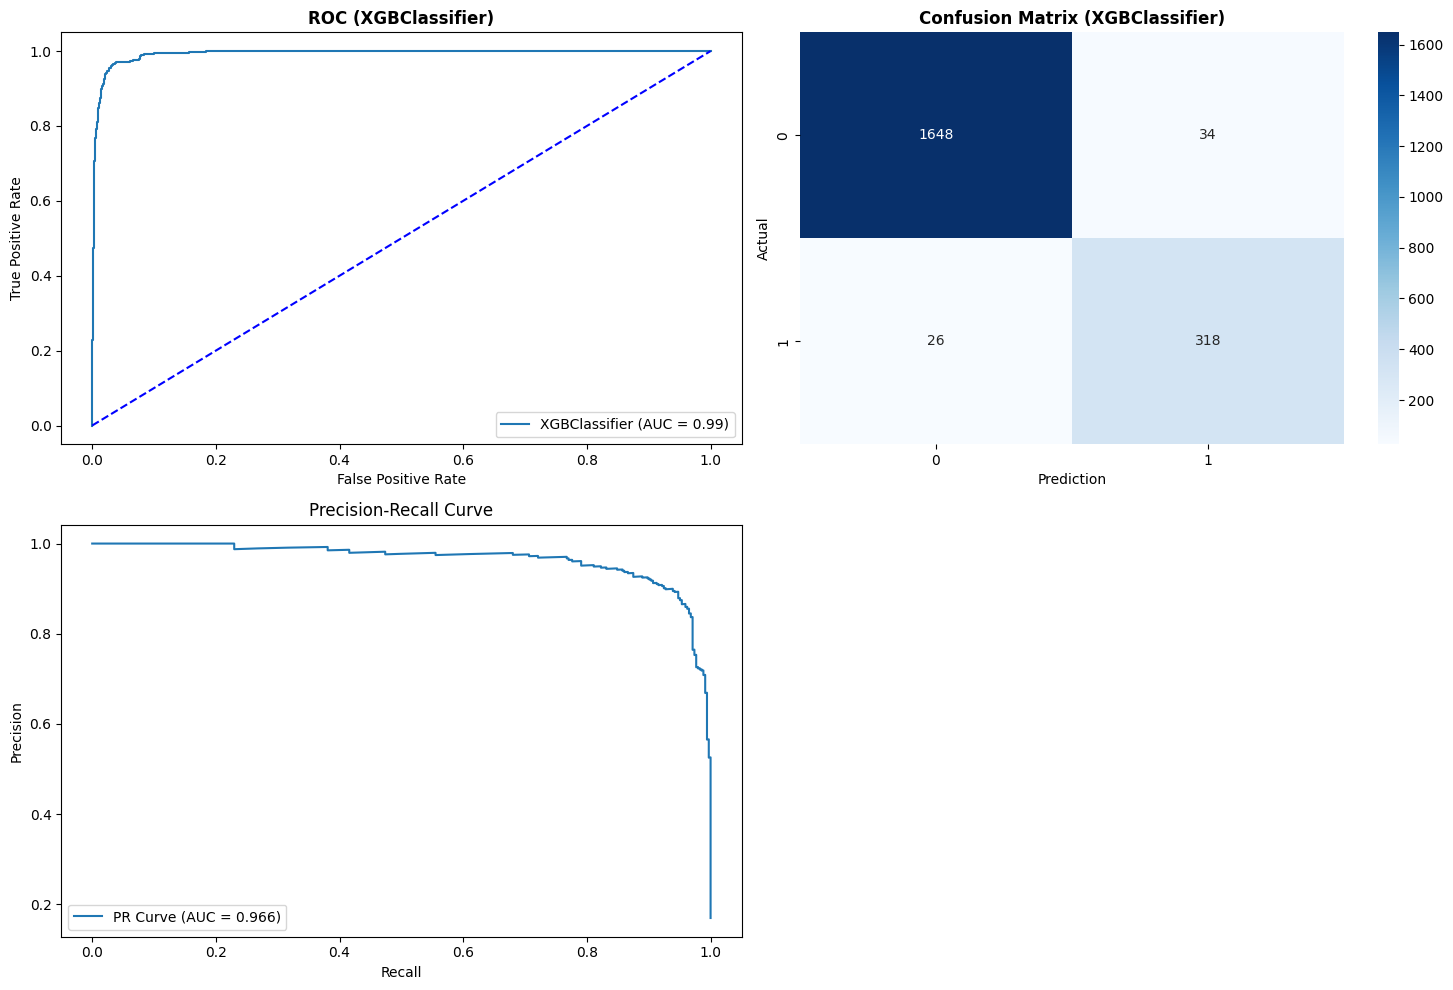

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1682
           1       0.90      0.92      0.91       344

    accuracy                           0.97      2026
   macro avg       0.94      0.95      0.95      2026
weighted avg       0.97      0.97      0.97      2026



In [87]:
evaluate_model(model = best_model_xgb, X_train=X_resampled, X_val=X_test_prepared,
               y_train=y_resampled, y_val=y_test, figsize=(15, 10), show_shap_plot=False)

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Conclusion</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Conclusion
    </h1>
</div>


## VotingClassifier

In [88]:
from sklearn.ensemble import VotingClassifier
voting_clf_soft = VotingClassifier(
    estimators=[
        ("catboost", best_model_cb),
        ("xgb", best_model_xgb),
        ("lgbm", best_model_lgbm)
    ],
    voting="soft",
    n_jobs=-1
)

In [89]:
cv_scores = cross_val_score(
    voting_clf_soft,
    X=X_resampled,
    y=y_resampled,
    cv=kfold,
    scoring="roc_auc",
    n_jobs=-1
)
print(f"Cross-validated ROC AUC (mean ± std): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Cross-validated ROC AUC (mean ± std): 0.9990 ± 0.0002


Evaluating VotingClassifier...


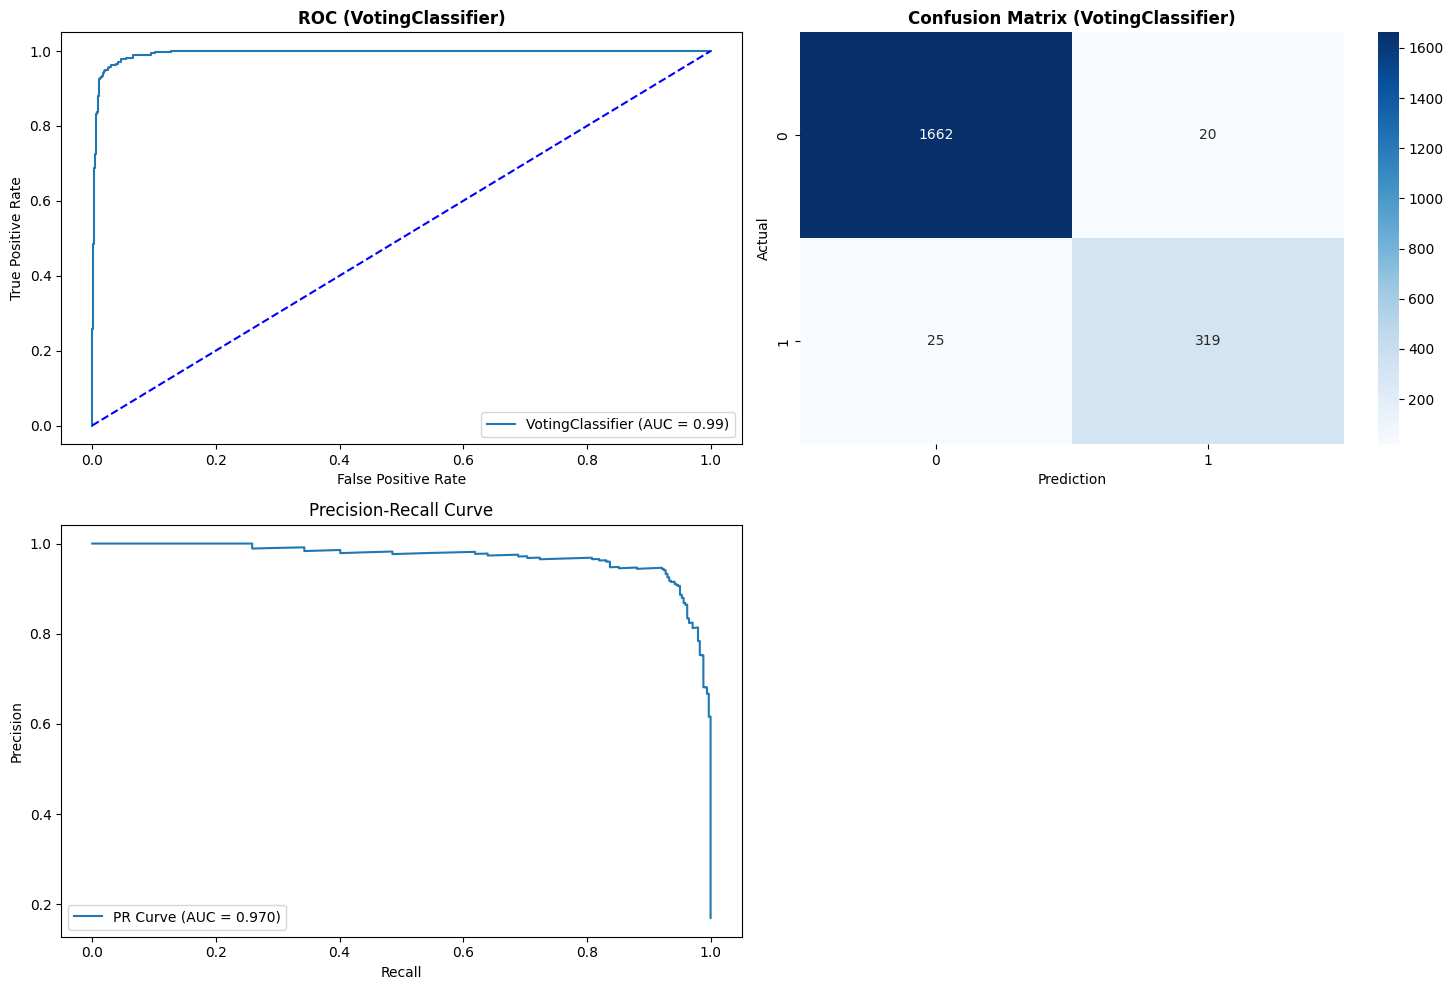

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1682
           1       0.94      0.93      0.93       344

    accuracy                           0.98      2026
   macro avg       0.96      0.96      0.96      2026
weighted avg       0.98      0.98      0.98      2026



In [90]:
evaluate_model(model = voting_clf_soft, X_train=X_resampled, X_val=X_test_prepared,
               y_train=y_resampled, y_val=y_test, figsize=(15, 10), show_shap_plot=False)

PermutationExplainer explainer: 201it [01:39,  1.92it/s]                         


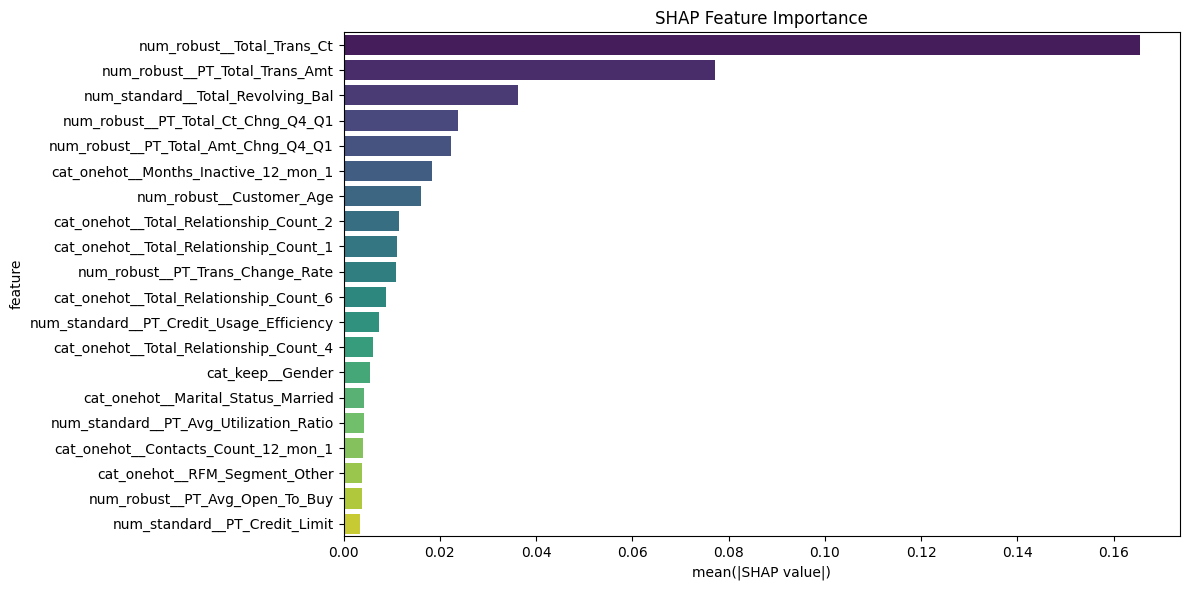

In [91]:
shap_sample = X_test_prepared.iloc[:200] if isinstance(X_test_prepared, pd.DataFrame) else X_test_prepared[:200]
shap_plot(model=voting_clf_soft, X_test=shap_sample, list_feature=list_feature_prepared, type="bar")

PermutationExplainer explainer: 201it [01:25,  2.06it/s]                         


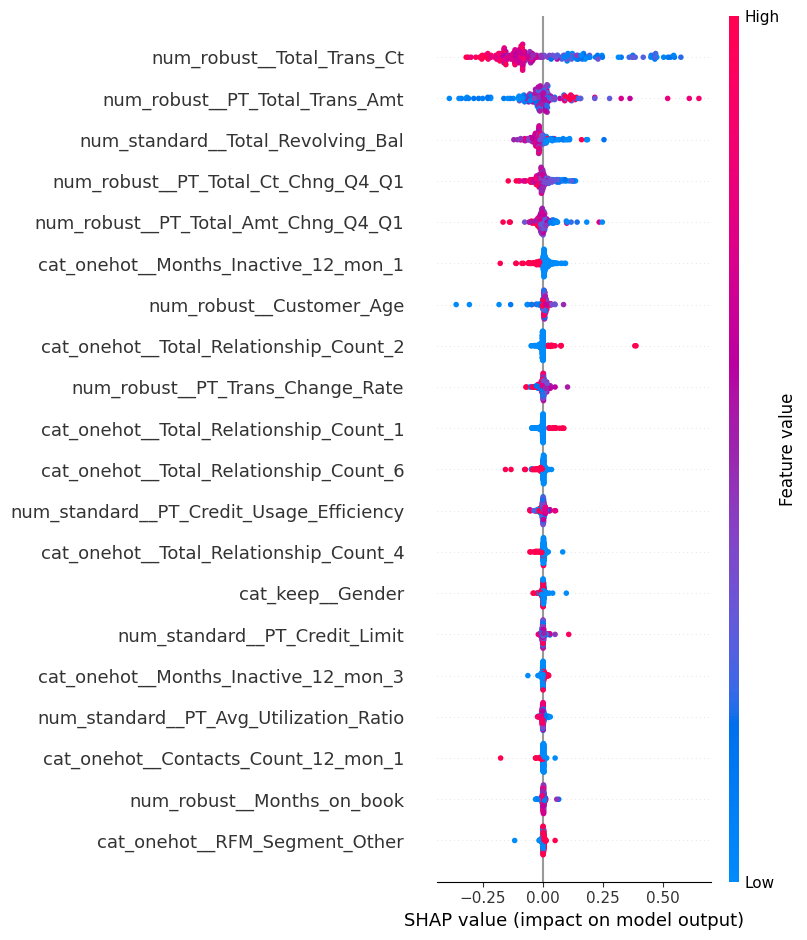

In [92]:
shap_plot(model=voting_clf_soft, X_test=shap_sample, list_feature=list_feature_prepared)

**Top 5 Most Influential Features**

| Feature                                         | Interpretation                                                                                                                           |
| ----------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------- |
| **num\_robust\_\_Total\_Trans\_Ct**             | Transaction count is the **most important factor**. More frequent transactions (red) lead to higher credit score predictions.            |
| **num\_robust\_\_PT\_Total\_Trans\_Amt**        | Total transaction amount (proportional). Higher spending indicates stronger financial behavior, contributing positively to credit score. |
| **num\_standard\_\_Total\_Revolving\_Bal**      | Total revolving balance. High values (red) lead to negative SHAP values — indicating potential risk due to high debt levels.             |
| **num\_robust\_\_PT\_Total\_Ct\_Chng\_Q4\_Q1**  | Change in transaction count between Q4 and Q1. Sudden increases or drops reflect financial volatility and can influence score both ways. |
| **num\_robust\_\_PT\_Total\_Amt\_Chng\_Q4\_Q1** | Change in transaction amount between quarters. The impact is bidirectional depending on the direction and magnitude of change.           |

**Other Notable Features:**

| Feature                                    | Interpretation                                                                                                              |
| ------------------------------------------ | --------------------------------------------------------------------------------------------------------------------------- |
| `cat_onehot__Months_Inactive_12_mon_1`     | Customers inactive for 1 month in the past year show strong negative impact (red dots shifting left).                       |
| `num_robust__Customer_Age`                 | Age has mild influence. Older customers tend to have positive SHAP values, possibly reflecting more stable credit behavior. |
| `num_standard__PT_Credit_Usage_Efficiency` | Efficiency of credit usage — higher efficiency (red) contributes positively to credit score.                                |
| `cat_keep__Gender`                         | Minimal effect — the model doesn’t significantly differentiate by gender.                                                   |
| `num_standard__PT_Credit_Limit`            | Credit limit has minor influence but follows expected direction: higher limit → higher predicted score.                     |

**General Takeaways:**

* **Credit behavior** (transactions, balances, quarter-over-quarter changes) is the **dominant signal** in determining credit score.
* Categorical features like one-hot encoded `inactive months` and `relationship count` also provide meaningful patterns.
* **Demographics** like gender or marital status play a **less important role**, indicating the model focuses more on **behavioral and financial indicators**.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Recommendation</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Recommendation
    </h1>
</div>


**Summary Table – SHAP Importance & Statistical Significance**

| Feature                        | SHAP Importance | Stat Test Significance | Combined Insight                                                    | Suggested Action                                                    |
| ------------------------------ | --------------- | ---------------------- | ------------------------------------------------------------------- | ------------------------------------------------------------------- |
| **Total\_Trans\_Ct**           | Very High    | ✅ Significant          | Fewer transactions → higher churn risk                              | Monitor customers with low activity; send offers to re-engage usage |
| **Total\_Trans\_Amt**          | Very High    | ✅ Significant          | Lower spending → associated with higher churn                       | Encourage spend with personalized promotions                        |
| **Total\_Revolving\_Bal**      | High         | ✅ Significant          | Low balance may reflect card inactivity → churn risk                | Target low-usage customers with usage incentives                    |
| **Total\_Ct\_Chng\_Q4\_Q1**    | Medium       | ✅ Significant          | Smaller increase in transaction count → churn-prone                 | Flag drop in transactional patterns; re-engagement campaigns        |
| **Total\_Amt\_Chng\_Q4\_Q1**   | Medium       | ✅ Significant          | Low spending growth over time → churn signal                        | Promote positive spending trends through milestone offers           |
| **Avg\_Open\_To\_Buy**         | Low          | ✅ Significant          | Less available credit → potential disengagement                     | Consider offering alternative card options                          |
| **Contacts\_Count\_12\_mon**   | Low          | ✅ Significant          | Frequent contact → correlated with churn (possibly dissatisfaction) | Balance communication; avoid overwhelming the customer              |
| **Months\_Inactive\_12\_mon**  | Medium       | ✅ Significant          | 3–4 inactive months → strong churn predictor                        | Launch reactivation campaigns for inactive users                    |
| **Total\_Relationship\_Count** | Medium       | ✅ Significant          | Fewer linked products (1–2) → less loyal customers                  | Cross-sell/upsell to increase engagement and stickiness             |

**Overall Observations:**

* Strong alignment between **SHAP-based feature importance** and **statistical test results** reinforces trust in model behavior.
* Behavioral indicators (transactions, usage changes) dominate both SHAP impact and statistical correlation.
* Demographic features like `Gender`, `Marital_Status`, and `Education_Level` show low predictive value, validating the model’s behavioral focus.

**Strategic Recommendations:**

| Behavioral Segment              | Key Features                        | Recommended Strategy                                         |
| ------------------------------- | ----------------------------------- | ------------------------------------------------------------ |
| **Low activity users**          | `Total_Trans_Ct`, `Total_Trans_Amt` | Use cashback or bonus incentives tied to usage thresholds    |
| **Declining engagement**        | `*_Chng_Q4_Q1`                      | Early alerts + customer support follow-up                    |
| **Limited product holders**     | `Total_Relationship_Count`          | Introduce new product bundles or upgrade options             |
| **Inactive users (3–4 months)** | `Months_Inactive_12_mon`            | Trigger personalized reactivation flows                      |
| **Over-contacted customers**    | `Contacts_Count_12_mon`             | Optimize communication frequency and tailor outreach content |

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🙏 Thanks for Reading! 🚀
    </h1>
    <p style="color: #ffffff; font-size: 18px; text-align: center;">
        Happy Coding! 🙌😊
    </p>
</div>
